In [1]:
import random
import ast
from sklearn.metrics import classification_report
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import os
import math
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
from tslearn.utils import to_time_series_dataset

/home/wally/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def distance(s, t):
    return (s - t)**2

In [3]:
def DTWDistance2(s, t, w):
    DTW = {}
    w = max(w, abs(len(s) - len(t)))
    for i in range(-1, len(s)):
        for j in range(-1, len(t)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
    for i in range(len(s)):
        for j in range(max(0, i - w), min (len(t), i + w)):
            dist = distance(s[i], t[j])
            DTW[(i, j)] = dist + min(DTW[(i - 1, j)], DTW[(i, j - 1)], DTW[(i - 1, j - 1)])
    return math.sqrt(DTW[len(s) - 1, len(t) - 1])

In [4]:
def DTWDistance(s, t):
    DTW = {}
    for i in range(len(s)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(t)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0
    for i in range(len(s)):
        for j in range(len(t)):
            dist = distance(s[i], t[j])
            DTW[(i, j)] = dist + min(DTW[(i - 1, j)], DTW[(i, j - 1)], DTW[(i - 1, j - 1)])
    return math.sqrt(DTW[len(s) - 1, len(t) - 1])

In [5]:
def LBKeogh(s, t, r):
    LBSum = 0
    for ind, i in enumerate(s):
        lowerBound = min((t))
        upperBound = max((t))
        if i > upperBound:
            LBSum = LBSum + (i - upperBound)**2
        elif i < lowerBound:
            LBSum = LBSum + (i - lowerBound)**2
    return math.sqrt(LBSum)

In [6]:
def knn(train, test, w):
    preds = []
    for ind, i in enumerate(test):
        minDist = float('inf')
        closestSeq = []
        for j in train:
            if LBKeogh(i[:-1], j[:-1], 5) < minDist:
                dist = DTWDistance(i[:-1], j[:-1], w)
                if dist < minDist:
                    minDist = dist
                    closestSeq = j;
        preds.append(closestSeq[-1])
    return classification_report(test[:, -1], preds)

In [7]:
def Kmeans(data, centroids, clusters, iteractions, w = 5):
    counter = 0
    for n in range(iteractions):
        counter += 1
        print(counter)
        assignments = {}
        for ind, i in enumerate(data):
            minDist = float('inf')
            closestClust = None
            for key in centroids:
                if LBKeogh(i, centroids[key], 5) < minDist:
                    curDist = DTWDistance(i, centroids[key])
                    if curDist < minDist:
                        minDist = curDist
                        closestClust = key
            if closestClust in assignments:
                assignments[closestClust].append(ind)
            else:
                assignments[closestClust] = []        
    return assignments

In [18]:
biggerLinks = {}
smallestLinks = {}
sz = 10000
with open("/home/wally/eclipse-workspace/pkmeansimulator/output/sequences/10-biggerSequences-with-link-interval-2020-06-04T11:59:59.507123.csv","r") as f:
    for i in f.readlines():
        l = list(map(str, i.split(';')))
        biggerLinks[l[0]] = int(l[1])
with open("/home/wally/eclipse-workspace/pkmeansimulator/output/sequences/10-smallestSequences-with-link-interval-2020-06-04T11:59:59.507123.csv","r") as f:
    for i in f.readlines():
        l = list(map(str, i.split(';')))
        smallestLinks[l[0]] = int(l[1])
        if (sz > int(l[1])):
            sz = int(l[1])
print(biggerLinks)
print(smallestLinks)
print(sz)

{'298786464-79200-82800': 501, '327005892-79200-82800': 503, '221553428-79200-82800': 521, '298786469-79200-82800': 523, '688769623-0-3600': 529, '298786465-79200-82800': 557, '298786467-79200-82800': 560, '298786468-79200-82800': 561, '298786466-79200-82800': 566, '152980843-0-3600': 743}
{'152746500-82800-86400': 2, '420135389-82800-86400': 2, '301677886-82800-86400': 2, '547531535-82800-86400': 2, '547531525-82800-86400': 2, '103934334-82800-86400': 2, '301677885-82800-86400': 2, '634307497-82800-86400': 2, '157490277-82800-86400': 2, '8838069-82800-86400': 2}
2


In [9]:
links = {}
type(links)

dict

In [10]:
def chartFirst(links,file, size, df):
    name = file.split("-")
    print(name[0]+"-"+name[1])
    l = df['link'].value_counts().head(size).index.tolist()
    print(df['link'].value_counts().head(size))
    links[name[0]+"-"+name[1]] = l
    print(l)

In [11]:
def chartLast(size, df):
    df = df['link'].value_counts()
    df.tail(size).plot(kind = 'bar')
    plt.show()

In [12]:
def chartFirst(size, df):
    df = df['link'].value_counts()
    df.head(size).plot(kind = 'bar')
    plt.show()

In [29]:
for i in range(len(dataFrames)):
    print(dataFramesNames[i])
    print("Firsts: \n")
    chartFirst(10, dataFrames[i])
    print("Lasts: \n")
    chartLast(10, dataFrames[i])

NameError: name 'dataFrames' is not defined

In [19]:
bigger_accessed_sequence = {}
smallest_accessed_sequence = {}
links_id = list()
links_interval = list()
'''
for link_id in biggerLinks:
    links_id.append(link_id.split('-')[0])
    links_interval.append(link_id.split('-')[1]+'-'+link_id.split('-')[2])
'''
for link_id in smallestLinks:
    links_id.append(link_id.split('-')[0])
    links_interval.append(link_id.split('-')[1]+'-'+link_id.split('-')[2])

print(links_id)
print(links_interval)

['152746500', '420135389', '301677886', '547531535', '547531525', '103934334', '301677885', '634307497', '157490277', '8838069']
['82800-86400', '82800-86400', '82800-86400', '82800-86400', '82800-86400', '82800-86400', '82800-86400', '82800-86400', '82800-86400', '82800-86400']


In [20]:
data = []
most_accessed_sequence = {}
with open("/home/wally/eclipse-workspace/pkmeansimulator/output/sequences/with-link-interval-2020-06-04T12:11:35.643643.csv","r") as f:
    for i in f.readlines():
        l = list(map(int, i.split(';')))
        if str(l[0]) in links_id and str(l[1])+'-'+str(l[2]) in links_interval:
            most_accessed_sequence[str(l[0])+'-'+str(l[1])+'-'+str(l[2])] = l[3:]
        else:
            data.append(l)
print(len(most_accessed_sequence))
print(len(data))

10
5464


In [15]:
def chartLinks(sz, link, data, link_interval):
    for xx in data:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(link.ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Link %s' % link_interval,
             transform=plt.gca().transAxes)
    plt.title(link_interval)
    plt.tight_layout()
    plt.show()

In [16]:
def chartLink(link, link_interval):
    plt.plot(link.ravel(), "r-")
    plt.xlim(0, len(link))
    plt.ylim(link[0], link[len(link)-1])
    plt.text(0.55, 0.85,'Link %s' % link_interval,
             transform=plt.gca().transAxes)
    plt.title(link_interval)
    plt.tight_layout()
    plt.show()

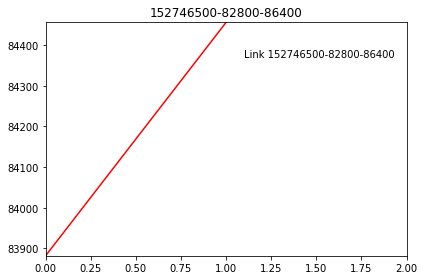

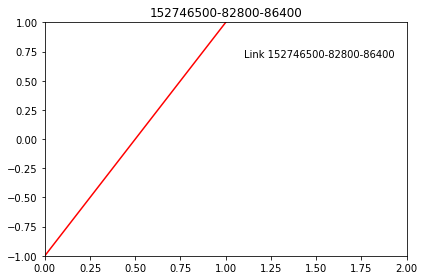

152746500-82800-86400
[547531528, 82800, 86400]: 0.08611061676281614
[547531527, 82800, 86400]: 0.7202503923110551
[8838071, 82800, 86400]: 0.31826750799829506
[159632717, 82800, 86400]: 3.9160930366493116
[152978752, 82800, 86400]: 0.5864960398549814
[159632718, 82800, 86400]: 1.093932639341606
[547531531, 82800, 86400]: 0.6081206329067907
[547531534, 82800, 86400]: 0.6064019852750021
[547531536, 82800, 86400]: 0.05453985387712371
[47876615, 82800, 86400]: 1.4142135623730951
[515675204, 82800, 86400]: 0.3250625082364746
[153947334, 82800, 86400]: 0.34352549782245256
[153947335, 82800, 86400]: 0.329211604553619
[297830232, 82800, 86400]: 0.33071453201343876
[547531526, 82800, 86400]: 0.6081206329067907
[547531532, 82800, 86400]: 0.6038641139404399
[251100155, 82800, 86400]: 1.4142135623730951
[299980276, 82800, 86400]: 0.0
[420135391, 82800, 86400]: 0.31801413244630783
[344864785, 82800, 86400]: 0.4438601748409336
[238610501, 82800, 86400]: 1.1503803297298754
[153021376, 82800, 86400]:

[153019308, 0, 3600]: 1.3540446277728442
[152746501, 0, 3600]: 0.0
[676148903, 0, 3600]: 0.3359618243502448
[152665066, 0, 3600]: 0.8001582640848132
[440530034, 0, 3600]: 0.0
[152895057, 0, 3600]: 0.0
[423239433, 0, 3600]: 1.027630618811496
[157489812, 0, 3600]: 0.3680820977881003
[688769624, 0, 3600]: 0.9636607455612876
[299081203, 0, 3600]: 0.5369233632746313
[493523036, 0, 3600]: 0.6206195046038567
[299893495, 0, 3600]: 0.32894666633676256
[533580370, 0, 3600]: 0.0
[153022686, 0, 3600]: 1.3540446277728466
[152924144, 0, 3600]: 0.5006701678810506
[462409674, 0, 3600]: 1.0122469257273616
[153021406, 0, 3600]: 0.0
[533580371, 0, 3600]: 0.48132498129903617
[104082863, 0, 3600]: 1.3540446277728464
[245338049, 0, 3600]: 1.0985352521948955
[152679356, 0, 3600]: 1.0522579853739333
[152665019, 0, 3600]: 0.0
[441304002, 0, 3600]: 0.0
[153021396, 0, 3600]: 1.3540446277728457
[440530039, 0, 3600]: 0.0
[385796152, 0, 3600]: 0.4766731582100597
[423239434, 0, 3600]: 0.3526024765895228
[189424090, 

[152978667, 0, 3600]: 0.4761403643308086
[681329975, 0, 3600]: 0.594282740947233
[505168806, 0, 3600]: 0.39672082419313964
[547531514, 0, 3600]: 1.2369525374270012
[252392824, 0, 3600]: 1.4142135623730951
[153035113, 0, 3600]: 0.0
[153019271, 0, 3600]: 1.4197767492934696
[153006791, 0, 3600]: 1.4142135623730951
[228275497, 0, 3600]: 0.6912677066227504
[160470003, 0, 3600]: 0.0
[547531521, 0, 3600]: 1.2164223764569717
[152980846, 0, 3600]: 1.7952645753893746
[286685258, 0, 3600]: 1.1297465704051364
[780908704, 0, 3600]: 0.7932408688235785
[157489831, 0, 3600]: 0.3892242857247898
[47876620, 0, 3600]: 0.6716256218201005
[440530047, 0, 3600]: 0.0
[299893497, 0, 3600]: 0.7234345771216337
[104082896, 0, 3600]: 0.0
[153030235, 0, 3600]: 0.0
[152679415, 0, 3600]: 0.5611292553095459
[234352584, 0, 3600]: 0.8281747874653436
[420095471, 0, 3600]: 0.37464081962673673
[441497929, 0, 3600]: 0.35655899481074554
[161620463, 0, 3600]: 1.4142135623730951
[152651317, 0, 3600]: 1.0754340395587372
[4624096

[252392921, 25200, 28800]: 0.0
[480282272, 25200, 28800]: 0.0
[515675224, 25200, 28800]: 1.0848905916687095
[153050011, 25200, 28800]: 0.5815827258932016
[298549719, 25200, 28800]: 0.5713649592150793
[678035904, 25200, 28800]: 0.7193655014791063
[251100152, 25200, 28800]: 0.24021293529701912
[8035451, 25200, 28800]: 0.0
[189677026, 25200, 28800]: 0.0
[243630883, 25200, 28800]: 0.0
[60712847, 25200, 28800]: 0.0
[160451435, 25200, 28800]: 0.6769630988087788
[286685261, 25200, 28800]: 0.9340810137425826
[153050008, 25200, 28800]: 0.5936880190030768
[8035434, 25200, 28800]: 0.0
[153050006, 25200, 28800]: 0.31784443973995874
[153022759, 25200, 28800]: 0.0
[441250601, 25200, 28800]: 1.2873543534130836
[104082909, 25200, 28800]: 1.0015999587161597
[299081198, 25200, 28800]: 0.14744718589097217
[189677020, 25200, 28800]: 0.0
[259111293, 25200, 28800]: 0.5484285552978876
[8035514, 25200, 28800]: 0.4347783247980833
[152895086, 25200, 28800]: 0.08841393268295349
[674573656, 25200, 28800]: 1.00103

[298337587, 7200, 10800]: 0.0
[152900439, 7200, 10800]: 0.3180093848790177
[443397610, 7200, 10800]: 1.354044627772846
[238618776, 7200, 10800]: 0.0
[152746469, 7200, 10800]: 0.5877052077459567
[160451379, 7200, 10800]: 1.0319012521380417
[152977282, 7200, 10800]: 0.0
[780970462, 7200, 10800]: 0.0
[238611392, 7200, 10800]: 0.0
[152665036, 7200, 10800]: 0.7120066509699593
[238618780, 7200, 10800]: 0.0
[152967197, 7200, 10800]: 0.588306305451273
[780970458, 7200, 10800]: 0.0
[423239443, 7200, 10800]: 1.100807475392988
[153043580, 7200, 10800]: 1.1216422446118788
[319927897, 7200, 10800]: 1.0223335944856065
[159632714, 7200, 10800]: 1.1713716582753126
[153043516, 7200, 10800]: 0.0
[152665053, 7200, 10800]: 0.0
[238618787, 7200, 10800]: 0.0
[153001014, 7200, 10800]: 0.0
[504476754, 7200, 10800]: 1.2778128763946581
[189452929, 7200, 10800]: 0.0
[234352578, 7200, 10800]: 0.8223734508847601
[771192182, 7200, 10800]: 0.32547316847599933
[547531508, 7200, 10800]: 0.0
[417068019, 7200, 10800]: 0

[153004052, 79200, 82800]: 0.6388094473855164
[610949940, 79200, 82800]: 0.9136077029894794
[152651320, 79200, 82800]: 0.7705522913533722
[301677358, 79200, 82800]: 0.9483401090413254
[172232823, 79200, 82800]: 1.5571405343667057
[253717647, 79200, 82800]: 0.9177717169725803
[325598328, 79200, 82800]: 0.5811799024239787
[697192628, 79200, 82800]: 0.7896825418181412
[8035560, 79200, 82800]: 0.8384476274477471
[152665064, 79200, 82800]: 1.538391022297662
[443405859, 79200, 82800]: 0.8920494900092151
[160458423, 79200, 82800]: 0.14179680732151465
[153004045, 79200, 82800]: 0.15271996969928808
[438172975, 79200, 82800]: 1.9617466146988933
[188842287, 79200, 82800]: 1.7889672157049374
[161620493, 79200, 82800]: 1.0224014858421235
[298877854, 79200, 82800]: 1.003573290484925
[502511312, 79200, 82800]: 1.2504339942269365
[152900393, 79200, 82800]: 1.2773879335520948
[385334089, 79200, 82800]: 0.9118481793080236
[8035466, 79200, 82800]: 0.8767017855745388
[153049908, 79200, 82800]: 0.741666738

[442373727, 79200, 82800]: 0.9681841053283607
[298703043, 79200, 82800]: 0.4153873023611323
[153000938, 79200, 82800]: 1.092413537735164
[153043600, 79200, 82800]: 0.829545013681985
[480289608, 79200, 82800]: 0.7398225664161704
[298944626, 79200, 82800]: 1.345228330328235
[344851280, 79200, 82800]: 0.777730670347393
[160438440, 79200, 82800]: 0.2916103945774857
[153043604, 79200, 82800]: 0.4784123162908089
[252392912, 79200, 82800]: 1.2419634376893731
[81797662, 79200, 82800]: 0.6747234755242237
[440522455, 79200, 82800]: 1.0647209812982947
[298237676, 79200, 82800]: 0.6477237816722454
[152679284, 79200, 82800]: 0.6115170963569486
[243630881, 79200, 82800]: 1.105011081462739
[153053559, 79200, 82800]: 1.0660619072243178
[589546215, 79200, 82800]: 1.4782330336401082
[152976622, 79200, 82800]: 1.2479973122439139
[589546230, 79200, 82800]: 1.3292547706336004
[298925975, 79200, 82800]: 1.2867121907126435
[211355986, 79200, 82800]: 0.0
[152980834, 79200, 82800]: 0.9661680096822729
[25911013

[152924142, 79200, 82800]: 0.0
[298623913, 79200, 82800]: 0.9784971075151084
[188842313, 79200, 82800]: 0.7990250306642127
[8035580, 79200, 82800]: 1.088493037953016
[152679344, 79200, 82800]: 0.8129679209094611
[191003435, 79200, 82800]: 1.0073466434113956
[153049914, 79200, 82800]: 1.1412350663655106
[188842274, 79200, 82800]: 2.0115723353930903
[188842239, 79200, 82800]: 1.1414415881499722
[152679188, 79200, 82800]: 0.8954309596115716
[152895049, 79200, 82800]: 1.0693055748905516
[275539104, 79200, 82800]: 0.7925215765571532
[152668395, 79200, 82800]: 0.6357577745828904
[459670472, 79200, 82800]: 1.0947121390710153
[439048436, 79200, 82800]: 1.1556856716808985
[152665039, 79200, 82800]: 0.8223066895910819
[8035481, 79200, 82800]: 0.9021946877029979
[297975535, 79200, 82800]: 1.4203227109358223
[516841621, 79200, 82800]: 1.6649204144438745
[408268177, 79200, 82800]: 1.0463061976508201
[487825352, 79200, 82800]: 0.9554790841791859
[188842336, 79200, 82800]: 0.35253637654278824
[161620

[153948622, 79200, 82800]: 5.085399003307686
[153035162, 79200, 82800]: 0.64265034841366
[188842247, 79200, 82800]: 1.139285400015536
[234352580, 79200, 82800]: 1.298353207769199
[8578435, 79200, 82800]: 0.4952155596962603
[572708716, 79200, 82800]: 1.1388213059573256
[502511306, 79200, 82800]: 0.658105084648124
[152900400, 79200, 82800]: 0.7532737461561068
[298877136, 79200, 82800]: 0.8525521294067168
[188842290, 79200, 82800]: 1.1631592917664713
[155685561, 79200, 82800]: 1.0508497190417203
[152994913, 79200, 82800]: 0.484271019117937
[159740335, 79200, 82800]: 1.917283581064001
[159632882, 79200, 82800]: 1.0837648943291873
[152654159, 79200, 82800]: 1.26266704197953
[440521428, 79200, 82800]: 1.4814144987172664
[153035198, 79200, 82800]: 0.0
[385619277, 79200, 82800]: 3.156806201652651
[298029511, 79200, 82800]: 1.1510538655057032
[697192601, 79200, 82800]: 0.3485676086816313
[152746492, 79200, 82800]: 0.7418172461198979
[160443452, 79200, 82800]: 1.0135646759402794
[346316354, 7920

[34700793, 79200, 82800]: 0.9963078647274698
[157489539, 79200, 82800]: 0.7946303335296171
[245333275, 79200, 82800]: 1.0066316493989877
[153044306, 79200, 82800]: 0.785503724240257
[298834963, 79200, 82800]: 0.3673832600766475
[159740345, 79200, 82800]: 0.9969824977242036
[152978665, 79200, 82800]: 0.7152687274928485
[298925943, 79200, 82800]: 1.1572455483365784
[160469981, 79200, 82800]: 0.6351434431233933
[152679199, 79200, 82800]: 0.48082366946936317
[301724753, 79200, 82800]: 1.0465659104317684
[153945677, 79200, 82800]: 1.0015310968859907
[572708713, 79200, 82800]: 1.7390225916687518
[46429871, 79200, 82800]: 0.7949935717393075
[298926209, 79200, 82800]: 0.8076872645870627
[298834960, 79200, 82800]: 0.3988475375487147
[188842285, 79200, 82800]: 1.3556984616290295
[234439483, 79200, 82800]: 0.5458476158744794
[299094981, 79200, 82800]: 0.6759834931980732
[298822854, 79200, 82800]: 0.08679720578238581
[408924183, 79200, 82800]: 0.8426153746567158
[780483744, 79200, 82800]: 1.100379

[152746450, 79200, 82800]: 1.270606434385916
[423724812, 79200, 82800]: 0.9119920910284708
[298623917, 79200, 82800]: 0.7051310243453103
[152995665, 79200, 82800]: 0.5564679452080475
[5069463, 79200, 82800]: 1.2755196757776088
[189677002, 79200, 82800]: 0.8835286775219996
[298843857, 79200, 82800]: 0.48380310467101395
[152967676, 79200, 82800]: 0.10445299375101152
[152746380, 79200, 82800]: 1.1592491751560778
[152746413, 79200, 82800]: 0.9283627320744903
[152679309, 79200, 82800]: 0.9563277817956198
[188842240, 79200, 82800]: 1.4081560340670398
[220393423, 79200, 82800]: 0.9968193589965443
[8035557, 79200, 82800]: 0.7431213268270129
[153004056, 79200, 82800]: 0.11216614836937346
[320136006, 79200, 82800]: 1.1245049947859014
[325598338, 79200, 82800]: 1.0742789082965822
[344864793, 79200, 82800]: 1.1898527361724058
[195407888, 79200, 82800]: 1.007726550681862
[153947395, 79200, 82800]: 0.8382933520098981
[589546216, 79200, 82800]: 1.4510672613290112
[160443446, 79200, 82800]: 0.98864146

[502511307, 79200, 82800]: 0.8472228045793515
[153050034, 79200, 82800]: 1.0977510633019416
[780989739, 79200, 82800]: 0.47278801706873136
[152656805, 79200, 82800]: 0.8131931192907957
[172232824, 79200, 82800]: 1.0542704248162043
[158618963, 79200, 82800]: 0.919016749081534
[158618962, 79200, 82800]: 0.9097318831523863
[188842318, 79200, 82800]: 1.0326941967341792
[344864787, 79200, 82800]: 1.148333260255594
[441304018, 79200, 82800]: 1.0782419688413787
[217603104, 79200, 82800]: 0.7546019967312841
[252835216, 79200, 82800]: 1.0419168447278688
[781786566, 79200, 82800]: 0.3370444911022512
[153798134, 79200, 82800]: 1.0918026405380357
[779578745, 79200, 82800]: 0.8325815392007546
[298237452, 79200, 82800]: 1.0913955193587201
[589546203, 79200, 82800]: 2.384413767734344
[412018368, 79200, 82800]: 0.0
[153019290, 79200, 82800]: 0.6547689600164516
[195407913, 79200, 82800]: 0.9091683210469202
[152978745, 79200, 82800]: 0.7541099274520883
[298932010, 79200, 82800]: 0.9981262808602079
[4249

[697192599, 79200, 82800]: 0.8559660640256039
[298703033, 79200, 82800]: 0.8991112546249924
[5069459, 79200, 82800]: 1.0112747811750218
[442373731, 79200, 82800]: 0.9986788714859107
[153035217, 79200, 82800]: 0.4325223023638158
[157488901, 79200, 82800]: 1.0462659240488292
[188842339, 79200, 82800]: 0.6478510969217335
[153035256, 79200, 82800]: 0.0
[325598334, 79200, 82800]: 0.5412755163402285
[297996751, 79200, 82800]: 0.0
[157488903, 79200, 82800]: 1.0662586454736767
[160458422, 79200, 82800]: 0.28671165971738316
[152924206, 79200, 82800]: 0.8078360841392939
[438177908, 79200, 82800]: 0.32069487141231207
[152924944, 79200, 82800]: 0.5209946020699008
[160443456, 79200, 82800]: 0.9863966706142715
[298337593, 79200, 82800]: 0.6703201501933191
[188842331, 79200, 82800]: 1.3478816025520963
[46932864, 79200, 82800]: 0.5348636075313894
[423729709, 79200, 82800]: 0.0
[217603105, 79200, 82800]: 0.8203910146727217
[252392947, 79200, 82800]: 0.4577083996121256
[22810762, 79200, 82800]: 1.011620

[152679277, 79200, 82800]: 0.5864415902653369
[610571172, 79200, 82800]: 0.17268182236568808
[152746461, 79200, 82800]: 1.1678043745174054
[298865290, 79200, 82800]: 1.013069487924496
[440521431, 79200, 82800]: 1.1534944993483567
[298703054, 79200, 82800]: 1.0062988832244777
[385331945, 79200, 82800]: 0.9299694017967582
[154149749, 79200, 82800]: 0.7376398178643222
[245334395, 79200, 82800]: 0.5951834831579577
[152679278, 79200, 82800]: 0.36076106379479195
[189424094, 79200, 82800]: 0.8469219091227332
[297882687, 79200, 82800]: 0.8927012530457833
[152895046, 79200, 82800]: 1.22293701111658
[410013913, 79200, 82800]: 1.0392220789308402
[104082907, 79200, 82800]: 0.8336262333687037
[298925982, 79200, 82800]: 0.7779847682282863
[46414962, 79200, 82800]: 0.4483849489481246
[46262599, 79200, 82800]: 0.0
[188842252, 79200, 82800]: 1.1223420196991951
[463524795, 79200, 82800]: 0.7382915200287592
[251098646, 79200, 82800]: 1.0609793795743052
[487825346, 79200, 82800]: 1.0142598472239863
[18884

[160440591, 79200, 82800]: 0.16053880514380275
[697192630, 79200, 82800]: 0.5015913654510127
[299081215, 79200, 82800]: 0.0
[779578752, 79200, 82800]: 0.7223368018745382
[153019282, 79200, 82800]: 0.29135137098451874
[152679407, 79200, 82800]: 1.0844075672971836
[153019285, 79200, 82800]: 0.9108542077653043
[589546210, 79200, 82800]: 1.5272821600318822
[152995669, 79200, 82800]: 0.8878766476378701
[411394826, 79200, 82800]: 1.306130544998226
[410013921, 79200, 82800]: 1.6130435418640194
[463337397, 79200, 82800]: 1.0526385559829246
[443439114, 79200, 82800]: 0.9527575374002621
[441265803, 79200, 82800]: 0.874717599290102
[8578418, 79200, 82800]: 0.0
[104081821, 79200, 82800]: 1.18141670379163
[160469983, 79200, 82800]: 1.132394168634375
[298932011, 79200, 82800]: 0.7588893999737262
[161620485, 79200, 82800]: 2.423246913473732
[152967238, 79200, 82800]: 0.5154587514008718
[463321553, 79200, 82800]: 0.9577608143919988
[665834898, 79200, 82800]: 1.4806889816003068
[385334125, 79200, 82800

[76191271, 79200, 82800]: 1.3160084326195969
[152679345, 79200, 82800]: 1.113699797749882
[153043603, 79200, 82800]: 0.9521149204027575
[325598333, 79200, 82800]: 0.5446011864070617
[154534949, 79200, 82800]: 0.774523155194494
[161620488, 79200, 82800]: 0.5946281257054203
[46429866, 79200, 82800]: 0.7678132537168941
[344851282, 79200, 82800]: 0.7884199694475716
[298930271, 79200, 82800]: 1.0704410747394633
[152668394, 79200, 82800]: 0.8034848270766259
[152656952, 79200, 82800]: 1.1128536819879176
[8035465, 79200, 82800]: 0.809097614920629
[319927893, 79200, 82800]: 1.5421881585789767
[676152424, 79200, 82800]: 0.623843736376763
[153022715, 79200, 82800]: 0.9588276896335028
[248762954, 79200, 82800]: 0.8944880832430212
[408268174, 79200, 82800]: 1.1045559309685737
[153035154, 79200, 82800]: 0.9151559733363519
[159740341, 79200, 82800]: 0.9403989446765537
[153041117, 79200, 82800]: 0.8809797377848102
[153001159, 79200, 82800]: 0.4470394501936012
[344864792, 79200, 82800]: 1.1396852289772

[238610494, 79200, 82800]: 0.8820647948051458
[346316349, 79200, 82800]: 0.9688015253525671
[153947388, 79200, 82800]: 1.412877777592453
[160469998, 79200, 82800]: 0.0
[480289614, 79200, 82800]: 1.1161164255837068
[152679200, 79200, 82800]: 0.44752473736668136
[152924132, 79200, 82800]: 0.5026195996007052
[301724741, 79200, 82800]: 0.830306743308357
[298932008, 79200, 82800]: 1.02458888352813
[531317455, 79200, 82800]: 0.8906234094095056
[298786482, 79200, 82800]: 1.01873240684212
[252835211, 79200, 82800]: 0.9952088367572433
[547531552, 79200, 82800]: 0.2702012314250729
[320064975, 79200, 82800]: 0.0
[462636859, 79200, 82800]: 0.49961684435137027
[195407896, 79200, 82800]: 0.834644751495838
[152978777, 79200, 82800]: 0.9460333801372667
[480289641, 79200, 82800]: 0.809153379564867
[152656950, 79200, 82800]: 1.3140699416342971
[259111672, 79200, 82800]: 0.9083345610201499
[423729706, 79200, 82800]: 0.0
[161620492, 79200, 82800]: 1.031291932016022
[153035279, 79200, 82800]: 0.0
[15303525

[152967674, 79200, 82800]: 0.0
[152679315, 79200, 82800]: 1.1167429845504127
[589546227, 79200, 82800]: 1.1843218785052725
[298925960, 79200, 82800]: 0.7982361861270664
[153004062, 79200, 82800]: 0.5660779862005753
[152746378, 79200, 82800]: 1.2064739645763367
[298944609, 79200, 82800]: 0.7251624063109073
[152976632, 79200, 82800]: 0.4938105907899157
[189452920, 79200, 82800]: 0.9955163914014168
[440522450, 79200, 82800]: 1.1051141747969824
[325598327, 79200, 82800]: 0.8158659971563348
[674556441, 79200, 82800]: 0.9521570801833318
[234439478, 79200, 82800]: 1.2453916549900863
[610577097, 79200, 82800]: 1.0672835021499276
[60712872, 79200, 82800]: 1.0685120749087658
[297883458, 79200, 82800]: 0.8886060359395149
[46414967, 79200, 82800]: 1.3708360962025947
[152746496, 79200, 82800]: 0.0
[152966818, 79200, 82800]: 0.9731262989376184
[152746369, 79200, 82800]: 1.043581814233129
[286685247, 79200, 82800]: 1.001278025482548
[252835224, 79200, 82800]: 0.8929064647353838
[385334127, 79200, 828

[46932870, 79200, 82800]: 0.46886246635552564
[780918888, 79200, 82800]: 0.8853532009558681
[189677007, 79200, 82800]: 1.0858429352981547
[408268178, 79200, 82800]: 1.1390251897363695
[442373621, 79200, 82800]: 0.8598173051134035
[286684920, 79200, 82800]: 1.0112774903568993
[424918857, 79200, 82800]: 1.5073017664073622
[298822856, 79200, 82800]: 0.3918461571493547
[153000824, 79200, 82800]: 1.1531540493297936
[531317454, 79200, 82800]: 0.7288119440267653
[502501399, 79200, 82800]: 1.4327237857464485
[459670480, 79200, 82800]: 0.3803599767089995
[297996745, 79200, 82800]: 0.0
[104082942, 79200, 82800]: 0.4971209326039541
[152746363, 79200, 82800]: 0.9174037572828448
[152978742, 79200, 82800]: 1.2533739908755541
[319927892, 79200, 82800]: 2.135938713236471
[189452941, 79200, 82800]: 0.6352653683321281
[153000941, 79200, 82800]: 0.9057691297299576
[238610491, 79200, 82800]: 1.134481340127683
[153021407, 79200, 82800]: 0.6289383801089504
[252835212, 79200, 82800]: 0.8548550128211118
[1040

[135719162, 46800, 50400]: 0.6389734239713958
[153044326, 46800, 50400]: 0.9521468424022093
[418178078, 46800, 50400]: 0.38875581479347043
[160451463, 46800, 50400]: 0.6521634486313876
[152967824, 46800, 50400]: 0.5068681990118071
[104081769, 46800, 50400]: 0.47316911196530176
[8578410, 46800, 50400]: 0.719104992257084
[47876621, 46800, 50400]: 0.0
[8578400, 46800, 50400]: 0.0
[153035201, 46800, 50400]: 0.27972283970070294
[160451462, 46800, 50400]: 0.8178736430821707
[152980864, 46800, 50400]: 1.3551379582039151
[299018410, 46800, 50400]: 0.6342487810075257
[8169123, 46800, 50400]: 0.899829767726045
[418094195, 46800, 50400]: 1.0020219271918407
[385334095, 46800, 50400]: 0.288128177074885
[546853687, 46800, 50400]: 0.7709997011401313
[259111299, 46800, 50400]: 0.6467396473414769
[152960508, 46800, 50400]: 0.0
[298418290, 46800, 50400]: 0.0
[152960510, 46800, 50400]: 0.3630095693927008
[259111298, 46800, 50400]: 0.5581709316246896
[298237442, 46800, 50400]: 0.8886850096585988
[29872673

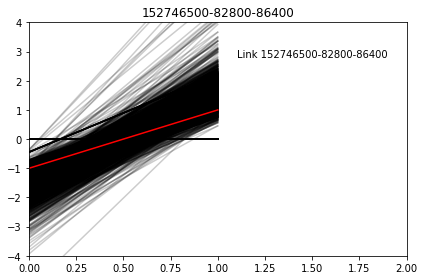

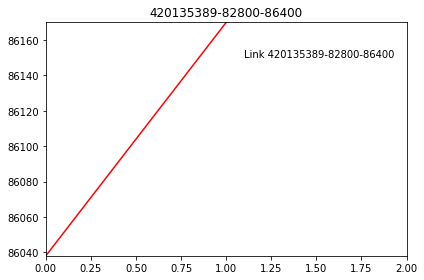

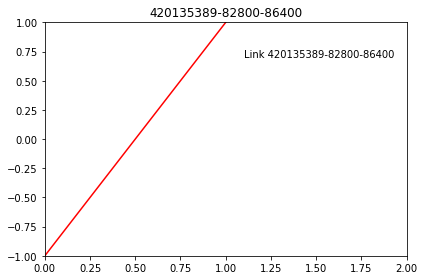

420135389-82800-86400
[547531528, 82800, 86400]: 0.08611061676281614
[547531527, 82800, 86400]: 0.7202503923110551
[8838071, 82800, 86400]: 0.31826750799829506
[159632717, 82800, 86400]: 3.9160930366493116
[152978752, 82800, 86400]: 0.5864960398549814
[159632718, 82800, 86400]: 1.093932639341606
[547531531, 82800, 86400]: 0.6081206329067907
[547531534, 82800, 86400]: 0.6064019852750021
[547531536, 82800, 86400]: 0.05453985387712371
[47876615, 82800, 86400]: 1.4142135623730951
[515675204, 82800, 86400]: 0.3250625082364746
[153947334, 82800, 86400]: 0.34352549782245256
[153947335, 82800, 86400]: 0.329211604553619
[297830232, 82800, 86400]: 0.33071453201343876
[547531526, 82800, 86400]: 0.6081206329067907
[547531532, 82800, 86400]: 0.6038641139404399
[251100155, 82800, 86400]: 1.4142135623730951
[299980276, 82800, 86400]: 0.0
[420135391, 82800, 86400]: 0.31801413244630783
[344864785, 82800, 86400]: 0.4438601748409336
[238610501, 82800, 86400]: 1.1503803297298754
[153021376, 82800, 86400]:

[780908702, 0, 3600]: 1.3540446277728306
[46414952, 0, 3600]: 1.4142135623730951
[547531519, 0, 3600]: 0.8592611294444588
[610577096, 0, 3600]: 0.0
[153035109, 0, 3600]: 1.4142135623730951
[228275490, 0, 3600]: 0.6907910048068665
[134801106, 0, 3600]: 0.0
[688769630, 0, 3600]: 0.9135789765547249
[160470006, 0, 3600]: 0.0
[440530043, 0, 3600]: 0.0
[153947085, 0, 3600]: 1.3132494730240123
[153021373, 0, 3600]: 0.4685528216986643
[440521425, 0, 3600]: 0.9789553591739093
[676148904, 0, 3600]: 0.33461867599699696
[161620470, 0, 3600]: 1.2536082717878352
[440522457, 0, 3600]: 0.4234241562646515
[589547227, 0, 3600]: 0.9648902143451696
[547531518, 0, 3600]: 0.6424258943226785
[160451375, 0, 3600]: 0.10892689574780226
[385857080, 0, 3600]: 1.3763237076651107
[462409680, 0, 3600]: 0.8419990782531385
[423724841, 0, 3600]: 1.4142135623730951
[440530049, 0, 3600]: 0.0
[152679381, 0, 3600]: 0.5126375984846362
[547531511, 0, 3600]: 0.904816953360854
[152895055, 0, 3600]: 0.0
[152925431, 0, 3600]: 0.

[298029518, 0, 3600]: 1.2392793519986995
[681329979, 0, 3600]: 1.0599657060991552
[189677015, 0, 3600]: 0.7652338697039194
[610577095, 0, 3600]: 0.0
[320136018, 0, 3600]: 0.0
[385857079, 0, 3600]: 1.6128145452879605
[320136015, 0, 3600]: 0.0
[718963902, 0, 3600]: 0.0
[152978669, 0, 3600]: 1.3201400007999147
[199795713, 0, 3600]: 0.5073059361772881
[480289626, 0, 3600]: 0.433261318599682
[104082859, 0, 3600]: 1.1425335956950429
[189677036, 0, 3600]: 0.0
[320083327, 0, 3600]: 1.0861412308343406
[153022687, 0, 3600]: 0.0
[189663748, 0, 3600]: 1.0434897286873366
[154149757, 0, 3600]: 0.8727241845011118
[299045402, 0, 3600]: 0.5307205668057632
[441304004, 0, 3600]: 0.0
[157489835, 0, 3600]: 0.4098109802535252
[423239437, 0, 3600]: 0.9250364080930721
[189663744, 0, 3600]: 1.0096459997397291
[420095476, 0, 3600]: 0.6733458857473906
[320136016, 0, 3600]: 0.0
[47876619, 0, 3600]: 0.8971981063667577
[228275487, 0, 3600]: 1.4142135623730951
[40754102, 0, 3600]: 0.3998449818504209
[154150692, 0, 3

[152967672, 25200, 28800]: 0.741633611013003
[153044334, 25200, 28800]: 0.5031646969069448
[780526396, 25200, 28800]: 0.6145003994655297
[515675226, 25200, 28800]: 1.0116240607897624
[515675219, 25200, 28800]: 0.9322552595202989
[230916293, 25200, 28800]: 0.7669180072286982
[160455793, 25200, 28800]: 0.0
[160451392, 25200, 28800]: 2.3339380982188
[459670487, 25200, 28800]: 0.0
[104334703, 25200, 28800]: 1.699594782419683
[152665020, 25200, 28800]: 0.5053353280851088
[298549739, 25200, 28800]: 0.3856850241686098
[674573658, 25200, 28800]: 1.0375903241476012
[441250602, 25200, 28800]: 1.2709607839596166
[297975529, 25200, 28800]: 0.6080289323088623
[251100153, 25200, 28800]: 0.3039205079457309
[153947084, 25200, 28800]: 0.6078593663220783
[189677021, 25200, 28800]: 0.0
[8035448, 25200, 28800]: 0.32556524600865977
[343280103, 25200, 28800]: 0.0
[46430971, 25200, 28800]: 0.0
[152895101, 25200, 28800]: 0.0
[153044335, 25200, 28800]: 0.011010761832722472
[152900418, 25200, 28800]: 0.45057677

[153053630, 75600, 79200]: 1.2698487529870905
[252392916, 75600, 79200]: 0.41833422765731143
[221553433, 75600, 79200]: 0.7941501326423163
[589546192, 75600, 79200]: 0.3776913507499538
[46414951, 75600, 79200]: 0.0
[298925983, 75600, 79200]: 0.4263399353030926
[610949942, 75600, 79200]: 0.0
[589546194, 75600, 79200]: 0.3701558372347665
[189677031, 75600, 79200]: 0.016347635200327018
[589546193, 75600, 79200]: 0.40001289558811165
[221553441, 75600, 79200]: 0.7409661526601076
[589546196, 75600, 79200]: 0.3606451214885066
[153053631, 75600, 79200]: 1.1098840919214483
[228275462, 75600, 79200]: 1.4142135623730951
[153053632, 75600, 79200]: 0.9983320050577525
[189663726, 75600, 79200]: 1.0072142755336098
[221553439, 75600, 79200]: 0.0
[589546198, 75600, 79200]: 0.35413204939668935
[189663725, 75600, 79200]: 1.0625691901415093
[589546197, 75600, 79200]: 0.35162673947702416
[221553435, 75600, 79200]: 0.6459228225473043
[319927894, 75600, 79200]: 5.517036893990117
[252392911, 75600, 79200]: 0.

[154535105, 7200, 10800]: 0.4483842599631416
[299094964, 7200, 10800]: 1.0502342375030649
[443397605, 7200, 10800]: 0.43427943852277706
[154150233, 7200, 10800]: 0.9053539990809222
[152665021, 7200, 10800]: 0.0
[440644907, 7200, 10800]: 0.7682959923337882
[463524775, 7200, 10800]: 0.9240569160847478
[153946077, 7200, 10800]: 0.8929460021576345
[152665008, 7200, 10800]: 1.4142135623730951
[152746487, 7200, 10800]: 1.4142135623730951
[221553424, 7200, 10800]: 1.1497277664545276
[221553427, 7200, 10800]: 0.6419655596957154
[153021405, 7200, 10800]: 1.6708090564667826
[610577103, 7200, 10800]: 0.7436664236289499
[298616189, 7200, 10800]: 0.3697567870093362
[530633120, 7200, 10800]: 1.3540446277728209
[298549750, 7200, 10800]: 0.0
[153044291, 7200, 10800]: 2.2821046924177812
[515863911, 7200, 10800]: 0.0
[153043514, 7200, 10800]: 1.010383366038866
[152900425, 7200, 10800]: 1.4142135623730951
[104334698, 7200, 10800]: 1.0276426912293417
[152967213, 7200, 10800]: 0.349861326638701
[441308431,

[408504582, 79200, 82800]: 0.6420728229996434
[325598326, 79200, 82800]: 1.4068223912667028
[610571175, 79200, 82800]: 1.0628783020876211
[327005895, 79200, 82800]: 0.852791339613624
[297993202, 79200, 82800]: 0.9216109773416369
[188842312, 79200, 82800]: 0.48119502850516477
[60712850, 79200, 82800]: 0.9732602898947784
[153053624, 79200, 82800]: 0.8590439789040978
[297883461, 79200, 82800]: 0.6125465241158604
[153019235, 79200, 82800]: 0.9807708573699763
[462636855, 79200, 82800]: 0.5624684150717033
[160443449, 79200, 82800]: 0.9338973106523166
[780526397, 79200, 82800]: 0.7224527205136186
[238610492, 79200, 82800]: 1.0440334575404255
[220393426, 79200, 82800]: 1.024064083354386
[153798136, 79200, 82800]: 1.1484368835311454
[153000839, 79200, 82800]: 0.6838248376464977
[441497926, 79200, 82800]: 0.7824289956364471
[298782714, 79200, 82800]: 0.5424105349174773
[154535089, 79200, 82800]: 0.8355767487440291
[298932007, 79200, 82800]: 1.0370014512303825
[46429865, 79200, 82800]: 0.13405685

[259110130, 79200, 82800]: 0.0
[301677360, 79200, 82800]: 0.9622130667454757
[153043583, 79200, 82800]: 1.1827217876951974
[298877133, 79200, 82800]: 0.8884994015651451
[153044332, 79200, 82800]: 0.5082309297872157
[441465379, 79200, 82800]: 1.5487893445548493
[188842325, 79200, 82800]: 0.7386794109355732
[8035455, 79200, 82800]: 1.1239497356142392
[385796161, 79200, 82800]: 0.3874946018265786
[104082881, 79200, 82800]: 0.19775754722038932
[463524787, 79200, 82800]: 1.0733569799249842
[411394824, 79200, 82800]: 1.0596262975227717
[385334134, 79200, 82800]: 0.3211279687823213
[298029519, 79200, 82800]: 0.6952951057302507
[152679359, 79200, 82800]: 1.1455220932632295
[160438446, 79200, 82800]: 0.9017516112901284
[459670479, 79200, 82800]: 0.3720648227642739
[153053563, 79200, 82800]: 1.117172546559803
[502511301, 79200, 82800]: 1.1445313268056954
[442372759, 79200, 82800]: 1.0210179376876876
[463524780, 79200, 82800]: 0.0
[437986294, 79200, 82800]: 0.6663380304637658
[442373707, 79200, 8

[188842239, 79200, 82800]: 1.1414415881499722
[152679188, 79200, 82800]: 0.8954309596115716
[152895049, 79200, 82800]: 1.0693055748905516
[275539104, 79200, 82800]: 0.7925215765571532
[152668395, 79200, 82800]: 0.6357577745828904
[459670472, 79200, 82800]: 1.0947121390710153
[439048436, 79200, 82800]: 1.1556856716808985
[152665039, 79200, 82800]: 0.8223066895910819
[8035481, 79200, 82800]: 0.9021946877029979
[297975535, 79200, 82800]: 1.4203227109358223
[516841621, 79200, 82800]: 1.6649204144438745
[408268177, 79200, 82800]: 1.0463061976508201
[487825352, 79200, 82800]: 0.9554790841791859
[188842336, 79200, 82800]: 0.35253637654278824
[161620501, 79200, 82800]: 1.009499377932593
[188842235, 79200, 82800]: 0.9852862249902428
[189424083, 79200, 82800]: 1.0943023873570077
[34700788, 79200, 82800]: 0.4903204020916353
[678035896, 79200, 82800]: 0.7403974049373033
[217603101, 79200, 82800]: 1.215040260786597
[153019281, 79200, 82800]: 1.0010637791774106
[188842257, 79200, 82800]: 0.996199643

[502511294, 79200, 82800]: 1.0846125033018033
[480289617, 79200, 82800]: 1.2518240820178046
[441265802, 79200, 82800]: 0.9274037374655981
[46429888, 79200, 82800]: 0.5984341516783446
[154149753, 79200, 82800]: 1.5994969203281924
[104082910, 79200, 82800]: 0.9957520067133708
[47877709, 79200, 82800]: 0.0
[298029512, 79200, 82800]: 1.1240686210829094
[410013920, 79200, 82800]: 1.2865668989769397
[385621389, 79200, 82800]: 1.5764363493286802
[160449033, 79200, 82800]: 0.548020022955858
[298786467, 79200, 82800]: 1.1014105636361124
[780964778, 79200, 82800]: 1.328464466416448
[152978775, 79200, 82800]: 0.6709105187232312
[60712868, 79200, 82800]: 1.3454783423647267
[297993205, 79200, 82800]: 0.8704278665312906
[152679189, 79200, 82800]: 1.011301612957966
[441250609, 79200, 82800]: 1.1257479498448697
[441455563, 79200, 82800]: 1.2543100967628127
[189452930, 79200, 82800]: 1.1287310706962057
[298925981, 79200, 82800]: 0.7082368981117285
[245336351, 79200, 82800]: 0.9278903462080573
[24533341

[298944623, 79200, 82800]: 1.5513086223928778
[385334128, 79200, 82800]: 0.0
[238610489, 79200, 82800]: 1.2527078067263169
[34700793, 79200, 82800]: 0.9963078647274698
[157489539, 79200, 82800]: 0.7946303335296171
[245333275, 79200, 82800]: 1.0066316493989877
[153044306, 79200, 82800]: 0.785503724240257
[298834963, 79200, 82800]: 0.3673832600766475
[159740345, 79200, 82800]: 0.9969824977242036
[152978665, 79200, 82800]: 0.7152687274928485
[298925943, 79200, 82800]: 1.1572455483365784
[160469981, 79200, 82800]: 0.6351434431233933
[152679199, 79200, 82800]: 0.48082366946936317
[301724753, 79200, 82800]: 1.0465659104317684
[153945677, 79200, 82800]: 1.0015310968859907
[572708713, 79200, 82800]: 1.7390225916687518
[46429871, 79200, 82800]: 0.7949935717393075
[298926209, 79200, 82800]: 0.8076872645870627
[298834960, 79200, 82800]: 0.3988475375487147
[188842285, 79200, 82800]: 1.3556984616290295
[234439483, 79200, 82800]: 0.5458476158744794
[299094981, 79200, 82800]: 0.6759834931980732
[2988

[153035148, 79200, 82800]: 0.0
[153006767, 79200, 82800]: 1.0402870908810025
[22810770, 79200, 82800]: 1.0237509784704113
[459684533, 79200, 82800]: 0.41673491859518047
[385334139, 79200, 82800]: 0.06871589758844951
[297998490, 79200, 82800]: 0.0
[152668384, 79200, 82800]: 0.9323068202882252
[298822852, 79200, 82800]: 0.7450140451963577
[299081209, 79200, 82800]: 1.0950353928560044
[502511291, 79200, 82800]: 0.1027003443131546
[228275512, 79200, 82800]: 1.2790789307781643
[423729707, 79200, 82800]: 0.0
[154535087, 79200, 82800]: 0.8418439867307904
[188842283, 79200, 82800]: 0.78129015834231
[440644894, 79200, 82800]: 0.7183688911837951
[252392913, 79200, 82800]: 1.3080481459952635
[298703038, 79200, 82800]: 1.014729298428912
[298337591, 79200, 82800]: 0.77023498445336
[697192640, 79200, 82800]: 0.7597724866060297
[34700818, 79200, 82800]: 1.0061590065940553
[152679371, 79200, 82800]: 1.4362655932232922
[152665038, 79200, 82800]: 0.8323501148013805
[228275475, 79200, 82800]: 1.201602102

[480289582, 79200, 82800]: 3.136894729544376
[505168799, 79200, 82800]: 0.9003198416403803
[298944625, 79200, 82800]: 1.4398238231506055
[153019258, 79200, 82800]: 1.4371798638647841
[245336354, 79200, 82800]: 0.768276744471542
[152651298, 79200, 82800]: 0.9037189686256217
[47877710, 79200, 82800]: 0.46824204581390316
[153945676, 79200, 82800]: 0.9867175855136462
[234837224, 79200, 82800]: 0.6538055058409867
[248762956, 79200, 82800]: 0.8664992434361855
[320135994, 79200, 82800]: 0.0
[301724761, 79200, 82800]: 1.119916921222182
[779578748, 79200, 82800]: 0.6865621954910811
[462636858, 79200, 82800]: 0.5800735534588605
[248762960, 79200, 82800]: 1.0587512949626106
[385334141, 79200, 82800]: 0.008978860817807032
[161620510, 79200, 82800]: 0.4366204007879932
[423724820, 79200, 82800]: 1.1218434187996977
[8578431, 79200, 82800]: 0.5506675331629786
[152924135, 79200, 82800]: 0.9804599318512837
[153053555, 79200, 82800]: 0.7756022499304143
[286684915, 79200, 82800]: 0.4608327918859894
[24876

[152924206, 79200, 82800]: 0.8078360841392939
[438177908, 79200, 82800]: 0.32069487141231207
[152924944, 79200, 82800]: 0.5209946020699008
[160443456, 79200, 82800]: 0.9863966706142715
[298337593, 79200, 82800]: 0.6703201501933191
[188842331, 79200, 82800]: 1.3478816025520963
[46932864, 79200, 82800]: 0.5348636075313894
[423729709, 79200, 82800]: 0.0
[217603105, 79200, 82800]: 0.8203910146727217
[252392947, 79200, 82800]: 0.4577083996121256
[22810762, 79200, 82800]: 1.011620667261851
[297826869, 79200, 82800]: 0.8819978119506496
[153035158, 79200, 82800]: 0.9449363143162692
[154149755, 79200, 82800]: 0.531689878575173
[301724762, 79200, 82800]: 1.1535481230151274
[152994903, 79200, 82800]: 0.9685384136754329
[154535120, 79200, 82800]: 0.9987332762090477
[153049909, 79200, 82800]: 0.9125075153244875
[153024147, 79200, 82800]: 1.0142218930567546
[299045408, 79200, 82800]: 0.5440940429164175
[385334135, 79200, 82800]: 0.5982495648594034
[188842253, 79200, 82800]: 1.1329521653885901
[15289

[298925982, 79200, 82800]: 0.7779847682282863
[46414962, 79200, 82800]: 0.4483849489481246
[46262599, 79200, 82800]: 0.0
[188842252, 79200, 82800]: 1.1223420196991951
[463524795, 79200, 82800]: 0.7382915200287592
[251098646, 79200, 82800]: 1.0609793795743052
[487825346, 79200, 82800]: 1.0142598472239863
[188842348, 79200, 82800]: 0.8116997792537554
[423724830, 79200, 82800]: 1.1272080324817204
[344864788, 79200, 82800]: 1.1972948315239293
[228275478, 79200, 82800]: 1.0956111567768607
[297883459, 79200, 82800]: 0.38997394158346366
[252835223, 79200, 82800]: 0.9477924752610096
[161620479, 79200, 82800]: 3.14710855519803
[152746484, 79200, 82800]: 1.0542457307327475
[423724835, 79200, 82800]: 1.191659756129573
[160451442, 79200, 82800]: 0.7658606909148944
[188842296, 79200, 82800]: 0.9434660760685526
[8838078, 79200, 82800]: 2.1187186241985625
[252835490, 79200, 82800]: 0.8520609043844021
[462636857, 79200, 82800]: 0.5017996592975746
[153030226, 79200, 82800]: 0.0
[252392944, 79200, 82800

[411394826, 79200, 82800]: 1.306130544998226
[410013921, 79200, 82800]: 1.6130435418640194
[463337397, 79200, 82800]: 1.0526385559829246
[443439114, 79200, 82800]: 0.9527575374002621
[441265803, 79200, 82800]: 0.874717599290102
[8578418, 79200, 82800]: 0.0
[104081821, 79200, 82800]: 1.18141670379163
[160469983, 79200, 82800]: 1.132394168634375
[298932011, 79200, 82800]: 0.7588893999737262
[161620485, 79200, 82800]: 2.423246913473732
[152967238, 79200, 82800]: 0.5154587514008718
[463321553, 79200, 82800]: 0.9577608143919988
[665834898, 79200, 82800]: 1.4806889816003068
[385334125, 79200, 82800]: 0.0
[152656943, 79200, 82800]: 0.978149548802552
[152995655, 79200, 82800]: 2.352867879941974
[46414945, 79200, 82800]: 0.5660686419142612
[410013925, 79200, 82800]: 1.7793708862821607
[152679183, 79200, 82800]: 0.8960120590070884
[547531549, 79200, 82800]: 0.364261640338257
[252835488, 79200, 82800]: 0.879440316678532
[610571164, 79200, 82800]: 1.7898921799110221
[320136008, 79200, 82800]: 1.12

[319927893, 79200, 82800]: 1.5421881585789767
[676152424, 79200, 82800]: 0.623843736376763
[153022715, 79200, 82800]: 0.9588276896335028
[248762954, 79200, 82800]: 0.8944880832430212
[408268174, 79200, 82800]: 1.1045559309685737
[153035154, 79200, 82800]: 0.9151559733363519
[159740341, 79200, 82800]: 0.9403989446765537
[153041117, 79200, 82800]: 0.8809797377848102
[153001159, 79200, 82800]: 0.4470394501936012
[344864792, 79200, 82800]: 1.1396852289772081
[298782715, 79200, 82800]: 0.5775290703045692
[480289618, 79200, 82800]: 1.1298600462138648
[676436351, 79200, 82800]: 1.7115440570431968
[152924943, 79200, 82800]: 0.5596372582046393
[610571162, 79200, 82800]: 1.0555740125970525
[298786504, 79200, 82800]: 0.651820587802119
[160469987, 79200, 82800]: 1.024845433548888
[152924139, 79200, 82800]: 0.0
[516841615, 79200, 82800]: 1.136347536155039
[780989733, 79200, 82800]: 0.900296518277785
[153035163, 79200, 82800]: 0.64980711349749
[153004049, 79200, 82800]: 0.5862577773954678
[298925932

[780483752, 79200, 82800]: 1.1309095881061613
[491822823, 79200, 82800]: 0.8313231282419155
[188842279, 79200, 82800]: 1.8727570880204512
[153055989, 79200, 82800]: 1.1081662468321147
[191003450, 79200, 82800]: 1.186661436599225
[441455571, 79200, 82800]: 1.1019984105777552
[346316343, 79200, 82800]: 0.9013922349479438
[299018405, 79200, 82800]: 0.9992942907730629
[443405864, 79200, 82800]: 1.3451313293543092
[676166106, 79200, 82800]: 0.935034878966018
[8035470, 79200, 82800]: 1.1571865530433518
[159740337, 79200, 82800]: 1.1797547199578249
[153019256, 79200, 82800]: 0.2677681707218859
[22810764, 79200, 82800]: 1.1166614432557143
[160443448, 79200, 82800]: 0.9404754862065575
[423724821, 79200, 82800]: 1.144591026166982
[298703028, 79200, 82800]: 1.0391660447697726
[161620516, 79200, 82800]: 0.8984802991498685
[385331947, 79200, 82800]: 1.0472274360341518
[297996748, 79200, 82800]: 0.0
[301854509, 79200, 82800]: 1.0249317806997273
[46430968, 79200, 82800]: 1.1515407080641287
[298703048

[346316344, 79200, 82800]: 0.8562612843567836
[22810750, 79200, 82800]: 1.0241688686809158
[153019297, 79200, 82800]: 0.0
[153019241, 79200, 82800]: 0.6114962790642556
[152668391, 79200, 82800]: 0.6199978288374239
[158618964, 79200, 82800]: 0.9919616074925508
[238609964, 79200, 82800]: 0.0
[22810766, 79200, 82800]: 1.2570997240598205
[440644898, 79200, 82800]: 0.5518576532325793
[46429885, 79200, 82800]: 0.07564294903832475
[298503412, 79200, 82800]: 1.2564633112611723
[420076281, 79200, 82800]: 1.115056419394282
[8035467, 79200, 82800]: 0.89598352872602
[153041108, 79200, 82800]: 0.0
[259110133, 79200, 82800]: 0.0
[8035578, 79200, 82800]: 1.1164032444976102
[161620515, 79200, 82800]: 0.9022333495069954
[238610486, 79200, 82800]: 2.524598776815373
[154535132, 79200, 82800]: 1.2054406427881676
[152924196, 79200, 82800]: 1.4523815851494348
[152679377, 79200, 82800]: 1.1736145215480542
[589546219, 79200, 82800]: 1.1821873164686263
[220393424, 79200, 82800]: 0.9877065702731928
[152746463, 

[301677364, 79200, 82800]: 1.0814053560168728
[502501392, 79200, 82800]: 0.9942637900409826
[46430965, 79200, 82800]: 0.892835120306439
[155685563, 79200, 82800]: 0.9570066216914299
[160443451, 79200, 82800]: 1.0001176875786149
[152900390, 79200, 82800]: 1.064916439764137
[320136011, 79200, 82800]: 1.3913965001992594
[152900434, 79200, 82800]: 0.3368277119449569
[160466240, 79200, 82800]: 0.0
[152924186, 79200, 82800]: 0.0
[480289602, 79200, 82800]: 0.7618281105733021
[160438435, 79200, 82800]: 1.1505838041158165
[298925929, 79200, 82800]: 0.9761740328236184
[443439116, 79200, 82800]: 0.9476070539294311
[154151045, 79200, 82800]: 0.9685988024843059
[46932870, 79200, 82800]: 0.46886246635552564
[780918888, 79200, 82800]: 0.8853532009558681
[189677007, 79200, 82800]: 1.0858429352981547
[408268178, 79200, 82800]: 1.1390251897363695
[442373621, 79200, 82800]: 0.8598173051134035
[286684920, 79200, 82800]: 1.0112774903568993
[424918857, 79200, 82800]: 1.5073017664073622
[298822856, 79200, 82

[8578413, 46800, 50400]: 0.5630625872022849
[46414929, 46800, 50400]: 0.5107777817874878
[153043525, 46800, 50400]: 1.2634799925198315
[153022677, 46800, 50400]: 0.7146648698914515
[299081220, 46800, 50400]: 0.0
[8035531, 46800, 50400]: 0.4884250627695176
[153043528, 46800, 50400]: 0.4659850547460755
[152679216, 46800, 50400]: 0.5046529693324223
[152679329, 46800, 50400]: 0.24357845331162248
[46414930, 46800, 50400]: 0.3369813803140285
[152924137, 46800, 50400]: 0.0
[152967815, 46800, 50400]: 0.6316826094839406
[480289589, 46800, 50400]: 0.32150576904673417
[152679327, 46800, 50400]: 0.584473466889417
[152980827, 46800, 50400]: 1.112468092243634
[298727574, 46800, 50400]: 1.4220841267879778
[443397609, 46800, 50400]: 0.6474431606167456
[385334092, 46800, 50400]: 0.38069971092216437
[676950794, 46800, 50400]: 0.0
[152967648, 46800, 50400]: 0.9411224406543058
[160451443, 46800, 50400]: 1.4987278704551565
[152960506, 46800, 50400]: 0.7981698852079958
[152960505, 46800, 50400]: 0.600151543

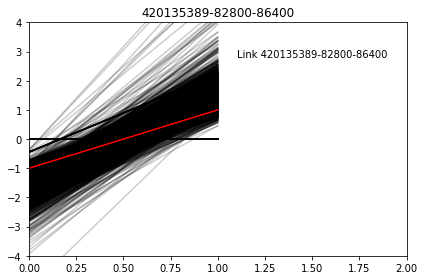

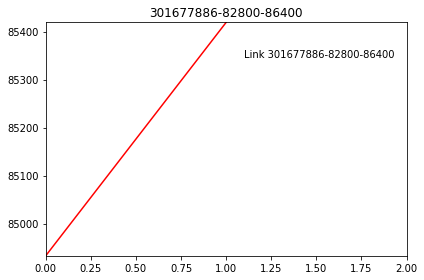

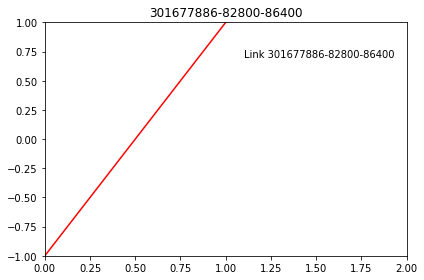

301677886-82800-86400
[547531528, 82800, 86400]: 0.08611061676281614
[547531527, 82800, 86400]: 0.7202503923110551
[8838071, 82800, 86400]: 0.31826750799829506
[159632717, 82800, 86400]: 3.9160930366493116
[152978752, 82800, 86400]: 0.5864960398549814
[159632718, 82800, 86400]: 1.093932639341606
[547531531, 82800, 86400]: 0.6081206329067907
[547531534, 82800, 86400]: 0.6064019852750021
[547531536, 82800, 86400]: 0.05453985387712371
[47876615, 82800, 86400]: 1.4142135623730951
[515675204, 82800, 86400]: 0.3250625082364746
[153947334, 82800, 86400]: 0.34352549782245256
[153947335, 82800, 86400]: 0.329211604553619
[297830232, 82800, 86400]: 0.33071453201343876
[547531526, 82800, 86400]: 0.6081206329067907
[547531532, 82800, 86400]: 0.6038641139404399
[251100155, 82800, 86400]: 1.4142135623730951
[299980276, 82800, 86400]: 0.0
[420135391, 82800, 86400]: 0.31801413244630783
[344864785, 82800, 86400]: 0.4438601748409336
[238610501, 82800, 86400]: 1.1503803297298754
[153021376, 82800, 86400]:

[152746501, 0, 3600]: 0.0
[676148903, 0, 3600]: 0.3359618243502448
[152665066, 0, 3600]: 0.8001582640848132
[440530034, 0, 3600]: 0.0
[152895057, 0, 3600]: 0.0
[423239433, 0, 3600]: 1.027630618811496
[157489812, 0, 3600]: 0.3680820977881003
[688769624, 0, 3600]: 0.9636607455612876
[299081203, 0, 3600]: 0.5369233632746313
[493523036, 0, 3600]: 0.6206195046038567
[299893495, 0, 3600]: 0.32894666633676256
[533580370, 0, 3600]: 0.0
[153022686, 0, 3600]: 1.3540446277728466
[152924144, 0, 3600]: 0.5006701678810506
[462409674, 0, 3600]: 1.0122469257273616
[153021406, 0, 3600]: 0.0
[533580371, 0, 3600]: 0.48132498129903617
[104082863, 0, 3600]: 1.3540446277728464
[245338049, 0, 3600]: 1.0985352521948955
[152679356, 0, 3600]: 1.0522579853739333
[152665019, 0, 3600]: 0.0
[441304002, 0, 3600]: 0.0
[153021396, 0, 3600]: 1.3540446277728457
[440530039, 0, 3600]: 0.0
[385796152, 0, 3600]: 0.4766731582100597
[423239434, 0, 3600]: 0.3526024765895228
[189424090, 0, 3600]: 0.0
[141129791, 0, 3600]: 0.890

[152967187, 0, 3600]: 1.1358505719295784
[440530045, 0, 3600]: 0.0
[286684921, 0, 3600]: 0.0
[319950436, 0, 3600]: 1.4142135623730951
[420095469, 0, 3600]: 0.6513031038664964
[547531520, 0, 3600]: 1.0223008211800437
[152978667, 0, 3600]: 0.4761403643308086
[681329975, 0, 3600]: 0.594282740947233
[505168806, 0, 3600]: 0.39672082419313964
[547531514, 0, 3600]: 1.2369525374270012
[252392824, 0, 3600]: 1.4142135623730951
[153035113, 0, 3600]: 0.0
[153019271, 0, 3600]: 1.4197767492934696
[153006791, 0, 3600]: 1.4142135623730951
[228275497, 0, 3600]: 0.6912677066227504
[160470003, 0, 3600]: 0.0
[547531521, 0, 3600]: 1.2164223764569717
[152980846, 0, 3600]: 1.7952645753893746
[286685258, 0, 3600]: 1.1297465704051364
[780908704, 0, 3600]: 0.7932408688235785
[157489831, 0, 3600]: 0.3892242857247898
[47876620, 0, 3600]: 0.6716256218201005
[440530047, 0, 3600]: 0.0
[299893497, 0, 3600]: 0.7234345771216337
[104082896, 0, 3600]: 0.0
[153030235, 0, 3600]: 0.0
[152679415, 0, 3600]: 0.5611292553095459

[152665033, 25200, 28800]: 0.0
[674573659, 25200, 28800]: 1.0339345760322947
[779578739, 25200, 28800]: 0.04312504869010898
[152895087, 25200, 28800]: 0.15189824086032822
[152967673, 25200, 28800]: 0.5364107642327619
[160451394, 25200, 28800]: 1.1785252119629563
[251100151, 25200, 28800]: 0.19698108072970488
[189424071, 25200, 28800]: 0.6841512736449322
[515675221, 25200, 28800]: 0.5565014864373726
[619535885, 25200, 28800]: 0.0
[189424072, 25200, 28800]: 0.5074772410722825
[286685263, 25200, 28800]: 0.9591518934964853
[697192602, 25200, 28800]: 0.33070862615857877
[152679311, 25200, 28800]: 0.5393143044321103
[153050014, 25200, 28800]: 0.6770286167801627
[152967671, 25200, 28800]: 0.6116019380355497
[46430972, 25200, 28800]: 0.0
[153024149, 25200, 28800]: 0.31786768097205714
[160444155, 25200, 28800]: 0.4462273084938374
[153050016, 25200, 28800]: 0.0
[665834891, 25200, 28800]: 0.46430156725770466
[665834890, 25200, 28800]: 0.0
[160444152, 25200, 28800]: 0.4321273797907509
[153947384, 

[154535106, 7200, 10800]: 0.7156588863546578
[154149764, 7200, 10800]: 0.44456431020682136
[152967215, 7200, 10800]: 0.550946821416222
[780549446, 7200, 10800]: 0.6493325599331756
[104334696, 7200, 10800]: 1.3522339246099129
[676703081, 7200, 10800]: 1.329344147077538
[547531506, 7200, 10800]: 0.0
[153947383, 7200, 10800]: 1.1525334473281768
[385793314, 7200, 10800]: 0.8745023698155869
[420135402, 7200, 10800]: 1.4142135623730951
[152900381, 7200, 10800]: 0.3223002577056486
[298623932, 7200, 10800]: 0.0
[160451380, 7200, 10800]: 1.07842787699524
[152978770, 7200, 10800]: 0.810680295922434
[154535107, 7200, 10800]: 0.4270259535430264
[189663749, 7200, 10800]: 1.3924396586575165
[423239440, 7200, 10800]: 0.9440715064830705
[493523038, 7200, 10800]: 0.0
[22810919, 7200, 10800]: 0.7195639340263448
[160451382, 7200, 10800]: 1.1120786350335163
[160470000, 7200, 10800]: 1.4142135623730951
[160451381, 7200, 10800]: 1.104308106722109
[298692636, 7200, 10800]: 1.2196198200599928
[697192618, 7200

[153019299, 79200, 82800]: 0.9376038611692861
[152900389, 79200, 82800]: 0.7732826037572095
[188842245, 79200, 82800]: 1.2544748680577567
[418178082, 79200, 82800]: 1.5767780171336803
[152746382, 79200, 82800]: 1.164517502654353
[47876606, 79200, 82800]: 0.0
[8035444, 79200, 82800]: 1.1804059018536786
[515699253, 79200, 82800]: 3.0372931846351974
[228275471, 79200, 82800]: 1.1573542103736087
[410013917, 79200, 82800]: 0.4706444197597347
[299094939, 79200, 82800]: 0.4654849752165928
[189677011, 79200, 82800]: 0.9886491649308546
[160449032, 79200, 82800]: 0.8291400936497137
[191620663, 79200, 82800]: 0.26517737111048906
[22810756, 79200, 82800]: 1.171655207730721
[153053621, 79200, 82800]: 0.5112082150505852
[676950799, 79200, 82800]: 0.9470983252364922
[153019295, 79200, 82800]: 0.7321002181938339
[154534951, 79200, 82800]: 0.7265511366356584
[459670471, 79200, 82800]: 1.0346721557258496
[346316341, 79200, 82800]: 0.8770745281610114
[418178084, 79200, 82800]: 0.521370210003213
[44064489

[697192672, 79200, 82800]: 0.724064041918574
[152978773, 79200, 82800]: 0.7823219836995579
[189677012, 79200, 82800]: 0.9323213922200816
[153035193, 79200, 82800]: 0.5758571495521781
[159740376, 79200, 82800]: 0.37215818044783744
[34700817, 79200, 82800]: 1.0486423494603667
[153035257, 79200, 82800]: 0.0
[153035182, 79200, 82800]: 0.9672550911590916
[153006807, 79200, 82800]: 0.01278787799630125
[442373725, 79200, 82800]: 0.6710832155938703
[154149750, 79200, 82800]: 0.8690589397536391
[188842233, 79200, 82800]: 0.9640000002608418
[46414948, 79200, 82800]: 1.0334823795477999
[676950779, 79200, 82800]: 0.6628164707229145
[152653013, 79200, 82800]: 0.9850296787840719
[152995664, 79200, 82800]: 0.7414403961256304
[480289565, 79200, 82800]: 2.1261348922198886
[34700792, 79200, 82800]: 0.9859107306181017
[480289604, 79200, 82800]: 0.4481408591507529
[153035190, 79200, 82800]: 0.34570466090368007
[153035168, 79200, 82800]: 1.7316598724096524
[441265807, 79200, 82800]: 1.0412787062867086
[410

[781786569, 79200, 82800]: 1.2894009951872416
[463524785, 79200, 82800]: 1.4093416666671084
[81869222, 79200, 82800]: 1.0112405053680367
[299094984, 79200, 82800]: 1.645130600514951
[152924204, 79200, 82800]: 0.0
[188842344, 79200, 82800]: 0.6909764810208479
[152679198, 79200, 82800]: 1.6937681442001722
[153035280, 79200, 82800]: 0.0
[676950801, 79200, 82800]: 0.8290872353801314
[259109259, 79200, 82800]: 0.263131828485048
[327005892, 79200, 82800]: 1.0235645517247138
[493523047, 79200, 82800]: 0.5102611122364832
[299081213, 79200, 82800]: 0.0
[104082873, 79200, 82800]: 0.5016171452923146
[104081786, 79200, 82800]: 0.6491831596083498
[152900399, 79200, 82800]: 0.7190130927978307
[46932867, 79200, 82800]: 0.48292434777267185
[252835214, 79200, 82800]: 0.8542596709404819
[298503410, 79200, 82800]: 1.7069020943942625
[152746446, 79200, 82800]: 1.250861193993141
[8035573, 79200, 82800]: 1.1589108520958205
[443405851, 79200, 82800]: 1.0105424852794909
[152980877, 79200, 82800]: 0.8974728015

[298925981, 79200, 82800]: 0.7082368981117285
[245336351, 79200, 82800]: 0.9278903462080573
[245333411, 79200, 82800]: 1.1213321186450413
[161620514, 79200, 82800]: 1.4998830946835169
[299094971, 79200, 82800]: 1.033633725084645
[217603102, 79200, 82800]: 1.5454481660818182
[189677006, 79200, 82800]: 1.0643738130151734
[516841623, 79200, 82800]: 1.1900334910563075
[245336352, 79200, 82800]: 0.7783888332950103
[780483747, 79200, 82800]: 1.1576346884808744
[152976627, 79200, 82800]: 1.0481077069791465
[153035179, 79200, 82800]: 0.9919432938735411
[153947390, 79200, 82800]: 1.0032745221166353
[189452946, 79200, 82800]: 1.1126118431397016
[441250598, 79200, 82800]: 0.6972370043415064
[152668412, 79200, 82800]: 0.19647100426581166
[409377698, 79200, 82800]: 0.669242883941723
[159740346, 79200, 82800]: 0.7185396279963495
[420076291, 79200, 82800]: 0.0
[8035500, 79200, 82800]: 0.0
[299024303, 79200, 82800]: 1.1206892264607824
[589546204, 79200, 82800]: 2.3877793968855623
[153043606, 79200, 82

[154534957, 79200, 82800]: 0.849670302642266
[252835486, 79200, 82800]: 0.8790079637487371
[301724750, 79200, 82800]: 0.8389194426358371
[188842246, 79200, 82800]: 1.1884310608297088
[298716244, 79200, 82800]: 1.2216799991490703
[462409676, 79200, 82800]: 0.7266713374344439
[188842295, 79200, 82800]: 1.070215585396552
[81869223, 79200, 82800]: 0.9972493040740719
[245333282, 79200, 82800]: 2.177170570950681
[572708719, 79200, 82800]: 1.5613857394898325
[189677009, 79200, 82800]: 1.045907799196313
[423724827, 79200, 82800]: 1.1339531828857696
[299081211, 79200, 82800]: 0.0
[152995673, 79200, 82800]: 0.9087375642865227
[441304017, 79200, 82800]: 1.0259607183892459
[424918871, 79200, 82800]: 0.9134616315570651
[152924207, 79200, 82800]: 1.0925618338608138
[22810760, 79200, 82800]: 1.0218678178364835
[344851284, 79200, 82800]: 0.7910227978797301
[251098780, 79200, 82800]: 0.2744817530683577
[443405862, 79200, 82800]: 1.2933780216314315
[153053557, 79200, 82800]: 1.134436608898941
[252835218

[152994904, 79200, 82800]: 1.1080759111252185
[515699251, 79200, 82800]: 1.6928988302360946
[373003231, 79200, 82800]: 1.2804387447625978
[153041715, 79200, 82800]: 0.8957318723707159
[298822861, 79200, 82800]: 1.1308884224096305
[195407898, 79200, 82800]: 0.6524158045927534
[516508096, 79200, 82800]: 0.7376581226503834
[152900386, 79200, 82800]: 0.42145840126841144
[463337402, 79200, 82800]: 1.0177099347241882
[104082912, 79200, 82800]: 0.7121154258450885
[152976619, 79200, 82800]: 0.0
[160440586, 79200, 82800]: 0.31775135340987876
[325598341, 79200, 82800]: 0.5673257785435373
[248762944, 79200, 82800]: 1.1196643650359719
[152746450, 79200, 82800]: 1.270606434385916
[423724812, 79200, 82800]: 0.9119920910284708
[298623917, 79200, 82800]: 0.7051310243453103
[152995665, 79200, 82800]: 0.5564679452080475
[5069463, 79200, 82800]: 1.2755196757776088
[189677002, 79200, 82800]: 0.8835286775219996
[298843857, 79200, 82800]: 0.48380310467101395
[152967676, 79200, 82800]: 0.10445299375101152
[1

[298822848, 79200, 82800]: 0.9310191062892861
[297998497, 79200, 82800]: 0.0
[172232826, 79200, 82800]: 1.0109202269004942
[442373728, 79200, 82800]: 1.3531555227830656
[502511307, 79200, 82800]: 0.8472228045793515
[153050034, 79200, 82800]: 1.0977510633019416
[780989739, 79200, 82800]: 0.47278801706873136
[152656805, 79200, 82800]: 0.8131931192907957
[172232824, 79200, 82800]: 1.0542704248162043
[158618963, 79200, 82800]: 0.919016749081534
[158618962, 79200, 82800]: 0.9097318831523863
[188842318, 79200, 82800]: 1.0326941967341792
[344864787, 79200, 82800]: 1.148333260255594
[441304018, 79200, 82800]: 1.0782419688413787
[217603104, 79200, 82800]: 0.7546019967312841
[252835216, 79200, 82800]: 1.0419168447278688
[781786566, 79200, 82800]: 0.3370444911022512
[153798134, 79200, 82800]: 1.0918026405380357
[779578745, 79200, 82800]: 0.8325815392007546
[298237452, 79200, 82800]: 1.0913955193587201
[589546203, 79200, 82800]: 2.384413767734344
[412018368, 79200, 82800]: 0.0
[153019290, 79200, 8

[152924944, 79200, 82800]: 0.5209946020699008
[160443456, 79200, 82800]: 0.9863966706142715
[298337593, 79200, 82800]: 0.6703201501933191
[188842331, 79200, 82800]: 1.3478816025520963
[46932864, 79200, 82800]: 0.5348636075313894
[423729709, 79200, 82800]: 0.0
[217603105, 79200, 82800]: 0.8203910146727217
[252392947, 79200, 82800]: 0.4577083996121256
[22810762, 79200, 82800]: 1.011620667261851
[297826869, 79200, 82800]: 0.8819978119506496
[153035158, 79200, 82800]: 0.9449363143162692
[154149755, 79200, 82800]: 0.531689878575173
[301724762, 79200, 82800]: 1.1535481230151274
[152994903, 79200, 82800]: 0.9685384136754329
[154535120, 79200, 82800]: 0.9987332762090477
[153049909, 79200, 82800]: 0.9125075153244875
[153024147, 79200, 82800]: 1.0142218930567546
[299045408, 79200, 82800]: 0.5440940429164175
[385334135, 79200, 82800]: 0.5982495648594034
[188842253, 79200, 82800]: 1.1329521653885901
[152895079, 79200, 82800]: 0.718758440774375
[127127911, 79200, 82800]: 0.9436812470803062
[1894240

[441455566, 79200, 82800]: 1.4060487951693161
[531317453, 79200, 82800]: 0.7444395223992293
[152976621, 79200, 82800]: 1.040593134574903
[440644905, 79200, 82800]: 0.9399929578545104
[157488898, 79200, 82800]: 1.0516516773409812
[301724748, 79200, 82800]: 0.7473255312078586
[46594679, 79200, 82800]: 0.4993687213514058
[385334123, 79200, 82800]: 0.0
[346316345, 79200, 82800]: 0.9405509798030561
[152977271, 79200, 82800]: 0.0
[34700790, 79200, 82800]: 0.7774549544470742
[141129798, 79200, 82800]: 0.37527811285640883
[8035480, 79200, 82800]: 0.9441115823953941
[319927912, 79200, 82800]: 0.0
[779578746, 79200, 82800]: 0.7152076641685243
[441497927, 79200, 82800]: 0.6385443538398348
[8035530, 79200, 82800]: 1.159318047367307
[46414937, 79200, 82800]: 0.5565215230993918
[374771720, 79200, 82800]: 0.0
[228275476, 79200, 82800]: 1.2221930903029512
[780964775, 79200, 82800]: 1.0764080161580996
[160455776, 79200, 82800]: 0.9838799423787374
[189452934, 79200, 82800]: 0.4056311694414437
[154149754

[154534954, 79200, 82800]: 0.800600901363827
[298925927, 79200, 82800]: 0.7609689153685781
[463524783, 79200, 82800]: 0.0
[152679361, 79200, 82800]: 1.045325150232161
[385332400, 79200, 82800]: 0.7462573650739233
[301724746, 79200, 82800]: 0.7737158482301754
[152900397, 79200, 82800]: 0.47845531711876266
[153035275, 79200, 82800]: 0.9831793081936278
[438172973, 79200, 82800]: 2.0311593226405513
[491822820, 79200, 82800]: 0.9084339747825663
[153049962, 79200, 82800]: 1.121565224614344
[153004036, 79200, 82800]: 0.09599154827892505
[152967600, 79200, 82800]: 0.8213073215328189
[153053620, 79200, 82800]: 0.480792164360183
[152994912, 79200, 82800]: 0.4263756721165391
[299094982, 79200, 82800]: 0.7305460811130691
[153019240, 79200, 82800]: 1.0029846915656737
[152966816, 79200, 82800]: 0.9130622835113884
[298503438, 79200, 82800]: 0.0
[153035195, 79200, 82800]: 0.4908724365971234
[153035283, 79200, 82800]: 0.0
[189663728, 79200, 82800]: 1.0919372727380996
[153000940, 79200, 82800]: 0.982325

[152746381, 79200, 82800]: 1.1625463081859786
[141130093, 79200, 82800]: 0.9454810404136407
[463524781, 79200, 82800]: 0.0
[153049915, 79200, 82800]: 1.2560351339517926
[572708712, 79200, 82800]: 0.48916490587180517
[188842276, 79200, 82800]: 1.8199955561101135
[344851264, 79200, 82800]: 0.7043520488256473
[298925923, 79200, 82800]: 0.8792171982378443
[152924946, 79200, 82800]: 0.6269628350178806
[245336353, 79200, 82800]: 0.7648177180023478
[298932005, 79200, 82800]: 1.043527524508684
[491822824, 79200, 82800]: 0.6994499347076036
[152977264, 79200, 82800]: 0.7278582702688349
[649730255, 79200, 82800]: 0.9142640946013176
[297971530, 79200, 82800]: 1.5140448149468466
[195407908, 79200, 82800]: 1.107418971816271
[159740897, 79200, 82800]: 0.9646137078743697
[154535121, 79200, 82800]: 0.9062464976440922
[152978734, 79200, 82800]: 1.8221003663103812
[152665065, 79200, 82800]: 1.7133231468724077
[153019274, 79200, 82800]: 1.1990139119800052
[152746362, 79200, 82800]: 0.9335828435412578
[301

[298616208, 79200, 82800]: 1.0531894226008642
[234837225, 79200, 82800]: 0.6147603122853664
[438177899, 79200, 82800]: 0.8302834830670749
[152679362, 79200, 82800]: 1.2033364956336576
[154537279, 79200, 82800]: 0.9951024806940628
[441250596, 79200, 82800]: 0.6026408482709468
[152668417, 79200, 82800]: 0.33753236237657464
[152978776, 79200, 82800]: 0.8946463264076557
[152746453, 79200, 82800]: 1.0726286840296995
[152895083, 79200, 82800]: 0.716129807185851
[530633118, 79200, 82800]: 0.6324018271767827
[153021414, 79200, 82800]: 3.3077459986818205
[441455572, 79200, 82800]: 0.9378671417745094
[346316344, 79200, 82800]: 0.8562612843567836
[22810750, 79200, 82800]: 1.0241688686809158
[153019297, 79200, 82800]: 0.0
[153019241, 79200, 82800]: 0.6114962790642556
[152668391, 79200, 82800]: 0.6199978288374239
[158618964, 79200, 82800]: 0.9919616074925508
[238609964, 79200, 82800]: 0.0
[22810766, 79200, 82800]: 1.2570997240598205
[440644898, 79200, 82800]: 0.5518576532325793
[46429885, 79200, 82

[153022771, 79200, 82800]: 1.0089766644790241
[8838081, 79200, 82800]: 2.198525403420708
[674556445, 79200, 82800]: 0.34653847637237456
[252392938, 79200, 82800]: 0.8967403846601766
[515699255, 79200, 82800]: 3.2660529633470805
[298925972, 79200, 82800]: 1.5922210697562638
[153035305, 79200, 82800]: 0.9940863361273651
[299018408, 79200, 82800]: 0.9660498443334866
[34700813, 79200, 82800]: 1.0663845543585575
[153798140, 79200, 82800]: 1.1000769417436425
[153041327, 79200, 82800]: 0.6108131837016997
[252392942, 79200, 82800]: 1.3454437793099363
[298786471, 79200, 82800]: 1.0751568879820483
[104081818, 79200, 82800]: 0.8672688552529335
[298925964, 79200, 82800]: 0.9394919874284574
[385619275, 79200, 82800]: 1.960030915986477
[153044302, 79200, 82800]: 0.734619151858754
[298822847, 79200, 82800]: 0.8874827048724807
[252835210, 79200, 82800]: 0.9845900646466164
[153049966, 79200, 82800]: 1.1025998398170365
[674556448, 79200, 82800]: 0.42205190450306923
[135719161, 79200, 82800]: 0.970362804

[160451462, 46800, 50400]: 0.8178736430821707
[152980864, 46800, 50400]: 1.3551379582039151
[299018410, 46800, 50400]: 0.6342487810075257
[8169123, 46800, 50400]: 0.899829767726045
[418094195, 46800, 50400]: 1.0020219271918407
[385334095, 46800, 50400]: 0.288128177074885
[546853687, 46800, 50400]: 0.7709997011401313
[259111299, 46800, 50400]: 0.6467396473414769
[152960508, 46800, 50400]: 0.0
[298418290, 46800, 50400]: 0.0
[152960510, 46800, 50400]: 0.3630095693927008
[259111298, 46800, 50400]: 0.5581709316246896
[298237442, 46800, 50400]: 0.8886850096585988
[298726735, 46800, 50400]: 1.1817945091643234
[502511268, 46800, 50400]: 1.3105954459447418
[244021208, 46800, 50400]: 0.25693852828241065
[298237444, 46800, 50400]: 0.675038972028404
[160458427, 46800, 50400]: 0.0
[780970465, 46800, 50400]: 0.835345988353962
[8578408, 46800, 50400]: 1.651858104948541
[160458428, 46800, 50400]: 0.0
[81797896, 46800, 50400]: 0.40783075734988095
[298703052, 46800, 50400]: 1.0129171788583475
[298418289

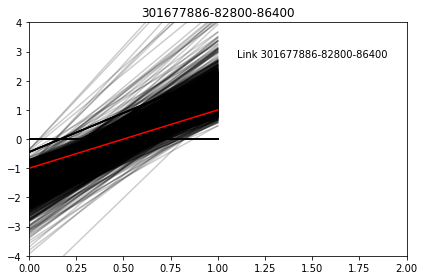

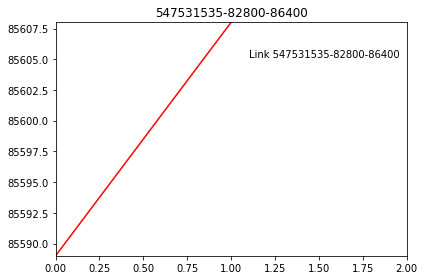

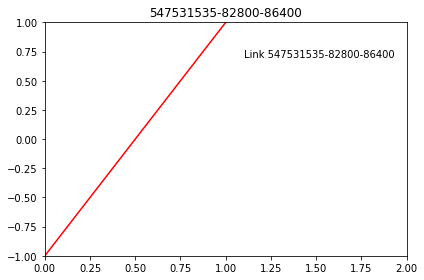

547531535-82800-86400
[547531528, 82800, 86400]: 0.08611061676281614
[547531527, 82800, 86400]: 0.7202503923110551
[8838071, 82800, 86400]: 0.31826750799829506
[159632717, 82800, 86400]: 3.9160930366493116
[152978752, 82800, 86400]: 0.5864960398549814
[159632718, 82800, 86400]: 1.093932639341606
[547531531, 82800, 86400]: 0.6081206329067907
[547531534, 82800, 86400]: 0.6064019852750021
[547531536, 82800, 86400]: 0.05453985387712371
[47876615, 82800, 86400]: 1.4142135623730951
[515675204, 82800, 86400]: 0.3250625082364746
[153947334, 82800, 86400]: 0.34352549782245256
[153947335, 82800, 86400]: 0.329211604553619
[297830232, 82800, 86400]: 0.33071453201343876
[547531526, 82800, 86400]: 0.6081206329067907
[547531532, 82800, 86400]: 0.6038641139404399
[251100155, 82800, 86400]: 1.4142135623730951
[299980276, 82800, 86400]: 0.0
[420135391, 82800, 86400]: 0.31801413244630783
[344864785, 82800, 86400]: 0.4438601748409336
[238610501, 82800, 86400]: 1.1503803297298754
[153021376, 82800, 86400]:

[153035335, 0, 3600]: 0.0
[160470005, 0, 3600]: 0.0
[157489814, 0, 3600]: 0.55778019878731
[161620464, 0, 3600]: 1.0002624081333829
[160462989, 0, 3600]: 1.3540446277728524
[589547184, 0, 3600]: 0.8908317282635698
[718963845, 0, 3600]: 0.0
[152746451, 0, 3600]: 0.7933818837831199
[718964925, 0, 3600]: 0.0
[681329981, 0, 3600]: 0.4349202695457835
[152977263, 0, 3600]: 0.8106412477606485
[104082897, 0, 3600]: 0.0
[697819362, 0, 3600]: 0.0
[440530040, 0, 3600]: 0.0
[462409678, 0, 3600]: 0.6290768876897168
[299045404, 0, 3600]: 0.3243394109584823
[154537264, 0, 3600]: 0.008884846973286824
[286685259, 0, 3600]: 0.8192057213504307
[161620472, 0, 3600]: 1.1469356565040747
[153035112, 0, 3600]: 0.0
[547531512, 0, 3600]: 1.1314753859356843
[154534948, 0, 3600]: 0.0
[154149756, 0, 3600]: 0.9118866679781621
[152679220, 0, 3600]: 0.7877782250228365
[141129794, 0, 3600]: 1.0218597347749836
[779578736, 0, 3600]: 1.0435862061101933
[160451372, 0, 3600]: 1.8520854526301371
[440530050, 0, 3600]: 0.0
[1

[441304000, 0, 3600]: 0.0
[440530033, 0, 3600]: 0.4591331789373052
[153947368, 0, 3600]: 0.9153944666965418
[440530028, 0, 3600]: 0.0
[154535123, 0, 3600]: 0.48175719776031234
[153947369, 0, 3600]: 0.9039348015566251
[245336350, 0, 3600]: 0.7915031213321967
[153019267, 0, 3600]: 1.2640280452241623
[160451389, 0, 3600]: 0.0
[104082899, 0, 3600]: 0.0
[154150694, 0, 3600]: 1.3540446277728448
[152978735, 0, 3600]: 1.0319439867538776
[152967644, 0, 3600]: 0.3575498257991355
[153053653, 0, 3600]: 0.0
[152746502, 0, 3600]: 0.335531970716557
[141129793, 0, 3600]: 0.7952233708590724
[152925430, 0, 3600]: 0.0
[153947081, 0, 3600]: 1.0419482382600371
[141130095, 0, 3600]: 1.4142135623730951
[423239435, 0, 3600]: 0.8824372555423329
[244021195, 0, 3600]: 0.6586459649610296
[299893500, 0, 3600]: 0.9494130701824851
[174924978, 0, 3600]: 0.7337861465241304
[462409673, 0, 3600]: 0.9913407129602437
[775436080, 0, 3600]: 0.7849366919942566
[502508508, 0, 3600]: 1.4142135623730951
[154537262, 0, 3600]: 0.

[152679415, 0, 3600]: 0.5611292553095459
[234352584, 0, 3600]: 0.8281747874653436
[420095471, 0, 3600]: 0.37464081962673673
[441497929, 0, 3600]: 0.35655899481074554
[161620463, 0, 3600]: 1.4142135623730951
[152651317, 0, 3600]: 1.0754340395587372
[462409681, 0, 3600]: 0.0
[440521426, 0, 3600]: 1.2283638413240185
[189677014, 0, 3600]: 0.9957449833720524
[681329977, 0, 3600]: 0.9166317411199508
[5135004, 0, 3600]: 1.4142135623730951
[547531509, 0, 3600]: 0.7746143488292532
[547531513, 0, 3600]: 0.8887996405939397
[153050027, 0, 3600]: 0.3680820977881003
[154150690, 0, 3600]: 0.0
[697192626, 0, 3600]: 0.5937367013573592
[159632857, 0, 3600]: 0.07559974030158563
[47876611, 10800, 14400]: 0.7831211308485945
[298337584, 10800, 14400]: 0.3182142180299844
[298616194, 10800, 14400]: 0.0
[344864781, 10800, 14400]: 0.5700829120477101
[104081803, 10800, 14400]: 0.6692657254480137
[768569228, 10800, 14400]: 0.983007615135022
[768569226, 10800, 14400]: 1.0311617850534425
[153056031, 10800, 14400]: 

[286685264, 25200, 28800]: 0.57265699390619
[397153555, 25200, 28800]: 1.0377557221708593
[104081775, 25200, 28800]: 0.768800523411803
[459670488, 25200, 28800]: 0.0
[437982141, 25200, 28800]: 0.8118823024629581
[610942261, 25200, 28800]: 0.0
[160455790, 25200, 28800]: 0.0
[259111294, 25200, 28800]: 0.3333697939706405
[60712846, 25200, 28800]: 0.0
[160455788, 25200, 28800]: 0.0
[437982143, 25200, 28800]: 0.6196612584516031
[60712849, 25200, 28800]: 0.0
[525894358, 25200, 28800]: 0.4617862462233243
[775436042, 25200, 28800]: 0.7030077923595608
[610574083, 25200, 28800]: 0.0
[610942259, 25200, 28800]: 0.46775537973648673
[152895085, 25200, 28800]: 0.0
[153044316, 25200, 28800]: 0.3278368359775487
[153050010, 25200, 28800]: 0.41820959187930035
[160444153, 25200, 28800]: 0.6443855281063627
[160444157, 25200, 28800]: 1.2502145296086633
[252392921, 25200, 28800]: 0.0
[480282272, 25200, 28800]: 0.0
[515675224, 25200, 28800]: 1.0848905916687095
[153050011, 25200, 28800]: 0.5815827258932016
[29

[247141051, 7200, 10800]: 0.3243394109584566
[221553422, 7200, 10800]: 0.4272791226379194
[319899452, 7200, 10800]: 0.0
[159632887, 7200, 10800]: 1.1984143259882563
[152900438, 7200, 10800]: 0.40660905639938383
[221553420, 7200, 10800]: 0.5439886359668586
[493523041, 7200, 10800]: 0.5564798005996516
[154150232, 7200, 10800]: 0.857843970950742
[152967205, 7200, 10800]: 0.666688876553328
[515863910, 7200, 10800]: 0.0
[297829485, 7200, 10800]: 0.0
[441250591, 7200, 10800]: 1.2898876560063346
[589546199, 7200, 10800]: 1.1770611144897007
[675346502, 7200, 10800]: 0.50789005696802
[152900432, 7200, 10800]: 0.32640158686561616
[319899453, 7200, 10800]: 0.43702109061261174
[104334708, 7200, 10800]: 1.1528453311180706
[152665024, 7200, 10800]: 0.40854953097747454
[441250593, 7200, 10800]: 0.924467262663997
[152900427, 7200, 10800]: 0.3755286445847942
[152665022, 7200, 10800]: 0.26100448071538124
[152665026, 7200, 10800]: 0.0
[440536711, 7200, 10800]: 1.4142135623730951
[160470001, 7200, 10800]:

[298237464, 36000, 39600]: 0.34332065790853644
[697192636, 79200, 82800]: 1.4502490955553273
[516841619, 79200, 82800]: 0.696838792787296
[298944621, 79200, 82800]: 1.490377279280301
[298947985, 79200, 82800]: 0.8582086329588351
[589546217, 79200, 82800]: 1.3096720634608925
[153019298, 79200, 82800]: 0.9687554302719305
[320064974, 79200, 82800]: 0.0
[298925978, 79200, 82800]: 0.9890649948390421
[153022736, 79200, 82800]: 1.3354265932414924
[502511303, 79200, 82800]: 1.015149415346782
[157489536, 79200, 82800]: 1.2170685188255186
[325598329, 79200, 82800]: 0.7131967498721302
[189452923, 79200, 82800]: 1.03107934960821
[298703039, 79200, 82800]: 1.0581100619299622
[153035251, 79200, 82800]: 0.0
[589546228, 79200, 82800]: 1.2201373735857173
[252392951, 79200, 82800]: 1.7972127164030662
[161620497, 79200, 82800]: 0.9877286355972742
[516508074, 79200, 82800]: 1.2640197943621843
[153049903, 79200, 82800]: 0.7841356862564857
[154151044, 79200, 82800]: 0.9407026097524712
[154534962, 79200, 828

[152679374, 79200, 82800]: 0.9702127937584872
[153945673, 79200, 82800]: 0.9551426866966254
[275345111, 79200, 82800]: 0.5199639896563982
[297975534, 79200, 82800]: 1.0732491740082413
[298616206, 79200, 82800]: 1.0851594168983447
[711367803, 79200, 82800]: 1.5258802173964587
[153044324, 79200, 82800]: 1.0473596171640398
[301603270, 79200, 82800]: 1.3679713886500557
[189676995, 79200, 82800]: 1.1453536940888296
[141129799, 79200, 82800]: 0.3886161799463074
[153049975, 79200, 82800]: 1.2144554264165375
[154537280, 79200, 82800]: 1.033079492498827
[665834896, 79200, 82800]: 1.164022861465527
[81797663, 79200, 82800]: 0.6700805373550157
[152746377, 79200, 82800]: 0.8321356890548591
[153053669, 79200, 82800]: 0.6557055149077706
[423724806, 79200, 82800]: 0.9852367568820097
[299045405, 79200, 82800]: 0.0
[152746490, 79200, 82800]: 0.8182908839678724
[572708709, 79200, 82800]: 0.48915077615442487
[153019237, 79200, 82800]: 0.7868935543887212
[493523048, 79200, 82800]: 0.38556646890147256
[464

[515699259, 79200, 82800]: 1.80775311695087
[420076109, 79200, 82800]: 1.1573253031631345
[152978771, 79200, 82800]: 0.9813117631735185
[320136009, 79200, 82800]: 1.085703765964943
[299018407, 79200, 82800]: 1.0520132253694703
[189452928, 79200, 82800]: 1.1036321133717903
[152679372, 79200, 82800]: 1.2671460373407224
[297996746, 79200, 82800]: 0.033764910481174755
[228275509, 79200, 82800]: 1.0365201291119497
[320064977, 79200, 82800]: 0.0
[160443450, 79200, 82800]: 0.9895931421120451
[104081738, 79200, 82800]: 1.2239420258684646
[505168991, 79200, 82800]: 1.2298425004043474
[157489531, 79200, 82800]: 1.1420650633331904
[780964776, 79200, 82800]: 1.064431213421642
[152679279, 79200, 82800]: 0.3859840901566678
[344851273, 79200, 82800]: 0.7672899926489406
[152746391, 79200, 82800]: 0.8534108414062382
[298877134, 79200, 82800]: 0.9811361368654316
[298925926, 79200, 82800]: 0.6282426253164273
[780989738, 79200, 82800]: 2.2572394475177995
[491822821, 79200, 82800]: 0.8323226899853737
[1527

[152746446, 79200, 82800]: 1.250861193993141
[8035573, 79200, 82800]: 1.1589108520958205
[443405851, 79200, 82800]: 1.0105424852794909
[152980877, 79200, 82800]: 0.8974728015546994
[152924200, 79200, 82800]: 0.0
[154539331, 79200, 82800]: 0.0
[153050033, 79200, 82800]: 1.1159920458953863
[191003459, 79200, 82800]: 0.3781035736575185
[298623921, 79200, 82800]: 0.16053880514380275
[253717642, 79200, 82800]: 0.9774453450862856
[480289564, 79200, 82800]: 0.9065115258532496
[420076111, 79200, 82800]: 2.197060945412497
[188842281, 79200, 82800]: 0.7040950036266679
[298925973, 79200, 82800]: 1.5230902069224246
[179351239, 79200, 82800]: 1.6570787353288894
[245333409, 79200, 82800]: 1.1690207055576816
[157489541, 79200, 82800]: 0.7456832101314372
[152668382, 79200, 82800]: 1.6506296371811304
[157488902, 79200, 82800]: 1.0495430864354256
[153000827, 79200, 82800]: 1.1224426282273834
[442373716, 79200, 82800]: 1.9546152214357515
[779578749, 79200, 82800]: 0.7223623780822293
[8578384, 79200, 8280

[60712868, 79200, 82800]: 1.3454783423647267
[297993205, 79200, 82800]: 0.8704278665312906
[152679189, 79200, 82800]: 1.011301612957966
[441250609, 79200, 82800]: 1.1257479498448697
[441455563, 79200, 82800]: 1.2543100967628127
[189452930, 79200, 82800]: 1.1287310706962057
[298925981, 79200, 82800]: 0.7082368981117285
[245336351, 79200, 82800]: 0.9278903462080573
[245333411, 79200, 82800]: 1.1213321186450413
[161620514, 79200, 82800]: 1.4998830946835169
[299094971, 79200, 82800]: 1.033633725084645
[217603102, 79200, 82800]: 1.5454481660818182
[189677006, 79200, 82800]: 1.0643738130151734
[516841623, 79200, 82800]: 1.1900334910563075
[245336352, 79200, 82800]: 0.7783888332950103
[780483747, 79200, 82800]: 1.1576346884808744
[152976627, 79200, 82800]: 1.0481077069791465
[153035179, 79200, 82800]: 0.9919432938735411
[153947390, 79200, 82800]: 1.0032745221166353
[189452946, 79200, 82800]: 1.1126118431397016
[441250598, 79200, 82800]: 0.6972370043415064
[152668412, 79200, 82800]: 0.19647100

[385331944, 79200, 82800]: 1.175770465895714
[60712867, 79200, 82800]: 1.339434179075593
[344864791, 79200, 82800]: 1.0334733037726813
[152980850, 79200, 82800]: 1.4301037938721544
[152924133, 79200, 82800]: 0.7400537126220562
[780211970, 79200, 82800]: 0.7670228722624265
[152978774, 79200, 82800]: 0.69260706330265
[154534957, 79200, 82800]: 0.849670302642266
[252835486, 79200, 82800]: 0.8790079637487371
[301724750, 79200, 82800]: 0.8389194426358371
[188842246, 79200, 82800]: 1.1884310608297088
[298716244, 79200, 82800]: 1.2216799991490703
[462409676, 79200, 82800]: 0.7266713374344439
[188842295, 79200, 82800]: 1.070215585396552
[81869223, 79200, 82800]: 0.9972493040740719
[245333282, 79200, 82800]: 2.177170570950681
[572708719, 79200, 82800]: 1.5613857394898325
[189677009, 79200, 82800]: 1.045907799196313
[423724827, 79200, 82800]: 1.1339531828857696
[299081211, 79200, 82800]: 0.0
[152995673, 79200, 82800]: 0.9087375642865227
[441304017, 79200, 82800]: 1.0259607183892459
[424918871, 7

[157489535, 79200, 82800]: 1.4271574272941943
[247141039, 79200, 82800]: 0.8652707982462221
[298623911, 79200, 82800]: 1.010603295002497
[230916288, 79200, 82800]: 0.4535652120759974
[153001158, 79200, 82800]: 0.5627390785248733
[5135003, 79200, 82800]: 1.0056623047576276
[103934326, 79200, 82800]: 1.0396730704504624
[572708717, 79200, 82800]: 1.1621573439245942
[531278237, 79200, 82800]: 1.3066676054437052
[160466236, 79200, 82800]: 0.3939062067815879
[299094985, 79200, 82800]: 0.42823802090946356
[153044300, 79200, 82800]: 0.5880392397865566
[420076112, 79200, 82800]: 1.3210663067657993
[152679192, 79200, 82800]: 1.0859838288516435
[502511311, 79200, 82800]: 1.1778916395465762
[228275464, 79200, 82800]: 0.3841631293759347
[153945667, 79200, 82800]: 1.01654057601095
[298926206, 79200, 82800]: 0.6970706696487843
[103933159, 79200, 82800]: 0.7665089747906906
[234352597, 79200, 82800]: 0.49291697076120083
[188842286, 79200, 82800]: 1.357179463159888
[320136010, 79200, 82800]: 1.297153469

[248762952, 79200, 82800]: 1.0523172219685235
[160455778, 79200, 82800]: 0.7924929319656778
[153035234, 79200, 82800]: 1.2021952252135393
[259109262, 79200, 82800]: 0.8631252824076026
[409377702, 79200, 82800]: 1.1499755580580224
[408268183, 79200, 82800]: 1.2656158281039829
[152746375, 79200, 82800]: 1.1401265278887773
[252835219, 79200, 82800]: 0.8435362439605221
[459684532, 79200, 82800]: 0.3356530498573087
[298926207, 79200, 82800]: 0.8059033183351831
[160455779, 79200, 82800]: 0.7568179369038626
[152900398, 79200, 82800]: 0.4899733982930974
[153000838, 79200, 82800]: 0.675104855954607
[153945674, 79200, 82800]: 1.0117857055151258
[298786499, 79200, 82800]: 0.924536825290199
[153053561, 79200, 82800]: 1.1349409482541384
[248762958, 79200, 82800]: 0.859614414180041
[195407910, 79200, 82800]: 1.0529072822994179
[238609965, 79200, 82800]: 0.2114750735117583
[152967746, 79200, 82800]: 0.3750903614959157
[189663721, 79200, 82800]: 0.9424752646374204
[104081820, 79200, 82800]: 1.12215110

[252392947, 79200, 82800]: 0.4577083996121256
[22810762, 79200, 82800]: 1.011620667261851
[297826869, 79200, 82800]: 0.8819978119506496
[153035158, 79200, 82800]: 0.9449363143162692
[154149755, 79200, 82800]: 0.531689878575173
[301724762, 79200, 82800]: 1.1535481230151274
[152994903, 79200, 82800]: 0.9685384136754329
[154535120, 79200, 82800]: 0.9987332762090477
[153049909, 79200, 82800]: 0.9125075153244875
[153024147, 79200, 82800]: 1.0142218930567546
[299045408, 79200, 82800]: 0.5440940429164175
[385334135, 79200, 82800]: 0.5982495648594034
[188842253, 79200, 82800]: 1.1329521653885901
[152895079, 79200, 82800]: 0.718758440774375
[127127911, 79200, 82800]: 0.9436812470803062
[189424076, 79200, 82800]: 0.0
[153798135, 79200, 82800]: 1.019740030954619
[46932873, 79200, 82800]: 0.45702996282287467
[152679404, 79200, 82800]: 1.3577550730683003
[697192637, 79200, 82800]: 0.7636392070126853
[442373719, 79200, 82800]: 0.5975039601936771
[259109266, 79200, 82800]: 0.4531907382012779
[3016773

[152679278, 79200, 82800]: 0.36076106379479195
[189424094, 79200, 82800]: 0.8469219091227332
[297882687, 79200, 82800]: 0.8927012530457833
[152895046, 79200, 82800]: 1.22293701111658
[410013913, 79200, 82800]: 1.0392220789308402
[104082907, 79200, 82800]: 0.8336262333687037
[298925982, 79200, 82800]: 0.7779847682282863
[46414962, 79200, 82800]: 0.4483849489481246
[46262599, 79200, 82800]: 0.0
[188842252, 79200, 82800]: 1.1223420196991951
[463524795, 79200, 82800]: 0.7382915200287592
[251098646, 79200, 82800]: 1.0609793795743052
[487825346, 79200, 82800]: 1.0142598472239863
[188842348, 79200, 82800]: 0.8116997792537554
[423724830, 79200, 82800]: 1.1272080324817204
[344864788, 79200, 82800]: 1.1972948315239293
[228275478, 79200, 82800]: 1.0956111567768607
[297883459, 79200, 82800]: 0.38997394158346366
[252835223, 79200, 82800]: 0.9477924752610096
[161620479, 79200, 82800]: 3.14710855519803
[152746484, 79200, 82800]: 1.0542457307327475
[423724835, 79200, 82800]: 1.191659756129573
[1604514

[298237445, 79200, 82800]: 0.9936427005286536
[385334140, 79200, 82800]: 0.38182596530183943
[385334137, 79200, 82800]: 0.5114341471985371
[297970847, 79200, 82800]: 0.023353037293545074
[441455574, 79200, 82800]: 1.188138547107845
[423724801, 79200, 82800]: 0.989531540027839
[438177913, 79200, 82800]: 0.5244234887097943
[346316355, 79200, 82800]: 0.8795370731407671
[153049971, 79200, 82800]: 1.1852609977549249
[301724766, 79200, 82800]: 0.9826667034254615
[245334304, 79200, 82800]: 0.45301363249079335
[81797654, 79200, 82800]: 1.077308362368363
[674556447, 79200, 82800]: 0.4581855344014434
[251098649, 79200, 82800]: 0.8954343738398974
[152924195, 79200, 82800]: 1.2038993415046284
[420080356, 79200, 82800]: 0.9035566520021856
[298834961, 79200, 82800]: 0.33430708077231497
[154534958, 79200, 82800]: 0.9222256485419352
[441455575, 79200, 82800]: 1.1029603279472413
[439048429, 79200, 82800]: 1.4324373210424581
[153035176, 79200, 82800]: 1.0585083739339645
[423724834, 79200, 82800]: 1.1914

[152924943, 79200, 82800]: 0.5596372582046393
[610571162, 79200, 82800]: 1.0555740125970525
[298786504, 79200, 82800]: 0.651820587802119
[160469987, 79200, 82800]: 1.024845433548888
[152924139, 79200, 82800]: 0.0
[516841615, 79200, 82800]: 1.136347536155039
[780989733, 79200, 82800]: 0.900296518277785
[153035163, 79200, 82800]: 0.64980711349749
[153004049, 79200, 82800]: 0.5862577773954678
[298925932, 79200, 82800]: 1.0111241906856698
[245334389, 79200, 82800]: 0.6556964865342804
[46429879, 79200, 82800]: 0.5281576944678358
[320135997, 79200, 82800]: 0.0
[547531548, 79200, 82800]: 0.3560357508350699
[153044330, 79200, 82800]: 0.5358635956861076
[320136152, 79200, 82800]: 2.200728602632101
[515699257, 79200, 82800]: 1.8172055163822183
[248762961, 79200, 82800]: 1.1093424097453015
[161620476, 79200, 82800]: 0.7298049405548477
[780918889, 79200, 82800]: 0.786267110468603
[8035479, 79200, 82800]: 1.0854032607109516
[153053562, 79200, 82800]: 1.1561786890701566
[674556442, 79200, 82800]: 0.

[159740337, 79200, 82800]: 1.1797547199578249
[153019256, 79200, 82800]: 0.2677681707218859
[22810764, 79200, 82800]: 1.1166614432557143
[160443448, 79200, 82800]: 0.9404754862065575
[423724821, 79200, 82800]: 1.144591026166982
[298703028, 79200, 82800]: 1.0391660447697726
[161620516, 79200, 82800]: 0.8984802991498685
[385331947, 79200, 82800]: 1.0472274360341518
[297996748, 79200, 82800]: 0.0
[301854509, 79200, 82800]: 1.0249317806997273
[46430968, 79200, 82800]: 1.1515407080641287
[298703048, 79200, 82800]: 1.0477772830900334
[589546223, 79200, 82800]: 1.1073269618490729
[299094983, 79200, 82800]: 1.0693659606502623
[298623912, 79200, 82800]: 1.0075914818450524
[8035468, 79200, 82800]: 0.9336907213681659
[46430974, 79200, 82800]: 0.27390311841005455
[154149752, 79200, 82800]: 1.04932237883624
[160449031, 79200, 82800]: 1.7005379830899063
[22810754, 79200, 82800]: 1.2066770723582874
[298926211, 79200, 82800]: 0.7173982203176668
[152665044, 79200, 82800]: 0.9577394864746843
[161620491,

[275345109, 79200, 82800]: 0.32624171091825344
[8578354, 79200, 82800]: 0.24073798641042185
[152679370, 79200, 82800]: 1.9757031818106645
[610571173, 79200, 82800]: 0.11387339850876978
[76191298, 79200, 82800]: 0.6164898986239684
[8035469, 79200, 82800]: 1.0199539458804086
[160449034, 79200, 82800]: 0.5239602987480363
[46932857, 79200, 82800]: 0.0
[297975693, 79200, 82800]: 1.694855066078834
[153041333, 79200, 82800]: 0.0
[299709197, 79200, 82800]: 1.4932559304221178
[297993206, 79200, 82800]: 1.2678920832190643
[780964781, 79200, 82800]: 0.0
[153041104, 79200, 82800]: 0.4928482574463225
[297970846, 79200, 82800]: 0.07487035381648592
[440521433, 79200, 82800]: 0.574829621755626
[153001127, 79200, 82800]: 0.8952581328834627
[34700789, 79200, 82800]: 0.5292938455153463
[245333410, 79200, 82800]: 1.1318989143622733
[610571160, 79200, 82800]: 0.9708201671681368
[298699134, 79200, 82800]: 1.3354436664262215
[157489534, 79200, 82800]: 1.5869891298192909
[252835220, 79200, 82800]: 0.855450603

[238609960, 79200, 82800]: 0.15994081349072867
[408268180, 79200, 82800]: 0.9665970783743335
[423724813, 79200, 82800]: 0.9342057534982491
[152651321, 79200, 82800]: 0.7702126468208342
[259111671, 79200, 82800]: 0.0
[423724831, 79200, 82800]: 1.232204545509686
[245334394, 79200, 82800]: 0.05824118913673941
[385334118, 79200, 82800]: 0.0
[195407916, 79200, 82800]: 1.0040156951437944
[572708710, 79200, 82800]: 0.246660554582994
[159740343, 79200, 82800]: 0.8006726077037518
[298925979, 79200, 82800]: 0.8609306853483134
[252392940, 79200, 82800]: 0.9030234944223855
[487825349, 79200, 82800]: 1.0768507140402126
[188842261, 79200, 82800]: 1.1089073448996476
[153053685, 79200, 82800]: 0.7484872330846382
[153004044, 79200, 82800]: 0.41575340066914757
[411394823, 79200, 82800]: 0.7513546678026127
[299032765, 79200, 82800]: 1.0445688072218313
[46429867, 79200, 82800]: 0.811946946401287
[153049906, 79200, 82800]: 1.113069066560776
[298616192, 79200, 82800]: 0.9661903524497646
[157489542, 79200, 8

[546853685, 46800, 50400]: 0.0
[135719162, 46800, 50400]: 0.6389734239713958
[153044326, 46800, 50400]: 0.9521468424022093
[418178078, 46800, 50400]: 0.38875581479347043
[160451463, 46800, 50400]: 0.6521634486313876
[152967824, 46800, 50400]: 0.5068681990118071
[104081769, 46800, 50400]: 0.47316911196530176
[8578410, 46800, 50400]: 0.719104992257084
[47876621, 46800, 50400]: 0.0
[8578400, 46800, 50400]: 0.0
[153035201, 46800, 50400]: 0.27972283970070294
[160451462, 46800, 50400]: 0.8178736430821707
[152980864, 46800, 50400]: 1.3551379582039151
[299018410, 46800, 50400]: 0.6342487810075257
[8169123, 46800, 50400]: 0.899829767726045
[418094195, 46800, 50400]: 1.0020219271918407
[385334095, 46800, 50400]: 0.288128177074885
[546853687, 46800, 50400]: 0.7709997011401313
[259111299, 46800, 50400]: 0.6467396473414769
[152960508, 46800, 50400]: 0.0
[298418290, 46800, 50400]: 0.0
[152960510, 46800, 50400]: 0.3630095693927008
[259111298, 46800, 50400]: 0.5581709316246896
[298237442, 46800, 50400

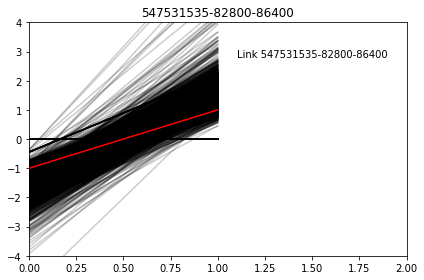

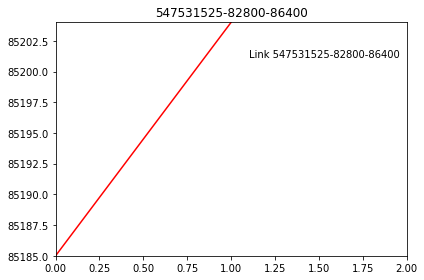

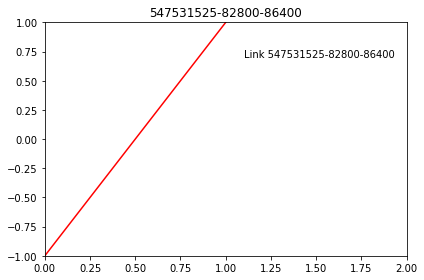

547531525-82800-86400
[547531528, 82800, 86400]: 0.08611061676281614
[547531527, 82800, 86400]: 0.7202503923110551
[8838071, 82800, 86400]: 0.31826750799829506
[159632717, 82800, 86400]: 3.9160930366493116
[152978752, 82800, 86400]: 0.5864960398549814
[159632718, 82800, 86400]: 1.093932639341606
[547531531, 82800, 86400]: 0.6081206329067907
[547531534, 82800, 86400]: 0.6064019852750021
[547531536, 82800, 86400]: 0.05453985387712371
[47876615, 82800, 86400]: 1.4142135623730951
[515675204, 82800, 86400]: 0.3250625082364746
[153947334, 82800, 86400]: 0.34352549782245256
[153947335, 82800, 86400]: 0.329211604553619
[297830232, 82800, 86400]: 0.33071453201343876
[547531526, 82800, 86400]: 0.6081206329067907
[547531532, 82800, 86400]: 0.6038641139404399
[251100155, 82800, 86400]: 1.4142135623730951
[299980276, 82800, 86400]: 0.0
[420135391, 82800, 86400]: 0.31801413244630783
[344864785, 82800, 86400]: 0.4438601748409336
[238610501, 82800, 86400]: 1.1503803297298754
[153021376, 82800, 86400]:

[779578736, 0, 3600]: 1.0435862061101933
[160451372, 0, 3600]: 1.8520854526301371
[440530050, 0, 3600]: 0.0
[161620465, 0, 3600]: 0.9499870249648488
[153000853, 0, 3600]: 0.9156039238936661
[152980882, 0, 3600]: 1.535317233218172
[228275491, 0, 3600]: 0.6180395918182225
[154150230, 0, 3600]: 1.1180339887498876
[152996534, 0, 3600]: 0.0
[104082880, 0, 3600]: 0.0
[152967646, 0, 3600]: 0.7611473679197299
[423239438, 0, 3600]: 0.7291667677279271
[675092020, 0, 3600]: 0.5163961349118356
[697819363, 0, 3600]: 0.0
[152980843, 0, 3600]: 1.1710992732963255
[423724842, 0, 3600]: 0.290900683086842
[157489834, 0, 3600]: 0.5873383900314786
[152978672, 0, 3600]: 0.6181847168171992
[547531516, 0, 3600]: 1.1674553362619975
[440521424, 0, 3600]: 1.304401035737697
[297971534, 0, 3600]: 1.4142135623730951
[157488722, 0, 3600]: 0.0
[152967148, 0, 3600]: 1.4142135623730951
[152679218, 0, 3600]: 0.14401207363330237
[780911242, 0, 3600]: 0.7930075974641119
[104081781, 0, 3600]: 0.0
[153019269, 0, 3600]: 0.78

[718963676, 0, 3600]: 0.0
[234345996, 0, 3600]: 1.4142135623730951
[441304001, 0, 3600]: 0.6688561609372314
[502501384, 0, 3600]: 0.0
[153006793, 0, 3600]: 0.43533167884205826
[152895056, 0, 3600]: 0.0
[134801107, 0, 3600]: 0.0
[688769623, 0, 3600]: 0.8952466909782008
[152679221, 0, 3600]: 0.3325485838174021
[718963662, 0, 3600]: 0.0
[681329980, 0, 3600]: 1.278500054693866
[441497930, 0, 3600]: 0.0
[298337589, 0, 3600]: 0.798956244695178
[420095473, 0, 3600]: 0.6963717318366592
[423239429, 0, 3600]: 0.9224134962972107
[688769627, 0, 3600]: 0.9877139708016022
[675092021, 0, 3600]: 0.5149771201906757
[299893498, 0, 3600]: 0.8637766000876486
[159632858, 0, 3600]: 0.0
[299081200, 0, 3600]: 0.9682288148023548
[104081780, 0, 3600]: 0.0
[385619164, 0, 3600]: 1.1120387478598042
[299893499, 0, 3600]: 0.8459718755574694
[420095474, 0, 3600]: 0.0
[438172985, 0, 3600]: 0.03163482921545303
[153946072, 0, 3600]: 0.0
[152679414, 0, 3600]: 0.3350494105667819
[711385801, 0, 3600]: 1.0000348950294866
[1

[153053593, 3600, 7200]: 0.0
[688769629, 3600, 7200]: 1.7050802432907897
[234332718, 3600, 7200]: 0.0
[462617694, 3600, 7200]: 0.0
[462617691, 3600, 7200]: 0.0
[462617692, 3600, 7200]: 0.0
[234332716, 3600, 7200]: 0.0
[152928143, 3600, 7200]: 0.0
[153035117, 3600, 7200]: 0.0
[189465476, 3600, 7200]: 0.0
[160444150, 3600, 7200]: 0.0
[779578743, 3600, 7200]: 0.0
[134801096, 3600, 7200]: 0.0
[152925433, 3600, 7200]: 0.0
[153035243, 3600, 7200]: 0.0
[141129801, 3600, 7200]: 0.0
[440622911, 3600, 7200]: 0.0
[298623925, 25200, 28800]: 0.8146241656777476
[154535093, 25200, 28800]: 0.7433405891246084
[259111292, 25200, 28800]: 0.4937622677977638
[104334702, 25200, 28800]: 0.6921328440260579
[230916295, 25200, 28800]: 0.2535426513078576
[153022658, 25200, 28800]: 0.0
[610942260, 25200, 28800]: 0.0
[160451393, 25200, 28800]: 1.3142693443814257
[153947080, 25200, 28800]: 1.0111154073404554
[159740395, 25200, 28800]: 0.0
[441462652, 25200, 28800]: 0.6996280543939452
[298865303, 25200, 28800]: 1.02

[153053631, 75600, 79200]: 1.1098840919214483
[228275462, 75600, 79200]: 1.4142135623730951
[153053632, 75600, 79200]: 0.9983320050577525
[189663726, 75600, 79200]: 1.0072142755336098
[221553439, 75600, 79200]: 0.0
[589546198, 75600, 79200]: 0.35413204939668935
[189663725, 75600, 79200]: 1.0625691901415093
[589546197, 75600, 79200]: 0.35162673947702416
[221553435, 75600, 79200]: 0.6459228225473043
[319927894, 75600, 79200]: 5.517036893990117
[252392911, 75600, 79200]: 0.0
[46594670, 75600, 79200]: 0.0
[221553434, 75600, 79200]: 0.8563741205822915
[252392915, 75600, 79200]: 0.4217184855124976
[153947082, 75600, 79200]: 0.0
[221553438, 75600, 79200]: 0.33438628954581595
[221553437, 75600, 79200]: 0.0
[153053633, 75600, 79200]: 0.977606819773462
[298925984, 75600, 79200]: 0.4093062141712642
[221553440, 75600, 79200]: 0.7141375669123344
[319927896, 75600, 79200]: 3.4666846954710513
[221553436, 75600, 79200]: 0.5391547923295751
[589546195, 75600, 79200]: 0.3651519902459311
[189677032, 75600

[438177909, 7200, 10800]: 0.7943144949786188
[437986296, 54000, 57600]: 0.0
[161620525, 28800, 32400]: 0.0
[161620523, 28800, 32400]: 0.0
[516841608, 28800, 32400]: 0.0
[161620524, 28800, 32400]: 0.0
[443439111, 28800, 32400]: 1.0654446648793443
[161620520, 28800, 32400]: 0.0
[161620526, 28800, 32400]: 0.0
[161620528, 28800, 32400]: 0.0
[152656834, 28800, 32400]: 0.318371414643488
[161620522, 28800, 32400]: 0.0
[152656833, 28800, 32400]: 0.3179921850551811
[441250604, 28800, 32400]: 1.028654261190413
[161620519, 28800, 32400]: 0.0
[161620521, 28800, 32400]: 0.0
[697192647, 64800, 68400]: 0.0
[697192650, 64800, 68400]: 0.3178372451957821
[103934325, 64800, 68400]: 0.6487977296823624
[697192646, 64800, 68400]: 0.3271720901975068
[440521435, 64800, 68400]: 0.0
[441250618, 57600, 61200]: 0.6835151862929509
[152978699, 57600, 61200]: 0.0
[441250617, 57600, 61200]: 1.3675481557746667
[441250616, 57600, 61200]: 1.376205250051307
[191003438, 57600, 61200]: 0.0
[441250615, 57600, 61200]: 0.5977

[5069455, 79200, 82800]: 1.760708366797619
[674556449, 79200, 82800]: 0.7261728660365305
[152900395, 79200, 82800]: 0.6883982790679221
[251098781, 79200, 82800]: 0.0
[344864794, 79200, 82800]: 1.0101076565913392
[547531545, 79200, 82800]: 0.39251378289432465
[298925922, 79200, 82800]: 0.9082823245838495
[153022656, 79200, 82800]: 0.9215643717703015
[8035555, 79200, 82800]: 0.9969198421785053
[251098937, 79200, 82800]: 0.0
[697192634, 79200, 82800]: 0.954094949632569
[385334115, 79200, 82800]: 0.0
[442373722, 79200, 82800]: 1.2968321246534567
[299045397, 79200, 82800]: 0.0
[423239423, 79200, 82800]: 0.0
[153049961, 79200, 82800]: 1.1119043689539845
[46414963, 79200, 82800]: 0.7299155562251325
[443405863, 79200, 82800]: 1.2732044236798379
[298237453, 79200, 82800]: 1.0633375338989681
[81797661, 79200, 82800]: 0.6758854922761163
[161620507, 79200, 82800]: 1.5191504470933983
[154537302, 79200, 82800]: 0.9850384137084602
[344851293, 79200, 82800]: 0.9686059036844791
[314499048, 79200, 82800

[157489531, 79200, 82800]: 1.1420650633331904
[780964776, 79200, 82800]: 1.064431213421642
[152679279, 79200, 82800]: 0.3859840901566678
[344851273, 79200, 82800]: 0.7672899926489406
[152746391, 79200, 82800]: 0.8534108414062382
[298877134, 79200, 82800]: 0.9811361368654316
[298925926, 79200, 82800]: 0.6282426253164273
[780989738, 79200, 82800]: 2.2572394475177995
[491822821, 79200, 82800]: 0.8323226899853737
[152746448, 79200, 82800]: 1.2446121670568644
[408268176, 79200, 82800]: 1.013482879738152
[251098642, 79200, 82800]: 0.9457901879704008
[159740342, 79200, 82800]: 0.8340778862277441
[463524792, 79200, 82800]: 0.8107087737284375
[320135998, 79200, 82800]: 0.10267643250219465
[153945670, 79200, 82800]: 0.95299361983378
[344851275, 79200, 82800]: 0.7469684456117222
[152994911, 79200, 82800]: 0.45898496312409426
[298786507, 79200, 82800]: 0.5112734952283619
[228275483, 79200, 82800]: 0.8332911491169761
[152895051, 79200, 82800]: 0.9224139452395365
[259109258, 79200, 82800]: 0.4309620

[251098778, 79200, 82800]: 0.3894166929988706
[251098647, 79200, 82800]: 1.015723883433007
[298703031, 79200, 82800]: 0.8820022007636291
[228275473, 79200, 82800]: 1.0005990121860961
[480289605, 79200, 82800]: 0.44672162849318686
[665834895, 79200, 82800]: 0.9852547924894999
[298786479, 79200, 82800]: 1.0278461682945081
[188842221, 79200, 82800]: 0.951715261052395
[189452926, 79200, 82800]: 1.103264503764774
[259110128, 79200, 82800]: 0.0
[298877131, 79200, 82800]: 0.8999066071470325
[248762950, 79200, 82800]: 1.0305548454523088
[153049901, 79200, 82800]: 0.8099291402804297
[8035564, 79200, 82800]: 0.8367047889639895
[697192600, 79200, 82800]: 0.0
[152978772, 79200, 82800]: 0.863757898803062
[157489540, 79200, 82800]: 0.8051913420411647
[589546205, 79200, 82800]: 2.3967837484655283
[152679193, 79200, 82800]: 1.1413213129046416
[420076286, 79200, 82800]: 1.5867826080690173
[443405861, 79200, 82800]: 1.431920886161627
[153053627, 79200, 82800]: 0.0
[153019275, 79200, 82800]: 1.1727291308

[589546206, 79200, 82800]: 1.8073539026185272
[153948622, 79200, 82800]: 5.085399003307686
[153035162, 79200, 82800]: 0.64265034841366
[188842247, 79200, 82800]: 1.139285400015536
[234352580, 79200, 82800]: 1.298353207769199
[8578435, 79200, 82800]: 0.4952155596962603
[572708716, 79200, 82800]: 1.1388213059573256
[502511306, 79200, 82800]: 0.658105084648124
[152900400, 79200, 82800]: 0.7532737461561068
[298877136, 79200, 82800]: 0.8525521294067168
[188842290, 79200, 82800]: 1.1631592917664713
[155685561, 79200, 82800]: 1.0508497190417203
[152994913, 79200, 82800]: 0.484271019117937
[159740335, 79200, 82800]: 1.917283581064001
[159632882, 79200, 82800]: 1.0837648943291873
[152654159, 79200, 82800]: 1.26266704197953
[440521428, 79200, 82800]: 1.4814144987172664
[153035198, 79200, 82800]: 0.0
[385619277, 79200, 82800]: 3.156806201652651
[298029511, 79200, 82800]: 1.1510538655057032
[697192601, 79200, 82800]: 0.3485676086816313
[152746492, 79200, 82800]: 0.7418172461198979
[160443452, 7920

[325598337, 79200, 82800]: 0.3246134695008286
[34700808, 79200, 82800]: 1.147677759464758
[678316016, 79200, 82800]: 0.49222794210728077
[423724816, 79200, 82800]: 1.0881482403928322
[104082872, 79200, 82800]: 0.28942241962359844
[463337411, 79200, 82800]: 1.171956442716837
[153000831, 79200, 82800]: 1.1142660620258613
[152652990, 79200, 82800]: 0.7470258042384135
[320135999, 79200, 82800]: 0.37721894544933604
[298707574, 79200, 82800]: 1.2948636034045977
[104082911, 79200, 82800]: 0.6251457975523347
[188842238, 79200, 82800]: 1.0107573604112223
[676166105, 79200, 82800]: 0.8640666443535725
[298786480, 79200, 82800]: 1.0270460248950322
[298703046, 79200, 82800]: 1.0120779164689584
[502511299, 79200, 82800]: 0.9930673812811168
[234439476, 79200, 82800]: 0.6487737628193272
[189676998, 79200, 82800]: 0.8668091934386467
[46932872, 79200, 82800]: 0.5568707026160198
[424918856, 79200, 82800]: 1.41680400056363
[298716242, 79200, 82800]: 0.847120342770298
[275345105, 79200, 82800]: 0.183180586

[459684533, 79200, 82800]: 0.41673491859518047
[385334139, 79200, 82800]: 0.06871589758844951
[297998490, 79200, 82800]: 0.0
[152668384, 79200, 82800]: 0.9323068202882252
[298822852, 79200, 82800]: 0.7450140451963577
[299081209, 79200, 82800]: 1.0950353928560044
[502511291, 79200, 82800]: 0.1027003443131546
[228275512, 79200, 82800]: 1.2790789307781643
[423729707, 79200, 82800]: 0.0
[154535087, 79200, 82800]: 0.8418439867307904
[188842283, 79200, 82800]: 0.78129015834231
[440644894, 79200, 82800]: 0.7183688911837951
[252392913, 79200, 82800]: 1.3080481459952635
[298703038, 79200, 82800]: 1.014729298428912
[298337591, 79200, 82800]: 0.77023498445336
[697192640, 79200, 82800]: 0.7597724866060297
[34700818, 79200, 82800]: 1.0061590065940553
[152679371, 79200, 82800]: 1.4362655932232922
[152665038, 79200, 82800]: 0.8323501148013805
[228275475, 79200, 82800]: 1.2016021020255856
[697192635, 79200, 82800]: 0.49090006647276413
[299032763, 79200, 82800]: 1.0906660434144602
[234439479, 79200, 82

[152651322, 79200, 82800]: 0.7681745213159142
[245333278, 79200, 82800]: 1.081742839073913
[420076290, 79200, 82800]: 0.0
[188842334, 79200, 82800]: 0.0
[299045395, 79200, 82800]: 0.49786900961336955
[91978078, 79200, 82800]: 1.6805441621301944
[153053572, 79200, 82800]: 0.9139986880640065
[153004032, 79200, 82800]: 0.09695726216992491
[153044308, 79200, 82800]: 1.370400266662448
[34700809, 79200, 82800]: 0.9956594328854604
[8578427, 79200, 82800]: 0.0
[153004053, 79200, 82800]: 0.11780776158172294
[152656921, 79200, 82800]: 0.953379538257864
[160455775, 79200, 82800]: 0.7868530752682414
[298786502, 79200, 82800]: 0.9746910014749
[259109271, 79200, 82800]: 0.7268616212552645
[152994915, 79200, 82800]: 1.1470883624781165
[22810746, 79200, 82800]: 0.7308262043418895
[152668393, 79200, 82800]: 1.1675881220088409
[153041114, 79200, 82800]: 0.8998366925301264
[480289582, 79200, 82800]: 3.136894729544376
[505168799, 79200, 82800]: 0.9003198416403803
[298944625, 79200, 82800]: 1.4398238231506

[298703034, 79200, 82800]: 0.7946325063473106
[152976630, 79200, 82800]: 0.0
[298822843, 79200, 82800]: 0.8898297161391501
[152967876, 79200, 82800]: 0.9261305449937817
[8578424, 79200, 82800]: 0.0
[188842224, 79200, 82800]: 0.9551086061453329
[299032769, 79200, 82800]: 1.0143998899414568
[152651324, 79200, 82800]: 1.4772945513593168
[676940741, 79200, 82800]: 0.9045084215369096
[152746447, 79200, 82800]: 1.2672453202953742
[153053570, 79200, 82800]: 1.098899983873803
[298925969, 79200, 82800]: 1.7602294643032108
[423724824, 79200, 82800]: 1.1458544062306841
[188842319, 79200, 82800]: 0.8892510492130467
[152679408, 79200, 82800]: 1.0602234026476147
[153021409, 79200, 82800]: 1.2018660661631446
[697192599, 79200, 82800]: 0.8559660640256039
[298703033, 79200, 82800]: 0.8991112546249924
[5069459, 79200, 82800]: 1.0112747811750218
[442373731, 79200, 82800]: 0.9986788714859107
[153035217, 79200, 82800]: 0.4325223023638158
[157488901, 79200, 82800]: 1.0462659240488292
[188842339, 79200, 8280

[153022666, 79200, 82800]: 1.5109340287139785
[298925980, 79200, 82800]: 0.8513894703668085
[154149748, 79200, 82800]: 0.5846143190939761
[297975694, 79200, 82800]: 1.28667975073791
[516841612, 79200, 82800]: 0.925024134203294
[298786474, 79200, 82800]: 1.2159806841779504
[297883449, 79200, 82800]: 1.1851182374488696
[420076105, 79200, 82800]: 0.0
[152996541, 79200, 82800]: 1.0605311033480094
[420135393, 79200, 82800]: 1.2262376249711755
[411394832, 79200, 82800]: 1.0380755114809466
[297883460, 79200, 82800]: 0.39428354124413323
[152967878, 79200, 82800]: 1.00870767308541
[228275510, 79200, 82800]: 1.0856527077881544
[440644901, 79200, 82800]: 0.7492237587420681
[153019284, 79200, 82800]: 0.63582542351561
[780577556, 79200, 82800]: 0.5917196470317792
[298699137, 79200, 82800]: 0.9987196569858543
[191003447, 79200, 82800]: 1.1714948309529325
[152900435, 79200, 82800]: 0.36152138366906067
[91978080, 79200, 82800]: 1.0891989265571647
[152746494, 79200, 82800]: 0.0
[153030225, 79200, 82800

[676950777, 79200, 82800]: 0.541599387294961
[245337808, 79200, 82800]: 0.7314746529611423
[245336355, 79200, 82800]: 0.6930616209834254
[297826870, 79200, 82800]: 1.1367088854649117
[152924210, 79200, 82800]: 1.1983681804175772
[441265804, 79200, 82800]: 0.9374768489083798
[298699136, 79200, 82800]: 1.071995227892416
[463337398, 79200, 82800]: 1.060154554296059
[152995662, 79200, 82800]: 0.0
[188842305, 79200, 82800]: 0.7600620052426691
[423724810, 79200, 82800]: 0.9398230387365728
[779578751, 79200, 82800]: 1.042812235275198
[160440591, 79200, 82800]: 0.16053880514380275
[697192630, 79200, 82800]: 0.5015913654510127
[299081215, 79200, 82800]: 0.0
[779578752, 79200, 82800]: 0.7223368018745382
[153019282, 79200, 82800]: 0.29135137098451874
[152679407, 79200, 82800]: 1.0844075672971836
[153019285, 79200, 82800]: 0.9108542077653043
[589546210, 79200, 82800]: 1.5272821600318822
[152995669, 79200, 82800]: 0.8878766476378701
[411394826, 79200, 82800]: 1.306130544998226
[410013921, 79200, 82

[248762961, 79200, 82800]: 1.1093424097453015
[161620476, 79200, 82800]: 0.7298049405548477
[780918889, 79200, 82800]: 0.786267110468603
[8035479, 79200, 82800]: 1.0854032607109516
[153053562, 79200, 82800]: 1.1561786890701566
[674556442, 79200, 82800]: 0.8913128482702782
[8035518, 79200, 82800]: 1.0044057034069396
[188842270, 79200, 82800]: 0.9724633446811518
[245333279, 79200, 82800]: 1.065419545046783
[245334300, 79200, 82800]: 0.49951566308658973
[157489528, 79200, 82800]: 0.9463553440490798
[157489532, 79200, 82800]: 1.3347476168662902
[325598331, 79200, 82800]: 0.7025161384773285
[152967189, 79200, 82800]: 0.44308225042567373
[344851289, 79200, 82800]: 1.093035675574264
[153947389, 79200, 82800]: 1.0467513827742774
[189452935, 79200, 82800]: 0.3777673731308011
[253717643, 79200, 82800]: 0.7869845218832653
[298623916, 79200, 82800]: 0.36517754088925214
[298623920, 79200, 82800]: 0.5854732525325953
[676940740, 79200, 82800]: 0.9482826267889634
[480289609, 79200, 82800]: 0.476627737

[301677374, 79200, 82800]: 0.9399126015858034
[153030229, 79200, 82800]: 0.0
[153030739, 79200, 82800]: 0.0
[531743749, 79200, 82800]: 1.0576320046900107
[298337592, 79200, 82800]: 0.7131078921463235
[463337399, 79200, 82800]: 0.9887714662957701
[463337408, 79200, 82800]: 0.9339795993228418
[385334126, 79200, 82800]: 0.0
[439048437, 79200, 82800]: 0.7572473015296513
[152665014, 79200, 82800]: 1.3999115699113744
[152977272, 79200, 82800]: 0.14644362044011408
[410013929, 79200, 82800]: 0.4514786091193807
[22810749, 79200, 82800]: 0.8988900022440323
[81797653, 79200, 82800]: 1.0835247913684103
[153049972, 79200, 82800]: 1.1714380258498032
[298237458, 79200, 82800]: 0.9350137872757217
[442373711, 79200, 82800]: 0.983730373145885
[301677359, 79200, 82800]: 0.9354632505571936
[34700801, 79200, 82800]: 1.2202787802191153
[152966822, 79200, 82800]: 0.9539745639991988
[8578426, 79200, 82800]: 0.0
[275345106, 79200, 82800]: 0.4343162610221824
[438177901, 79200, 82800]: 0.7148600744683656
[675344

[275345095, 79200, 82800]: 0.4857779253811028
[442373723, 79200, 82800]: 1.1694926149307665
[420076115, 79200, 82800]: 1.3510160024934295
[34700787, 79200, 82800]: 0.27679577855824
[248762949, 79200, 82800]: 1.104909704035402
[152967872, 79200, 82800]: 0.9798066737063754
[443405858, 79200, 82800]: 0.8041190582476707
[480289569, 79200, 82800]: 0.2211152908272565
[697192631, 79200, 82800]: 0.4466739706904468
[420076285, 79200, 82800]: 1.1106871290900298
[346316346, 79200, 82800]: 0.8538307628136126
[531743751, 79200, 82800]: 1.0470024967192773
[153022716, 79200, 82800]: 0.9804055724894872
[8035559, 79200, 82800]: 1.2167340017541595
[297883454, 79200, 82800]: 0.8809933976124789
[259109268, 79200, 82800]: 0.7858174844956671
[487825345, 79200, 82800]: 1.0302055978150424
[275345109, 79200, 82800]: 0.32624171091825344
[8578354, 79200, 82800]: 0.24073798641042185
[152679370, 79200, 82800]: 1.9757031818106645
[610571173, 79200, 82800]: 0.11387339850876978
[76191298, 79200, 82800]: 0.61648989862

[153035305, 79200, 82800]: 0.9940863361273651
[299018408, 79200, 82800]: 0.9660498443334866
[34700813, 79200, 82800]: 1.0663845543585575
[153798140, 79200, 82800]: 1.1000769417436425
[153041327, 79200, 82800]: 0.6108131837016997
[252392942, 79200, 82800]: 1.3454437793099363
[298786471, 79200, 82800]: 1.0751568879820483
[104081818, 79200, 82800]: 0.8672688552529335
[298925964, 79200, 82800]: 0.9394919874284574
[385619275, 79200, 82800]: 1.960030915986477
[153044302, 79200, 82800]: 0.734619151858754
[298822847, 79200, 82800]: 0.8874827048724807
[252835210, 79200, 82800]: 0.9845900646466164
[153049966, 79200, 82800]: 1.1025998398170365
[674556448, 79200, 82800]: 0.42205190450306923
[135719161, 79200, 82800]: 0.9703628040769531
[152924129, 79200, 82800]: 1.0779704559691654
[301854510, 79200, 82800]: 1.0522175806619323
[299032766, 79200, 82800]: 1.2460990724973724
[463337403, 79200, 82800]: 1.0233616407988335
[442372760, 79200, 82800]: 0.9950518440811641
[220393425, 79200, 82800]: 0.9910493

[441304010, 46800, 50400]: 0.31985369125854834
[515675214, 46800, 50400]: 1.0147151521504845
[60712859, 46800, 50400]: 0.7981607290673358
[152665040, 46800, 50400]: 0.8344897630967316
[152980829, 46800, 50400]: 1.4441890005102802
[8035442, 46800, 50400]: 0.3200218872916004
[346307029, 46800, 50400]: 0.8177491355026958
[298877125, 46800, 50400]: 0.585481373510655
[443414630, 46800, 50400]: 0.3665823099859852
[8578413, 46800, 50400]: 0.5630625872022849
[46414929, 46800, 50400]: 0.5107777817874878
[153043525, 46800, 50400]: 1.2634799925198315
[153022677, 46800, 50400]: 0.7146648698914515
[299081220, 46800, 50400]: 0.0
[8035531, 46800, 50400]: 0.4884250627695176
[153043528, 46800, 50400]: 0.4659850547460755
[152679216, 46800, 50400]: 0.5046529693324223
[152679329, 46800, 50400]: 0.24357845331162248
[46414930, 46800, 50400]: 0.3369813803140285
[152924137, 46800, 50400]: 0.0
[152967815, 46800, 50400]: 0.6316826094839406
[480289589, 46800, 50400]: 0.32150576904673417
[152679327, 46800, 50400]

[441290400, 46800, 50400]: 0.5732310286430754
[441304009, 46800, 50400]: 0.0
[152654145, 46800, 50400]: 0.09198133867815578
[298418292, 46800, 50400]: 0.0
[440530024, 46800, 50400]: 0.865847631229477
[385334105, 46800, 50400]: 0.14617031008953438
[160444158, 46800, 50400]: 1.100926761245291
[152960507, 46800, 50400]: 1.1831887012280804
[46414941, 46800, 50400]: 0.42415863044537566
[299081217, 46800, 50400]: 0.0
[152656968, 32400, 36000]: 0.0
[153050025, 32400, 36000]: 0.0
[160451457, 32400, 36000]: 0.0
[152656969, 32400, 36000]: 0.0
[152656965, 32400, 36000]: 0.0
[298623924, 32400, 36000]: 0.0
[160451455, 32400, 36000]: 0.4088948332417945
[152656967, 32400, 36000]: 0.0
[153050024, 32400, 36000]: 0.0
[298623929, 32400, 36000]: 0.0
[781830258, 32400, 36000]: 0.0
[152656962, 32400, 36000]: 0.0
[152967903, 32400, 36000]: 0.5798486500441162
[160451454, 32400, 36000]: 0.2627924251150265
[160451458, 32400, 36000]: 0.0
[152967902, 32400, 36000]: 0.4044022355423287
[152967901, 32400, 36000]: 0.

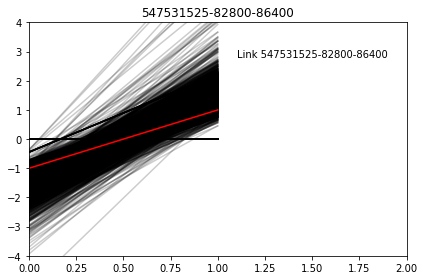

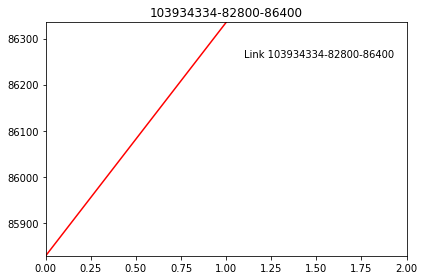

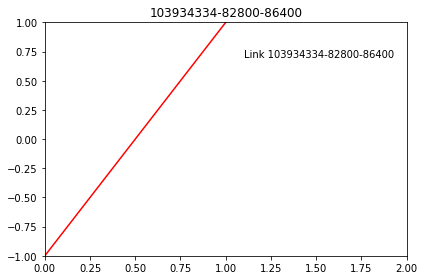

103934334-82800-86400
[547531528, 82800, 86400]: 0.08611061676281614
[547531527, 82800, 86400]: 0.7202503923110551
[8838071, 82800, 86400]: 0.31826750799829506
[159632717, 82800, 86400]: 3.9160930366493116
[152978752, 82800, 86400]: 0.5864960398549814
[159632718, 82800, 86400]: 1.093932639341606
[547531531, 82800, 86400]: 0.6081206329067907
[547531534, 82800, 86400]: 0.6064019852750021
[547531536, 82800, 86400]: 0.05453985387712371
[47876615, 82800, 86400]: 1.4142135623730951
[515675204, 82800, 86400]: 0.3250625082364746
[153947334, 82800, 86400]: 0.34352549782245256
[153947335, 82800, 86400]: 0.329211604553619
[297830232, 82800, 86400]: 0.33071453201343876
[547531526, 82800, 86400]: 0.6081206329067907
[547531532, 82800, 86400]: 0.6038641139404399
[251100155, 82800, 86400]: 1.4142135623730951
[299980276, 82800, 86400]: 0.0
[420135391, 82800, 86400]: 0.31801413244630783
[344864785, 82800, 86400]: 0.4438601748409336
[238610501, 82800, 86400]: 1.1503803297298754
[153021376, 82800, 86400]:

[245338048, 0, 3600]: 1.1343002251874752
[141129787, 0, 3600]: 0.0
[189677033, 0, 3600]: 1.354044627772836
[127127900, 0, 3600]: 0.64093592690507
[675092022, 0, 3600]: 0.32498662976292897
[153947339, 0, 3600]: 1.2468339856259918
[480282273, 0, 3600]: 0.0
[552008947, 0, 3600]: 1.4142135623730951
[46414958, 0, 3600]: 1.4142135623730951
[153019308, 0, 3600]: 1.3540446277728442
[152746501, 0, 3600]: 0.0
[676148903, 0, 3600]: 0.3359618243502448
[152665066, 0, 3600]: 0.8001582640848132
[440530034, 0, 3600]: 0.0
[152895057, 0, 3600]: 0.0
[423239433, 0, 3600]: 1.027630618811496
[157489812, 0, 3600]: 0.3680820977881003
[688769624, 0, 3600]: 0.9636607455612876
[299081203, 0, 3600]: 0.5369233632746313
[493523036, 0, 3600]: 0.6206195046038567
[299893495, 0, 3600]: 0.32894666633676256
[533580370, 0, 3600]: 0.0
[153022686, 0, 3600]: 1.3540446277728466
[152924144, 0, 3600]: 0.5006701678810506
[462409674, 0, 3600]: 1.0122469257273616
[153021406, 0, 3600]: 0.0
[533580371, 0, 3600]: 0.48132498129903617


[697192626, 0, 3600]: 0.5937367013573592
[159632857, 0, 3600]: 0.07559974030158563
[47876611, 10800, 14400]: 0.7831211308485945
[298337584, 10800, 14400]: 0.3182142180299844
[298616194, 10800, 14400]: 0.0
[344864781, 10800, 14400]: 0.5700829120477101
[104081803, 10800, 14400]: 0.6692657254480137
[768569228, 10800, 14400]: 0.983007615135022
[768569226, 10800, 14400]: 1.0311617850534425
[153056031, 10800, 14400]: 0.0
[440536718, 10800, 14400]: 0.3183468717212914
[298549717, 10800, 14400]: 0.3359618243502005
[440536723, 10800, 14400]: 0.0
[104081740, 10800, 14400]: 0.4145375886617385
[437982138, 10800, 14400]: 0.6166550368545513
[344864780, 10800, 14400]: 1.0280720238550722
[230916284, 10800, 14400]: 0.9521183983210556
[780970470, 10800, 14400]: 0.0
[344864779, 10800, 14400]: 0.7570684848003272
[298337583, 10800, 14400]: 0.5405021097160115
[309449105, 10800, 14400]: 0.9335943159302833
[286684914, 10800, 14400]: 0.0
[152895102, 10800, 14400]: 0.49507997562328526
[230916285, 10800, 14400]: 

[441250625, 61200, 64800]: 0.7950873267926057
[228275503, 61200, 64800]: 0.0
[152924174, 61200, 64800]: 0.0
[152924170, 61200, 64800]: 0.4015832301241258
[152679242, 61200, 64800]: 0.052379686842817026
[60712852, 61200, 64800]: 2.720186646913303
[152924168, 61200, 64800]: 0.41178131929123724
[298703035, 61200, 64800]: 0.9860006637479211
[298703036, 61200, 64800]: 0.4900019500836999
[253717640, 61200, 64800]: 1.2774308833038892
[385619159, 61200, 64800]: 1.2747452299429523
[519178542, 61200, 64800]: 0.6168679174956787
[152679386, 61200, 64800]: 0.12878686920165477
[298847948, 61200, 64800]: 0.0
[46262610, 61200, 64800]: 0.3416471616535186
[218911655, 61200, 64800]: 0.32078465448861704
[47876618, 61200, 64800]: 1.1451051487017123
[373003261, 61200, 64800]: 0.0
[152924175, 61200, 64800]: 0.06899383559525439
[298930276, 61200, 64800]: 0.0
[298865281, 61200, 64800]: 1.117493567926074
[228275501, 61200, 64800]: 0.0
[152924166, 61200, 64800]: 0.27286326690837287
[152679383, 61200, 64800]: 0.4

[152967214, 7200, 10800]: 0.0
[438177905, 7200, 10800]: 0.877529988024601
[141129781, 7200, 10800]: 0.0
[319899460, 7200, 10800]: 0.0
[780970461, 7200, 10800]: 0.0
[189677017, 7200, 10800]: 0.0
[463524777, 7200, 10800]: 1.0983588592229028
[221553419, 7200, 10800]: 0.8445487287586653
[711385800, 7200, 10800]: 1.0815547559129528
[299094973, 7200, 10800]: 0.9322871974551942
[189663745, 7200, 10800]: 1.4217192876833304
[420135404, 7200, 10800]: 0.0
[238618785, 7200, 10800]: 0.0
[410326582, 7200, 10800]: 0.42247595753901734
[157489809, 7200, 10800]: 0.0
[438177904, 7200, 10800]: 0.8304572565698382
[286685260, 7200, 10800]: 0.9053112757803686
[547531507, 7200, 10800]: 0.0
[238618783, 7200, 10800]: 0.0
[154535105, 7200, 10800]: 0.4483842599631416
[299094964, 7200, 10800]: 1.0502342375030649
[443397605, 7200, 10800]: 0.43427943852277706
[154150233, 7200, 10800]: 0.9053539990809222
[152665021, 7200, 10800]: 0.0
[440644907, 7200, 10800]: 0.7682959923337882
[463524775, 7200, 10800]: 0.92405691608

[46429881, 79200, 82800]: 0.45922769338462793
[423729714, 79200, 82800]: 0.0
[275345124, 79200, 82800]: 0.03982657596829563
[780549448, 79200, 82800]: 0.0
[153019299, 79200, 82800]: 0.9376038611692861
[152900389, 79200, 82800]: 0.7732826037572095
[188842245, 79200, 82800]: 1.2544748680577567
[418178082, 79200, 82800]: 1.5767780171336803
[152746382, 79200, 82800]: 1.164517502654353
[47876606, 79200, 82800]: 0.0
[8035444, 79200, 82800]: 1.1804059018536786
[515699253, 79200, 82800]: 3.0372931846351974
[228275471, 79200, 82800]: 1.1573542103736087
[410013917, 79200, 82800]: 0.4706444197597347
[299094939, 79200, 82800]: 0.4654849752165928
[189677011, 79200, 82800]: 0.9886491649308546
[160449032, 79200, 82800]: 0.8291400936497137
[191620663, 79200, 82800]: 0.26517737111048906
[22810756, 79200, 82800]: 1.171655207730721
[153053621, 79200, 82800]: 0.5112082150505852
[676950799, 79200, 82800]: 0.9470983252364922
[153019295, 79200, 82800]: 0.7321002181938339
[154534951, 79200, 82800]: 0.72655113

[152679378, 79200, 82800]: 0.0
[589546229, 79200, 82800]: 1.1227211325166748
[127127910, 79200, 82800]: 0.9670895471339871
[188842228, 79200, 82800]: 0.9771524295823991
[34700805, 79200, 82800]: 1.3164497196479104
[299024300, 79200, 82800]: 1.0739410642139608
[491822826, 79200, 82800]: 0.9498878849578138
[155685564, 79200, 82800]: 0.9635524777309759
[346316360, 79200, 82800]: 0.7279669100796626
[385334087, 79200, 82800]: 1.0691289824396117
[152976625, 79200, 82800]: 1.2527805090592343
[610976575, 79200, 82800]: 0.7911607692962144
[179351240, 79200, 82800]: 0.925953658045998
[104082933, 79200, 82800]: 0.42003781290503167
[298925930, 79200, 82800]: 0.9808774961501795
[152967210, 79200, 82800]: 0.9946087640648249
[234439480, 79200, 82800]: 0.6155765504461911
[463524794, 79200, 82800]: 0.9066829985792015
[152668413, 79200, 82800]: 0.03255360700605228
[152668418, 79200, 82800]: 0.5133101326828735
[8035462, 79200, 82800]: 0.6807700548538045
[8035572, 79200, 82800]: 1.1465003614268197
[298925

[161620504, 79200, 82800]: 1.6187903138814448
[346316342, 79200, 82800]: 0.8735756530564537
[251098648, 79200, 82800]: 0.9096637894573568
[420076114, 79200, 82800]: 1.3170131614073957
[153053556, 79200, 82800]: 1.0407225363070554
[152994917, 79200, 82800]: 0.6541523251189783
[298237446, 79200, 82800]: 1.5525738485842602
[153041326, 79200, 82800]: 1.1934718965105813
[487855862, 79200, 82800]: 0.6215422536207135
[480289607, 79200, 82800]: 0.7772269715634472
[104082935, 79200, 82800]: 0.44710058553363535
[275345099, 79200, 82800]: 0.45327051320314105
[153045273, 79200, 82800]: 1.1267080240092655
[160440239, 79200, 82800]: 1.1306770354959979
[298877132, 79200, 82800]: 0.8885710496161838
[154149751, 79200, 82800]: 1.008299664778967
[298925939, 79200, 82800]: 0.9909103907300442
[188842346, 79200, 82800]: 0.7303125797356285
[34700803, 79200, 82800]: 1.4457514722538514
[152679318, 79200, 82800]: 0.9022247387378812
[780483745, 79200, 82800]: 1.1972567249573896
[516508097, 79200, 82800]: 0.72722

[344864789, 79200, 82800]: 1.0214193579348216
[8578438, 79200, 82800]: 0.8098007960996113
[531743752, 79200, 82800]: 1.0838604195987624
[463524791, 79200, 82800]: 0.35817894756119106
[463524779, 79200, 82800]: 0.0
[153004057, 79200, 82800]: 0.07860012755511685
[152651319, 79200, 82800]: 0.40608986912362066
[153044329, 79200, 82800]: 0.7656116738726066
[189663722, 79200, 82800]: 0.7480232877612196
[153035194, 79200, 82800]: 0.18797355104234467
[152746373, 79200, 82800]: 1.1411484681981312
[81869221, 79200, 82800]: 1.0479106698924467
[153035189, 79200, 82800]: 0.44526656806849485
[238609963, 79200, 82800]: 0.0
[160440587, 79200, 82800]: 0.5002092922241234
[443405854, 79200, 82800]: 1.3724194674074592
[8035463, 79200, 82800]: 0.6847683063146501
[152978744, 79200, 82800]: 0.6669127755208453
[346316359, 79200, 82800]: 0.7193338085278324
[8035483, 79200, 82800]: 0.819332653823763
[589546200, 79200, 82800]: 2.3993930232995027
[188842340, 79200, 82800]: 0.6029093994857271
[385331944, 79200, 82

[154539329, 79200, 82800]: 0.0
[442373715, 79200, 82800]: 2.0299809637047908
[153053712, 79200, 82800]: 0.3339138907286431
[153053571, 79200, 82800]: 0.919406687120377
[298616193, 79200, 82800]: 1.1712472653025554
[22810763, 79200, 82800]: 1.0472641771144342
[344851287, 79200, 82800]: 0.8756882097731397
[374833924, 79200, 82800]: 1.1491341661389378
[675344453, 79200, 82800]: 0.6396283921038096
[589546207, 79200, 82800]: 1.5028518567811442
[191003458, 79200, 82800]: 0.3987264026284568
[152746374, 79200, 82800]: 1.1385910286047876
[344851291, 79200, 82800]: 0.9914759653674958
[217603100, 79200, 82800]: 0.9963021280537935
[152656951, 79200, 82800]: 1.1991274177590099
[440521429, 79200, 82800]: 1.1161155159900393
[160455780, 79200, 82800]: 0.6929799675796898
[480289567, 79200, 82800]: 1.201689203379752
[480289572, 79200, 82800]: 0.7990043674541624
[153030231, 79200, 82800]: 0.6267789201020517
[298786469, 79200, 82800]: 1.1102969146039248
[160469985, 79200, 82800]: 1.1680188321123122
[30172

[463337409, 79200, 82800]: 0.961959328609763
[153030224, 79200, 82800]: 0.7245181265752502
[160440588, 79200, 82800]: 0.4589166266909829
[188842226, 79200, 82800]: 0.8391853472847093
[154537285, 79200, 82800]: 1.0037396345365546
[420076289, 79200, 82800]: 0.1554139357292514
[189452924, 79200, 82800]: 1.0708808417922449
[153044305, 79200, 82800]: 0.6120231995578801
[152967875, 79200, 82800]: 0.9385507658344153
[298237454, 79200, 82800]: 1.0588737859819553
[153030227, 79200, 82800]: 0.0
[502511308, 79200, 82800]: 0.8695241670423447
[195407914, 79200, 82800]: 1.224950469111166
[344851288, 79200, 82800]: 0.9455592548754069
[152967871, 79200, 82800]: 0.9886429621122116
[160469994, 79200, 82800]: 0.0
[440521434, 79200, 82800]: 0.5321732765094944
[160443455, 79200, 82800]: 0.9746546565834193
[463337423, 79200, 82800]: 0.9432267394490792
[516841622, 79200, 82800]: 1.686933311801663
[487855865, 79200, 82800]: 0.5470289485825857
[234352587, 79200, 82800]: 1.3629238646857245
[160469978, 79200, 82

[298616204, 79200, 82800]: 1.05094753198059
[195407917, 79200, 82800]: 1.002711402354649
[676436352, 79200, 82800]: 1.8067530761495108
[153044320, 79200, 82800]: 1.346595123210881
[152668410, 79200, 82800]: 0.7534086058565147
[248762947, 79200, 82800]: 1.1696951348796725
[424918872, 79200, 82800]: 1.0238085888326498
[153049912, 79200, 82800]: 1.1063278786872328
[245334387, 79200, 82800]: 0.48399991396662695
[159740374, 79200, 82800]: 0.9699451623651102
[153004035, 79200, 82800]: 0.11390459270440602
[152656858, 79200, 82800]: 0.5056077206358673
[152977274, 79200, 82800]: 0.4086536565262278
[22810753, 79200, 82800]: 1.2789015005054953
[298786497, 79200, 82800]: 0.9066354225758155
[152679406, 79200, 82800]: 0.6903242835769242
[152746364, 79200, 82800]: 0.9926772852169305
[344851266, 79200, 82800]: 0.8008768384553416
[487825344, 79200, 82800]: 1.0378168990452088
[325598336, 79200, 82800]: 0.3584198032904632
[385334090, 79200, 82800]: 0.971087609958521
[153006804, 79200, 82800]: 0.125979163

[153798135, 79200, 82800]: 1.019740030954619
[46932873, 79200, 82800]: 0.45702996282287467
[152679404, 79200, 82800]: 1.3577550730683003
[697192637, 79200, 82800]: 0.7636392070126853
[442373719, 79200, 82800]: 0.5975039601936771
[259109266, 79200, 82800]: 0.4531907382012779
[301677375, 79200, 82800]: 0.9243857346595689
[502511302, 79200, 82800]: 1.2454094748224709
[320064976, 79200, 82800]: 0.0
[153053639, 79200, 82800]: 0.8706453241203929
[298703051, 79200, 82800]: 1.2801381727457417
[410013916, 79200, 82800]: 0.6702250330935957
[152651323, 79200, 82800]: 1.431064530210034
[46262606, 79200, 82800]: 0.6421176521660836
[188842343, 79200, 82800]: 0.7459078507022026
[152746365, 79200, 82800]: 1.11490659860775
[275345120, 79200, 82800]: 1.2147356013092276
[158618966, 79200, 82800]: 0.9370207817881253
[159740412, 79200, 82800]: 0.7006863244729283
[423239447, 79200, 82800]: 0.3477519799094879
[228275485, 79200, 82800]: 0.4232687278182679
[299081223, 79200, 82800]: 0.0
[297883451, 79200, 8280

[154149754, 79200, 82800]: 0.5685298169490559
[191003448, 79200, 82800]: 1.2325486129347474
[301724764, 79200, 82800]: 1.1544526752864583
[409377703, 79200, 82800]: 0.8567742265551628
[251101617, 79200, 82800]: 1.2421811641519542
[8578425, 79200, 82800]: 0.0
[252392953, 79200, 82800]: 1.2439949877461656
[153035167, 79200, 82800]: 1.0337037785730228
[8035460, 79200, 82800]: 0.659902756138811
[676436349, 79200, 82800]: 0.9159202821147143
[480289638, 79200, 82800]: 0.8345933353998399
[153004065, 79200, 82800]: 0.4831008590292095
[424918873, 79200, 82800]: 0.98211791391186
[46262605, 79200, 82800]: 0.6496374614926175
[245334386, 79200, 82800]: 0.43343989031089547
[153041716, 79200, 82800]: 0.8771256304892732
[243630882, 79200, 82800]: 1.1704429821811955
[34700786, 79200, 82800]: 0.34115887148844287
[22810758, 79200, 82800]: 1.288908918809409
[298822841, 79200, 82800]: 1.2053547210038316
[301677367, 79200, 82800]: 1.0469690601470478
[516841617, 79200, 82800]: 0.9764288260432704
[34700798, 7

[441265814, 79200, 82800]: 0.7113013450728578
[22810757, 79200, 82800]: 1.2163951117303307
[275345118, 79200, 82800]: 0.6389991767665034
[152967748, 79200, 82800]: 0.0
[153798141, 79200, 82800]: 0.9171536647075968
[5069462, 79200, 82800]: 1.3772886376926152
[480289616, 79200, 82800]: 1.25747439322621
[480289601, 79200, 82800]: 0.38380482266482996
[161620475, 79200, 82800]: 1.0676502092375495
[298703045, 79200, 82800]: 1.0058061032566137
[298703029, 79200, 82800]: 1.1199622756429817
[385331948, 79200, 82800]: 1.0924405722074793
[153019283, 79200, 82800]: 0.8146907180507695
[153035284, 79200, 82800]: 0.0
[153049969, 79200, 82800]: 1.0060537532406817
[152746454, 79200, 82800]: 1.5126538902730917
[298699133, 79200, 82800]: 1.012187359641076
[423724825, 79200, 82800]: 1.1304349638351645
[344851274, 79200, 82800]: 0.7660905001416206
[189452921, 79200, 82800]: 0.994856144535405
[253717644, 79200, 82800]: 0.7530020412218884
[286685249, 79200, 82800]: 1.1098656919617584
[153053638, 79200, 82800

[259109260, 79200, 82800]: 0.05151722567220988
[610571166, 79200, 82800]: 0.6482165492533399
[161620483, 79200, 82800]: 2.189790267876252
[245333280, 79200, 82800]: 1.564301952909918
[252835230, 79200, 82800]: 1.1704697927211554
[459670501, 79200, 82800]: 0.9890371079481928
[154151046, 79200, 82800]: 0.9799790768142057
[159740334, 79200, 82800]: 1.3372323316107348
[157489526, 79200, 82800]: 1.3364981404035503
[153049963, 79200, 82800]: 1.1157124274596744
[152967675, 79200, 82800]: 0.345939423509026
[152746368, 79200, 82800]: 1.0566734176248556
[152994902, 79200, 82800]: 0.9447473662943776
[525675119, 79200, 82800]: 0.7102387203481242
[298616191, 79200, 82800]: 1.1782602939628688
[385334116, 79200, 82800]: 0.0
[299094980, 79200, 82800]: 0.7368153645130106
[441462660, 79200, 82800]: 0.9624579934374597
[152656942, 79200, 82800]: 0.948054218197126
[152967195, 79200, 82800]: 0.38454862261748296
[153049967, 79200, 82800]: 1.1187307934977972
[298925977, 79200, 82800]: 0.9443979040191499
[1526

[195407907, 79200, 82800]: 0.9176269790905459
[298944610, 79200, 82800]: 0.8885647047393818
[188842254, 79200, 82800]: 1.060547269361456
[440522451, 79200, 82800]: 1.6170559989936555
[153000843, 79200, 82800]: 0.44802227446807047
[152895047, 79200, 82800]: 0.9972280866891463
[5069458, 79200, 82800]: 1.0028316706277531
[245330477, 79200, 82800]: 1.2842756303791985
[531293333, 79200, 82800]: 0.8458586262008255
[505168800, 79200, 82800]: 0.8976353256259708
[676152422, 79200, 82800]: 0.06629001292446297
[423724818, 79200, 82800]: 1.1608754354155923
[676148902, 79200, 82800]: 1.0351483042025604
[423724817, 79200, 82800]: 1.135204788021615
[441462657, 79200, 82800]: 1.4104086275590804
[779578742, 79200, 82800]: 0.6130471325031851
[344851277, 79200, 82800]: 0.7430934789398098
[8578433, 79200, 82800]: 0.5131999466497075
[152924908, 79200, 82800]: 1.1080873546262553
[441250594, 79200, 82800]: 0.48461031500032764
[298925925, 79200, 82800]: 0.5567545681198836
[686244249, 79200, 82800]: 0.0
[42007

[344864803, 79200, 82800]: 0.0
[299094965, 79200, 82800]: 0.6386382293538848
[179351238, 79200, 82800]: 1.4230012334233293
[298616207, 79200, 82800]: 1.0619669151714528
[441341845, 79200, 82800]: 0.9851557728928532
[438172976, 79200, 82800]: 1.0416065321161119
[298559016, 79200, 82800]: 0.7988817567592374
[299081208, 79200, 82800]: 0.06628102362442684
[153035278, 79200, 82800]: 0.0
[188842220, 79200, 82800]: 0.9614179082808797
[154150685, 79200, 82800]: 0.0
[781830256, 79200, 82800]: 0.760277915573368
[8035568, 79200, 82800]: 0.8019535388340908
[152679286, 79200, 82800]: 0.024169217796447248
[153000939, 79200, 82800]: 0.9997101439338015
[301677365, 79200, 82800]: 1.0514686808753018
[153019302, 79200, 82800]: 1.643683825852608
[297829488, 79200, 82800]: 1.263382374672406
[299024304, 79200, 82800]: 1.0812312896933054
[252392950, 79200, 82800]: 1.5035874662718949
[34700804, 79200, 82800]: 1.5889410756957174
[252835213, 79200, 82800]: 0.9307278559602166
[159740377, 79200, 82800]: 0.2193627

[152980865, 46800, 50400]: 1.3748509887808689
[780989737, 46800, 50400]: 0.0
[153035200, 46800, 50400]: 0.0
[649730256, 46800, 50400]: 0.033548325549866136
[152977281, 46800, 50400]: 0.0
[438172979, 46800, 50400]: 0.0
[8578412, 46800, 50400]: 0.5344261490139621
[298877124, 46800, 50400]: 0.08555871872421264
[160448521, 46800, 50400]: 0.9787286496990196
[152980828, 46800, 50400]: 1.1892496316949435
[160448101, 46800, 50400]: 0.5851556453662161
[493523043, 46800, 50400]: 0.0
[385334112, 46800, 50400]: 0.0
[546853688, 46800, 50400]: 0.48940652924127814
[152967816, 46800, 50400]: 0.556217897143116
[152977276, 46800, 50400]: 0.0
[152967256, 46800, 50400]: 0.7602294128960629
[259111295, 46800, 50400]: 0.9173538632728384
[152679411, 46800, 50400]: 0.16223211353843492
[676950804, 46800, 50400]: 0.5313988669976388
[8578407, 46800, 50400]: 0.4562814002822999
[676950805, 46800, 50400]: 0.10429964235749824
[153022675, 46800, 50400]: 0.14613919356553057
[441304010, 46800, 50400]: 0.3198536912585483

[298424778, 32400, 36000]: 0.0
[160451459, 32400, 36000]: 0.0
[160451456, 32400, 36000]: 0.0
[775436067, 32400, 36000]: 0.39872489300598357
[152656963, 32400, 36000]: 0.0
[152967900, 32400, 36000]: 0.39091367748354394
[153050106, 32400, 36000]: 0.4132785440740045
[152967899, 32400, 36000]: 0.4589773322411382
[153050021, 32400, 36000]: 0.0
[153050023, 32400, 36000]: 0.0
[161620468, 21600, 25200]: 0.0
[397153550, 21600, 25200]: 1.1469860715482028
[8089855, 21600, 25200]: 0.5192525501432688
[491822829, 21600, 25200]: 0.0
[491822830, 21600, 25200]: 0.9951679293784856
[152978660, 21600, 25200]: 0.7175122144599896
[8089857, 21600, 25200]: 0.5771397569107821
[160440585, 21600, 25200]: 0.3210883151565891
[8089853, 21600, 25200]: 1.4142135623730951
[8089854, 21600, 25200]: 0.4831530337279326
[8089858, 21600, 25200]: 0.5763868585419922
[160440584, 21600, 25200]: 1.1480900052939966
[397153552, 21600, 25200]: 1.1153591323664231
[8089856, 21600, 25200]: 0.0
[397153551, 21600, 25200]: 1.234790724861

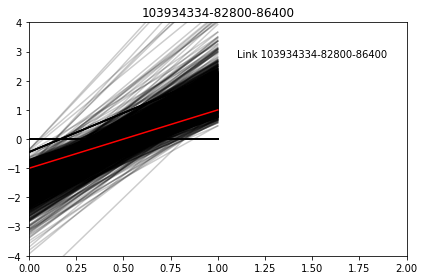

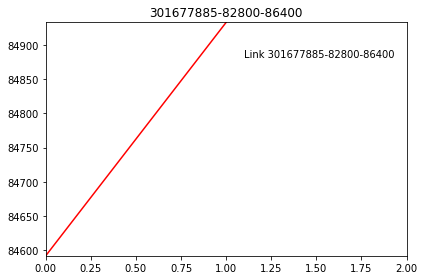

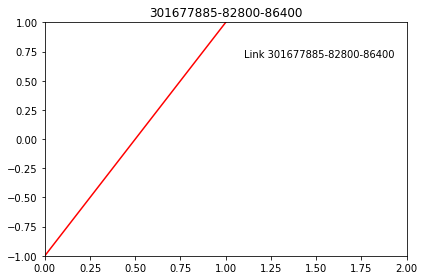

301677885-82800-86400
[547531528, 82800, 86400]: 0.08611061676281614
[547531527, 82800, 86400]: 0.7202503923110551
[8838071, 82800, 86400]: 0.31826750799829506
[159632717, 82800, 86400]: 3.9160930366493116
[152978752, 82800, 86400]: 0.5864960398549814
[159632718, 82800, 86400]: 1.093932639341606
[547531531, 82800, 86400]: 0.6081206329067907
[547531534, 82800, 86400]: 0.6064019852750021
[547531536, 82800, 86400]: 0.05453985387712371
[47876615, 82800, 86400]: 1.4142135623730951
[515675204, 82800, 86400]: 0.3250625082364746
[153947334, 82800, 86400]: 0.34352549782245256
[153947335, 82800, 86400]: 0.329211604553619
[297830232, 82800, 86400]: 0.33071453201343876
[547531526, 82800, 86400]: 0.6081206329067907
[547531532, 82800, 86400]: 0.6038641139404399
[251100155, 82800, 86400]: 1.4142135623730951
[299980276, 82800, 86400]: 0.0
[420135391, 82800, 86400]: 0.31801413244630783
[344864785, 82800, 86400]: 0.4438601748409336
[238610501, 82800, 86400]: 1.1503803297298754
[153021376, 82800, 86400]:

[245338049, 0, 3600]: 1.0985352521948955
[152679356, 0, 3600]: 1.0522579853739333
[152665019, 0, 3600]: 0.0
[441304002, 0, 3600]: 0.0
[153021396, 0, 3600]: 1.3540446277728457
[440530039, 0, 3600]: 0.0
[385796152, 0, 3600]: 0.4766731582100597
[423239434, 0, 3600]: 0.3526024765895228
[189424090, 0, 3600]: 0.0
[141129791, 0, 3600]: 0.8908379745046549
[320136019, 0, 3600]: 0.0
[245338046, 0, 3600]: 1.065716137978781
[152980847, 0, 3600]: 1.2799130173550692
[157489833, 0, 3600]: 0.5809829548073041
[385793296, 0, 3600]: 0.0
[153947086, 0, 3600]: 1.1800966569326914
[299893493, 0, 3600]: 0.7461750546953236
[245337804, 0, 3600]: 1.0800839018770276
[104082861, 0, 3600]: 1.5272321648264395
[153035333, 0, 3600]: 0.0
[189424092, 0, 3600]: 0.0
[46262614, 0, 3600]: 0.6949629723374522
[152924143, 0, 3600]: 0.49714772424988346
[152924212, 0, 3600]: 0.0
[441497925, 0, 3600]: 0.39166270322418173
[423724840, 0, 3600]: 0.5841883550704841
[234345997, 0, 3600]: 0.0
[152679296, 0, 3600]: 0.5251292826590639
[1

[47876620, 0, 3600]: 0.6716256218201005
[440530047, 0, 3600]: 0.0
[299893497, 0, 3600]: 0.7234345771216337
[104082896, 0, 3600]: 0.0
[153030235, 0, 3600]: 0.0
[152679415, 0, 3600]: 0.5611292553095459
[234352584, 0, 3600]: 0.8281747874653436
[420095471, 0, 3600]: 0.37464081962673673
[441497929, 0, 3600]: 0.35655899481074554
[161620463, 0, 3600]: 1.4142135623730951
[152651317, 0, 3600]: 1.0754340395587372
[462409681, 0, 3600]: 0.0
[440521426, 0, 3600]: 1.2283638413240185
[189677014, 0, 3600]: 0.9957449833720524
[681329977, 0, 3600]: 0.9166317411199508
[5135004, 0, 3600]: 1.4142135623730951
[547531509, 0, 3600]: 0.7746143488292532
[547531513, 0, 3600]: 0.8887996405939397
[153050027, 0, 3600]: 0.3680820977881003
[154150690, 0, 3600]: 0.0
[697192626, 0, 3600]: 0.5937367013573592
[159632857, 0, 3600]: 0.07559974030158563
[47876611, 10800, 14400]: 0.7831211308485945
[298337584, 10800, 14400]: 0.3182142180299844
[298616194, 10800, 14400]: 0.0
[344864781, 10800, 14400]: 0.5700829120477101
[1040

[775436045, 25200, 28800]: 0.645769654712204
[153044333, 25200, 28800]: 0.0
[515675217, 25200, 28800]: 0.9806048385073223
[252392926, 25200, 28800]: 0.0
[298549740, 25200, 28800]: 0.552074108018114
[160455787, 25200, 28800]: 0.0
[189677024, 25200, 28800]: 0.0
[297817955, 25200, 28800]: 1.029836004593472
[153050012, 25200, 28800]: 0.7727265456885487
[286685265, 25200, 28800]: 0.3064326534561612
[5135013, 25200, 28800]: 0.35807172446011853
[252392927, 25200, 28800]: 0.0
[153050007, 25200, 28800]: 0.49770633503144507
[252392819, 25200, 28800]: 0.5021602938859399
[153022817, 25200, 28800]: 0.3300246543003367
[104081776, 25200, 28800]: 0.4962530986883383
[46262595, 25200, 28800]: 1.1998934486910569
[298331519, 25200, 28800]: 0.3192620062702591
[515675216, 25200, 28800]: 0.9730748520433369
[159632886, 25200, 28800]: 0.490677329818476
[438177903, 25200, 28800]: 1.0891903150940876
[252392919, 25200, 28800]: 0.0
[610942262, 25200, 28800]: 0.0
[46430973, 25200, 28800]: 0.0
[152665032, 25200, 288

[189663724, 75600, 79200]: 0.8891253933633696
[153053630, 75600, 79200]: 1.2698487529870905
[252392916, 75600, 79200]: 0.41833422765731143
[221553433, 75600, 79200]: 0.7941501326423163
[589546192, 75600, 79200]: 0.3776913507499538
[46414951, 75600, 79200]: 0.0
[298925983, 75600, 79200]: 0.4263399353030926
[610949942, 75600, 79200]: 0.0
[589546194, 75600, 79200]: 0.3701558372347665
[189677031, 75600, 79200]: 0.016347635200327018
[589546193, 75600, 79200]: 0.40001289558811165
[221553441, 75600, 79200]: 0.7409661526601076
[589546196, 75600, 79200]: 0.3606451214885066
[153053631, 75600, 79200]: 1.1098840919214483
[228275462, 75600, 79200]: 1.4142135623730951
[153053632, 75600, 79200]: 0.9983320050577525
[189663726, 75600, 79200]: 1.0072142755336098
[221553439, 75600, 79200]: 0.0
[589546198, 75600, 79200]: 0.35413204939668935
[189663725, 75600, 79200]: 1.0625691901415093
[589546197, 75600, 79200]: 0.35162673947702416
[221553435, 75600, 79200]: 0.6459228225473043
[319927894, 75600, 79200]: 5

[152900381, 7200, 10800]: 0.3223002577056486
[298623932, 7200, 10800]: 0.0
[160451380, 7200, 10800]: 1.07842787699524
[152978770, 7200, 10800]: 0.810680295922434
[154535107, 7200, 10800]: 0.4270259535430264
[189663749, 7200, 10800]: 1.3924396586575165
[423239440, 7200, 10800]: 0.9440715064830705
[493523038, 7200, 10800]: 0.0
[22810919, 7200, 10800]: 0.7195639340263448
[160451382, 7200, 10800]: 1.1120786350335163
[160470000, 7200, 10800]: 1.4142135623730951
[160451381, 7200, 10800]: 1.104308106722109
[298692636, 7200, 10800]: 1.2196198200599928
[697192618, 7200, 10800]: 0.5073059361772881
[22810920, 7200, 10800]: 0.8792565390812402
[152995676, 7200, 10800]: 0.0
[152967200, 7200, 10800]: 0.560876630667466
[675346501, 7200, 10800]: 0.0
[153022799, 7200, 10800]: 0.0
[440536714, 7200, 10800]: 0.8013905053274111
[153055965, 7200, 10800]: 1.4142135623730951
[423729098, 7200, 10800]: 0.45236767569278047
[697819357, 7200, 10800]: 0.8676024261521529
[238618786, 7200, 10800]: 0.0
[610577099, 7200

[152665064, 79200, 82800]: 1.538391022297662
[443405859, 79200, 82800]: 0.8920494900092151
[160458423, 79200, 82800]: 0.14179680732151465
[153004045, 79200, 82800]: 0.15271996969928808
[438172975, 79200, 82800]: 1.9617466146988933
[188842287, 79200, 82800]: 1.7889672157049374
[161620493, 79200, 82800]: 1.0224014858421235
[298877854, 79200, 82800]: 1.003573290484925
[502511312, 79200, 82800]: 1.2504339942269365
[152900393, 79200, 82800]: 1.2773879335520948
[385334089, 79200, 82800]: 0.9118481793080236
[8035466, 79200, 82800]: 0.8767017855745388
[153049908, 79200, 82800]: 0.7416667387506265
[418178080, 79200, 82800]: 0.766110128209376
[153019287, 79200, 82800]: 0.8570729756533276
[298822842, 79200, 82800]: 0.8310143496544792
[298217939, 79200, 82800]: 1.0801132155436577
[286684919, 79200, 82800]: 0.9135300333745904
[442373732, 79200, 82800]: 1.1206178647249603
[191003417, 79200, 82800]: 0.9981834810362092
[8035474, 79200, 82800]: 1.6569844201320936
[34700811, 79200, 82800]: 1.00832042036

[298932006, 79200, 82800]: 1.0249668307761322
[161620498, 79200, 82800]: 1.018543297852586
[441265799, 79200, 82800]: 0.8140511395125031
[160449037, 79200, 82800]: 0.513465449690342
[780483743, 79200, 82800]: 0.8829037809170825
[487855864, 79200, 82800]: 0.6777344948034174
[161620478, 79200, 82800]: 2.1264494816229584
[781830254, 79200, 82800]: 0.9729962815440767
[152679405, 79200, 82800]: 1.1769453249216801
[153043599, 79200, 82800]: 0.8568028634704064
[298703032, 79200, 82800]: 1.127478658009285
[160462990, 79200, 82800]: 0.7898629681194488
[159740338, 79200, 82800]: 1.085623510063874
[678035897, 79200, 82800]: 0.7293085265950224
[298234501, 79200, 82800]: 0.9099169793006988
[320136000, 79200, 82800]: 0.34100934753106416
[22810759, 79200, 82800]: 1.1815344527777731
[298822858, 79200, 82800]: 0.6968908308963289
[153019292, 79200, 82800]: 0.8947621537358679
[463524793, 79200, 82800]: 0.86170931386933
[160458424, 79200, 82800]: 0.5178039312602558
[153798137, 79200, 82800]: 0.92521814506

[153004058, 79200, 82800]: 0.5735088907467681
[160440590, 79200, 82800]: 0.39006904301381823
[8578345, 79200, 82800]: 0.3947981390855349
[188842306, 79200, 82800]: 0.8182952134040867
[439048431, 79200, 82800]: 1.0096008448183968
[153021399, 79200, 82800]: 0.0
[152668398, 79200, 82800]: 0.7346643807941293
[152967750, 79200, 82800]: 0.07049465736752934
[161620517, 79200, 82800]: 0.8909306406261837
[441250600, 79200, 82800]: 0.7810276729462878
[152654143, 79200, 82800]: 1.0623364212444573
[8035575, 79200, 82800]: 1.2174885884004323
[665834900, 79200, 82800]: 1.0609248575845494
[160444347, 79200, 82800]: 1.1505863000417789
[385334130, 79200, 82800]: 0.0
[697192642, 79200, 82800]: 0.7656047840094969
[385334091, 79200, 82800]: 1.0346218347939307
[245333277, 79200, 82800]: 1.1364673033972619
[504476755, 79200, 82800]: 1.4138929371852236
[153000829, 79200, 82800]: 1.08093364212452
[502511295, 79200, 82800]: 1.1092443359448012
[228275479, 79200, 82800]: 1.253119306638216
[286685248, 79200, 8280

[298786467, 79200, 82800]: 1.1014105636361124
[780964778, 79200, 82800]: 1.328464466416448
[152978775, 79200, 82800]: 0.6709105187232312
[60712868, 79200, 82800]: 1.3454783423647267
[297993205, 79200, 82800]: 0.8704278665312906
[152679189, 79200, 82800]: 1.011301612957966
[441250609, 79200, 82800]: 1.1257479498448697
[441455563, 79200, 82800]: 1.2543100967628127
[189452930, 79200, 82800]: 1.1287310706962057
[298925981, 79200, 82800]: 0.7082368981117285
[245336351, 79200, 82800]: 0.9278903462080573
[245333411, 79200, 82800]: 1.1213321186450413
[161620514, 79200, 82800]: 1.4998830946835169
[299094971, 79200, 82800]: 1.033633725084645
[217603102, 79200, 82800]: 1.5454481660818182
[189677006, 79200, 82800]: 1.0643738130151734
[516841623, 79200, 82800]: 1.1900334910563075
[245336352, 79200, 82800]: 0.7783888332950103
[780483747, 79200, 82800]: 1.1576346884808744
[152976627, 79200, 82800]: 1.0481077069791465
[153035179, 79200, 82800]: 0.9919432938735411
[153947390, 79200, 82800]: 1.003274522

[159740414, 79200, 82800]: 0.592757839164881
[697192669, 79200, 82800]: 0.6729687192124111
[8035563, 79200, 82800]: 0.9198888163312163
[91978079, 79200, 82800]: 1.6640609805646656
[780483749, 79200, 82800]: 1.1029830106275624
[153019279, 79200, 82800]: 1.2098327396899364
[47876603, 79200, 82800]: 0.527545756590559
[441265812, 79200, 82800]: 1.189546170851163
[153035282, 79200, 82800]: 0.0
[505168801, 79200, 82800]: 0.5865999811481989
[152679308, 79200, 82800]: 1.1496493097752745
[610571170, 79200, 82800]: 0.8975138789646205
[34700797, 79200, 82800]: 0.9720800891264185
[418178088, 79200, 82800]: 0.8955028443684253
[152679283, 79200, 82800]: 0.34448406552054023
[189424082, 79200, 82800]: 0.9741411232242818
[220393428, 79200, 82800]: 1.1306523929843548
[572708714, 79200, 82800]: 1.696241108469641
[46430970, 79200, 82800]: 0.9253986276926304
[153945671, 79200, 82800]: 0.9419669145063445
[152665037, 79200, 82800]: 0.8521631606350698
[189452945, 79200, 82800]: 1.1132718395963561
[152654158, 

[154534964, 79200, 82800]: 0.9524168290928721
[22810761, 79200, 82800]: 0.9284997652792494
[346316351, 79200, 82800]: 1.2131522023874834
[420135394, 79200, 82800]: 0.7563025140531348
[160443453, 79200, 82800]: 1.0615606361032346
[344851278, 79200, 82800]: 0.7425135931460953
[195407919, 79200, 82800]: 0.9750528549037769
[153022665, 79200, 82800]: 1.1788575706410438
[153035304, 79200, 82800]: 0.9020784147737676
[189676996, 79200, 82800]: 1.0848630649661597
[516841613, 79200, 82800]: 1.0256953225282701
[153035152, 79200, 82800]: 1.104498409516383
[152978733, 79200, 82800]: 1.584087801157341
[8838082, 79200, 82800]: 2.129277993101159
[8035581, 79200, 82800]: 1.0762755880459887
[188842232, 79200, 82800]: 1.104638793617572
[697192670, 79200, 82800]: 0.5263077275913653
[502511274, 79200, 82800]: 0.0
[153045282, 79200, 82800]: 0.529762427886719
[502501398, 79200, 82800]: 0.972099606889695
[152679204, 79200, 82800]: 0.18742205492516353
[480289642, 79200, 82800]: 0.7741054780786062
[531317457, 7

[252835209, 79200, 82800]: 0.892991330921156
[152679409, 79200, 82800]: 0.5009403652892117
[252392945, 79200, 82800]: 0.6349613184629199
[179351241, 79200, 82800]: 0.6243889383500448
[221553411, 79200, 82800]: 0.8870105566454057
[385331946, 79200, 82800]: 1.1166286718314409
[22810748, 79200, 82800]: 0.8412437448501842
[678316015, 79200, 82800]: 0.9969564689801522
[5069465, 79200, 82800]: 1.034010209735061
[344864790, 79200, 82800]: 1.0492767935950633
[153030232, 79200, 82800]: 0.0
[314499047, 79200, 82800]: 0.7366288969610976
[525675120, 79200, 82800]: 0.6114870852144226
[153019286, 79200, 82800]: 0.711653254935159
[297996747, 79200, 82800]: 0.7428455796718616
[297883447, 79200, 82800]: 0.764017061580265
[487825350, 79200, 82800]: 0.9961531329802177
[275345096, 79200, 82800]: 0.4648487440137427
[346316358, 79200, 82800]: 0.8000982596120733
[189677008, 79200, 82800]: 1.0144391100211565
[344851272, 79200, 82800]: 0.8967852104518267
[234352598, 79200, 82800]: 0.0
[441462661, 79200, 82800]

[314499044, 79200, 82800]: 0.9308862952780962
[252392946, 79200, 82800]: 0.5839609934778226
[251098777, 79200, 82800]: 0.5916940905348089
[160455783, 79200, 82800]: 1.119987448082178
[153945672, 79200, 82800]: 0.9367861087361464
[153000828, 79200, 82800]: 1.1178505932279466
[442373705, 79200, 82800]: 0.0
[152656913, 79200, 82800]: 0.9821984768244454
[516841616, 79200, 82800]: 1.0792757090804634
[189676994, 79200, 82800]: 1.1399238361441486
[327005894, 79200, 82800]: 1.1085053024341984
[610571158, 79200, 82800]: 0.9810373705975141
[60712874, 79200, 82800]: 2.501224075758065
[153043549, 79200, 82800]: 0.2804294812509339
[423719034, 79200, 82800]: 1.2172156514360464
[610571161, 79200, 82800]: 0.952112713765408
[438177910, 79200, 82800]: 0.1610225398131929
[298786037, 79200, 82800]: 0.9317660882383484
[152924945, 79200, 82800]: 0.6324804262975574
[440522452, 79200, 82800]: 1.0893680537013055
[297881922, 79200, 82800]: 0.0
[153050030, 79200, 82800]: 1.1095217271157938
[572708711, 79200, 828

[385334123, 79200, 82800]: 0.0
[346316345, 79200, 82800]: 0.9405509798030561
[152977271, 79200, 82800]: 0.0
[34700790, 79200, 82800]: 0.7774549544470742
[141129798, 79200, 82800]: 0.37527811285640883
[8035480, 79200, 82800]: 0.9441115823953941
[319927912, 79200, 82800]: 0.0
[779578746, 79200, 82800]: 0.7152076641685243
[441497927, 79200, 82800]: 0.6385443538398348
[8035530, 79200, 82800]: 1.159318047367307
[46414937, 79200, 82800]: 0.5565215230993918
[374771720, 79200, 82800]: 0.0
[228275476, 79200, 82800]: 1.2221930903029512
[780964775, 79200, 82800]: 1.0764080161580996
[160455776, 79200, 82800]: 0.9838799423787374
[189452934, 79200, 82800]: 0.4056311694414437
[154149754, 79200, 82800]: 0.5685298169490559
[191003448, 79200, 82800]: 1.2325486129347474
[301724764, 79200, 82800]: 1.1544526752864583
[409377703, 79200, 82800]: 0.8567742265551628
[251101617, 79200, 82800]: 1.2421811641519542
[8578425, 79200, 82800]: 0.0
[252392953, 79200, 82800]: 1.2439949877461656
[153035167, 79200, 82800]

[154534958, 79200, 82800]: 0.9222256485419352
[441455575, 79200, 82800]: 1.1029603279472413
[439048429, 79200, 82800]: 1.4324373210424581
[153035176, 79200, 82800]: 1.0585083739339645
[423724834, 79200, 82800]: 1.1914113189466944
[152668414, 79200, 82800]: 0.020439278431291643
[188842256, 79200, 82800]: 0.8641213175907625
[441455556, 79200, 82800]: 1.1609128479761668
[152976631, 79200, 82800]: 1.0314705070865038
[344864801, 79200, 82800]: 0.0
[188842267, 79200, 82800]: 1.129354818255732
[152665060, 79200, 82800]: 1.3128296869617915
[299081207, 79200, 82800]: 0.37976133155907543
[423724823, 79200, 82800]: 1.135617472545156
[153055991, 79200, 82800]: 1.119454466238473
[298925940, 79200, 82800]: 0.9964699517939064
[442373712, 79200, 82800]: 0.9697075297415492
[160469993, 79200, 82800]: 0.0
[152746443, 79200, 82800]: 1.2577378856420667
[152978778, 79200, 82800]: 1.0818894481617782
[438172971, 79200, 82800]: 1.0187874204825107
[153043601, 79200, 82800]: 1.052707055602949
[104082941, 79200, 

[153053562, 79200, 82800]: 1.1561786890701566
[674556442, 79200, 82800]: 0.8913128482702782
[8035518, 79200, 82800]: 1.0044057034069396
[188842270, 79200, 82800]: 0.9724633446811518
[245333279, 79200, 82800]: 1.065419545046783
[245334300, 79200, 82800]: 0.49951566308658973
[157489528, 79200, 82800]: 0.9463553440490798
[157489532, 79200, 82800]: 1.3347476168662902
[325598331, 79200, 82800]: 0.7025161384773285
[152967189, 79200, 82800]: 0.44308225042567373
[344851289, 79200, 82800]: 1.093035675574264
[153947389, 79200, 82800]: 1.0467513827742774
[189452935, 79200, 82800]: 0.3777673731308011
[253717643, 79200, 82800]: 0.7869845218832653
[298623916, 79200, 82800]: 0.36517754088925214
[298623920, 79200, 82800]: 0.5854732525325953
[676940740, 79200, 82800]: 0.9482826267889634
[480289609, 79200, 82800]: 0.4766277373157425
[153019278, 79200, 82800]: 0.866026961594003
[153019242, 79200, 82800]: 0.5685882290262285
[188842345, 79200, 82800]: 0.7907572508914252
[531317456, 79200, 82800]: 0.8023297

[159740413, 79200, 82800]: 0.8931699648593858
[442373717, 79200, 82800]: 2.0519684541404435
[408268179, 79200, 82800]: 0.9642621135975663
[780483752, 79200, 82800]: 1.1309095881061613
[491822823, 79200, 82800]: 0.8313231282419155
[188842279, 79200, 82800]: 1.8727570880204512
[153055989, 79200, 82800]: 1.1081662468321147
[191003450, 79200, 82800]: 1.186661436599225
[441455571, 79200, 82800]: 1.1019984105777552
[346316343, 79200, 82800]: 0.9013922349479438
[299018405, 79200, 82800]: 0.9992942907730629
[443405864, 79200, 82800]: 1.3451313293543092
[676166106, 79200, 82800]: 0.935034878966018
[8035470, 79200, 82800]: 1.1571865530433518
[159740337, 79200, 82800]: 1.1797547199578249
[153019256, 79200, 82800]: 0.2677681707218859
[22810764, 79200, 82800]: 1.1166614432557143
[160443448, 79200, 82800]: 0.9404754862065575
[423724821, 79200, 82800]: 1.144591026166982
[298703028, 79200, 82800]: 1.0391660447697726
[161620516, 79200, 82800]: 0.8984802991498685
[385331947, 79200, 82800]: 1.04722743603

[154539319, 79200, 82800]: 0.5914626055551022
[152654162, 79200, 82800]: 1.0100046709688604
[411394828, 79200, 82800]: 1.3795451835696926
[154535133, 79200, 82800]: 1.0411588221279016
[298925961, 79200, 82800]: 0.782500735908665
[228275481, 79200, 82800]: 0.5654054170689535
[781786570, 79200, 82800]: 1.564905576096536
[298786483, 79200, 82800]: 0.9823809274015155
[589546226, 79200, 82800]: 1.1144274095936015
[228275474, 79200, 82800]: 1.067874014745087
[275539103, 79200, 82800]: 0.7894890685612593
[697192641, 79200, 82800]: 0.7597724866060297
[152746370, 79200, 82800]: 1.0645870629232785
[152746379, 79200, 82800]: 1.1632039659092157
[420076284, 79200, 82800]: 1.2878074871903744
[141130094, 79200, 82800]: 0.45212963717563853
[487855855, 79200, 82800]: 1.1011191793107304
[152651307, 79200, 82800]: 1.2518916430131584
[160438441, 79200, 82800]: 0.9054616976779485
[153945678, 79200, 82800]: 1.002070256461352
[676152420, 79200, 82800]: 0.04267795149001063
[697192597, 79200, 82800]: 0.7794690

[152665041, 46800, 50400]: 0.7637397520393521
[440530026, 46800, 50400]: 0.8906738065729721
[443414629, 46800, 50400]: 0.5358716991216319
[546853686, 46800, 50400]: 0.8065393628597811
[153043529, 46800, 50400]: 0.41062714659721855
[385334102, 46800, 50400]: 0.43498423629779326
[152966815, 46800, 50400]: 0.4546408539336817
[60712857, 46800, 50400]: 0.9368755681650351
[681329976, 46800, 50400]: 0.4402840406253741
[385334107, 46800, 50400]: 0.32238499043923097
[46414942, 46800, 50400]: 0.42331934971862395
[160458430, 46800, 50400]: 0.0
[153001007, 46800, 50400]: 1.0699258667792186
[441304012, 46800, 50400]: 0.5072148033091894
[244021206, 46800, 50400]: 0.7195879985635439
[153043524, 46800, 50400]: 0.0
[259111296, 46800, 50400]: 0.5491519482546331
[676950789, 46800, 50400]: 0.0
[152967817, 46800, 50400]: 0.0
[159380623, 46800, 50400]: 0.0
[153947329, 46800, 50400]: 1.7846072310601178
[153947331, 46800, 50400]: 1.0588941127005171
[676950788, 46800, 50400]: 0.0
[135719163, 46800, 50400]: 0.6

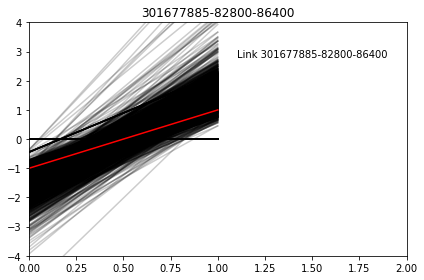

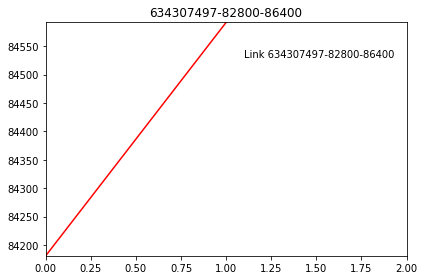

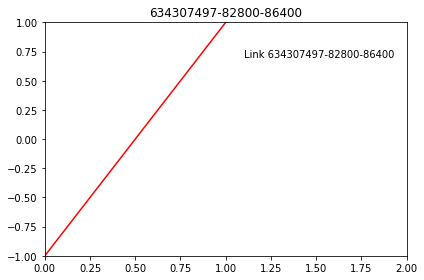

634307497-82800-86400
[547531528, 82800, 86400]: 0.08611061676281614
[547531527, 82800, 86400]: 0.7202503923110551
[8838071, 82800, 86400]: 0.31826750799829506
[159632717, 82800, 86400]: 3.9160930366493116
[152978752, 82800, 86400]: 0.5864960398549814
[159632718, 82800, 86400]: 1.093932639341606
[547531531, 82800, 86400]: 0.6081206329067907
[547531534, 82800, 86400]: 0.6064019852750021
[547531536, 82800, 86400]: 0.05453985387712371
[47876615, 82800, 86400]: 1.4142135623730951
[515675204, 82800, 86400]: 0.3250625082364746
[153947334, 82800, 86400]: 0.34352549782245256
[153947335, 82800, 86400]: 0.329211604553619
[297830232, 82800, 86400]: 0.33071453201343876
[547531526, 82800, 86400]: 0.6081206329067907
[547531532, 82800, 86400]: 0.6038641139404399
[251100155, 82800, 86400]: 1.4142135623730951
[299980276, 82800, 86400]: 0.0
[420135391, 82800, 86400]: 0.31801413244630783
[344864785, 82800, 86400]: 0.4438601748409336
[238610501, 82800, 86400]: 1.1503803297298754
[153021376, 82800, 86400]:

[462409680, 0, 3600]: 0.8419990782531385
[423724841, 0, 3600]: 1.4142135623730951
[440530049, 0, 3600]: 0.0
[152679381, 0, 3600]: 0.5126375984846362
[547531511, 0, 3600]: 0.904816953360854
[152895055, 0, 3600]: 0.0
[152925431, 0, 3600]: 0.0
[251098738, 0, 3600]: 0.0
[633342633, 0, 3600]: 0.818250611406024
[718963663, 0, 3600]: 0.0
[153035246, 0, 3600]: 0.0
[153021390, 0, 3600]: 0.4201655121495391
[640186250, 0, 3600]: 0.9513354378139462
[152977262, 0, 3600]: 0.0
[153006810, 0, 3600]: 0.4022022558892083
[462409675, 0, 3600]: 0.8624319045806924
[697819361, 0, 3600]: 0.0
[245338048, 0, 3600]: 1.1343002251874752
[141129787, 0, 3600]: 0.0
[189677033, 0, 3600]: 1.354044627772836
[127127900, 0, 3600]: 0.64093592690507
[675092022, 0, 3600]: 0.32498662976292897
[153947339, 0, 3600]: 1.2468339856259918
[480282273, 0, 3600]: 0.0
[552008947, 0, 3600]: 1.4142135623730951
[46414958, 0, 3600]: 1.4142135623730951
[153019308, 0, 3600]: 1.3540446277728442
[152746501, 0, 3600]: 0.0
[676148903, 0, 3600]: 

[320136016, 0, 3600]: 0.0
[47876619, 0, 3600]: 0.8971981063667577
[228275487, 0, 3600]: 1.4142135623730951
[40754102, 0, 3600]: 0.3998449818504209
[154150692, 0, 3600]: 1.1096676671363546
[157489813, 0, 3600]: 0.47159553976928015
[423724844, 0, 3600]: 0.12588990364184802
[440530038, 0, 3600]: 0.0
[154535045, 0, 3600]: 1.4142135623730951
[152679342, 0, 3600]: 0.43454709233510486
[440530046, 0, 3600]: 0.0
[152679357, 0, 3600]: 0.7780113759751354
[46594672, 0, 3600]: 0.39808541985807
[440536699, 0, 3600]: 0.0
[420095468, 0, 3600]: 0.4125118209447942
[104081779, 0, 3600]: 0.0
[502508509, 0, 3600]: 0.0
[299045403, 0, 3600]: 0.7150959979253458
[153053652, 0, 3600]: 0.0
[152967188, 0, 3600]: 0.0
[153946071, 0, 3600]: 1.3540446277728448
[127127901, 0, 3600]: 0.802616851388069
[152679340, 0, 3600]: 0.4959138711372991
[298503436, 0, 3600]: 0.466870010672048
[153947083, 0, 3600]: 0.8530807450456317
[189424088, 0, 3600]: 0.0
[298337588, 0, 3600]: 0.6214147541271331
[320136017, 0, 3600]: 0.0
[29850

[153044334, 25200, 28800]: 0.5031646969069448
[780526396, 25200, 28800]: 0.6145003994655297
[515675226, 25200, 28800]: 1.0116240607897624
[515675219, 25200, 28800]: 0.9322552595202989
[230916293, 25200, 28800]: 0.7669180072286982
[160455793, 25200, 28800]: 0.0
[160451392, 25200, 28800]: 2.3339380982188
[459670487, 25200, 28800]: 0.0
[104334703, 25200, 28800]: 1.699594782419683
[152665020, 25200, 28800]: 0.5053353280851088
[298549739, 25200, 28800]: 0.3856850241686098
[674573658, 25200, 28800]: 1.0375903241476012
[441250602, 25200, 28800]: 1.2709607839596166
[297975529, 25200, 28800]: 0.6080289323088623
[251100153, 25200, 28800]: 0.3039205079457309
[153947084, 25200, 28800]: 0.6078593663220783
[189677021, 25200, 28800]: 0.0
[8035448, 25200, 28800]: 0.32556524600865977
[343280103, 25200, 28800]: 0.0
[46430971, 25200, 28800]: 0.0
[152895101, 25200, 28800]: 0.0
[153044335, 25200, 28800]: 0.011010761832722472
[152900418, 25200, 28800]: 0.4505767771084298
[779578738, 25200, 28800]: 0.0471569

[413320311, 61200, 64800]: 0.48276828499666397
[253717639, 61200, 64800]: 1.1615569586883328
[160462993, 61200, 64800]: 0.0
[228275504, 61200, 64800]: 0.0
[152679313, 61200, 64800]: 0.4239668851197922
[441250620, 61200, 64800]: 1.828148102390703
[46262611, 61200, 64800]: 0.4434598222114949
[152967196, 61200, 64800]: 0.0
[8578404, 61200, 64800]: 0.0
[413320310, 61200, 64800]: 0.5098968622077534
[47876609, 61200, 64800]: 0.1566292719867635
[60712851, 61200, 64800]: 5.740037981498138
[47876617, 61200, 64800]: 1.4055232368646955
[152679244, 61200, 64800]: 0.2583431389470533
[152924167, 61200, 64800]: 0.0
[152679243, 61200, 64800]: 0.13957775791981203
[152967669, 61200, 64800]: 0.0
[298925985, 75600, 79200]: 0.3220711922905419
[189663723, 75600, 79200]: 0.8077943615190564
[189663724, 75600, 79200]: 0.8891253933633696
[153053630, 75600, 79200]: 1.2698487529870905
[252392916, 75600, 79200]: 0.41833422765731143
[221553433, 75600, 79200]: 0.7941501326423163
[589546192, 75600, 79200]: 0.37769135

[159740418, 7200, 10800]: 0.0
[159740420, 7200, 10800]: 0.0
[152665023, 7200, 10800]: 0.0
[711142886, 7200, 10800]: 0.6852442196641286
[152980842, 7200, 10800]: 0.9862626586174675
[238618779, 7200, 10800]: 0.0
[152967199, 7200, 10800]: 0.0
[697819358, 7200, 10800]: 0.0
[152967206, 7200, 10800]: 0.0
[297829487, 7200, 10800]: 0.0
[152900426, 7200, 10800]: 0.3709095912281028
[152980840, 7200, 10800]: 1.010012056847395
[104081804, 7200, 10800]: 0.706192594359254
[530633121, 7200, 10800]: 0.39740552396398315
[189663746, 7200, 10800]: 1.3737858680960209
[515863912, 7200, 10800]: 0.0
[159632837, 7200, 10800]: 1.1788252007718325
[299094937, 7200, 10800]: 1.1027700644904281
[610577101, 7200, 10800]: 0.0
[159740914, 7200, 10800]: 1.4142135623730951
[159632715, 7200, 10800]: 1.170359545637778
[319899454, 7200, 10800]: 0.0
[46594668, 7200, 10800]: 0.0
[437838453, 7200, 10800]: 0.39159116418252343
[221553421, 7200, 10800]: 0.7688673591740612
[697819359, 7200, 10800]: 0.8625735078365729
[154535106, 

[152656953, 79200, 82800]: 1.1024995859750721
[275345115, 79200, 82800]: 0.0
[8035570, 79200, 82800]: 1.207355024282407
[298237456, 79200, 82800]: 1.0854227811752397
[152995672, 79200, 82800]: 0.8843010560800565
[46262602, 79200, 82800]: 0.5506022642783687
[191003437, 79200, 82800]: 0.9995682315039673
[189676997, 79200, 82800]: 0.9095871884318034
[610571168, 79200, 82800]: 0.37178333591451795
[252392937, 79200, 82800]: 1.1800260399903661
[152651308, 79200, 82800]: 1.254914973446477
[153006813, 79200, 82800]: 0.7596429727936321
[245334303, 79200, 82800]: 0.43692665899130567
[502511292, 79200, 82800]: 0.06485997638850596
[153004052, 79200, 82800]: 0.6388094473855164
[610949940, 79200, 82800]: 0.9136077029894794
[152651320, 79200, 82800]: 0.7705522913533722
[301677358, 79200, 82800]: 0.9483401090413254
[172232823, 79200, 82800]: 1.5571405343667057
[253717647, 79200, 82800]: 0.9177717169725803
[325598328, 79200, 82800]: 0.5811799024239787
[697192628, 79200, 82800]: 0.7896825418181412
[8035

[299045405, 79200, 82800]: 0.0
[152746490, 79200, 82800]: 0.8182908839678724
[572708709, 79200, 82800]: 0.48915077615442487
[153019237, 79200, 82800]: 0.7868935543887212
[493523048, 79200, 82800]: 0.38556646890147256
[46429880, 79200, 82800]: 0.4722441440075536
[221553430, 79200, 82800]: 0.6386324978766637
[245334397, 79200, 82800]: 0.0
[152679348, 79200, 82800]: 1.2745001895912562
[5069455, 79200, 82800]: 1.760708366797619
[674556449, 79200, 82800]: 0.7261728660365305
[152900395, 79200, 82800]: 0.6883982790679221
[251098781, 79200, 82800]: 0.0
[344864794, 79200, 82800]: 1.0101076565913392
[547531545, 79200, 82800]: 0.39251378289432465
[298925922, 79200, 82800]: 0.9082823245838495
[153022656, 79200, 82800]: 0.9215643717703015
[8035555, 79200, 82800]: 0.9969198421785053
[251098937, 79200, 82800]: 0.0
[697192634, 79200, 82800]: 0.954094949632569
[385334115, 79200, 82800]: 0.0
[442373722, 79200, 82800]: 1.2968321246534567
[299045397, 79200, 82800]: 0.0
[423239423, 79200, 82800]: 0.0
[1530

[152679372, 79200, 82800]: 1.2671460373407224
[297996746, 79200, 82800]: 0.033764910481174755
[228275509, 79200, 82800]: 1.0365201291119497
[320064977, 79200, 82800]: 0.0
[160443450, 79200, 82800]: 0.9895931421120451
[104081738, 79200, 82800]: 1.2239420258684646
[505168991, 79200, 82800]: 1.2298425004043474
[157489531, 79200, 82800]: 1.1420650633331904
[780964776, 79200, 82800]: 1.064431213421642
[152679279, 79200, 82800]: 0.3859840901566678
[344851273, 79200, 82800]: 0.7672899926489406
[152746391, 79200, 82800]: 0.8534108414062382
[298877134, 79200, 82800]: 0.9811361368654316
[298925926, 79200, 82800]: 0.6282426253164273
[780989738, 79200, 82800]: 2.2572394475177995
[491822821, 79200, 82800]: 0.8323226899853737
[152746448, 79200, 82800]: 1.2446121670568644
[408268176, 79200, 82800]: 1.013482879738152
[251098642, 79200, 82800]: 0.9457901879704008
[159740342, 79200, 82800]: 0.8340778862277441
[463524792, 79200, 82800]: 0.8107087737284375
[320135998, 79200, 82800]: 0.10267643250219465
[1

[423724815, 79200, 82800]: 1.0903308128799827
[424918855, 79200, 82800]: 0.9742986448016583
[234439477, 79200, 82800]: 1.3369138377272132
[385621391, 79200, 82800]: 1.6635024633367381
[34700812, 79200, 82800]: 1.0241195591069971
[153035146, 79200, 82800]: 0.0
[152995668, 79200, 82800]: 0.6790329588990665
[299081212, 79200, 82800]: 0.0
[420076292, 79200, 82800]: 0.0
[155685567, 79200, 82800]: 0.8007700815740202
[153055990, 79200, 82800]: 1.3968347150238198
[8035452, 79200, 82800]: 1.3103206864771741
[248762962, 79200, 82800]: 1.096098505264449
[439048438, 79200, 82800]: 0.5754281063707357
[46262600, 79200, 82800]: 0.9852638516540809
[480289612, 79200, 82800]: 1.3926932462577997
[781786569, 79200, 82800]: 1.2894009951872416
[463524785, 79200, 82800]: 1.4093416666671084
[81869222, 79200, 82800]: 1.0112405053680367
[299094984, 79200, 82800]: 1.645130600514951
[152924204, 79200, 82800]: 0.0
[188842344, 79200, 82800]: 0.6909764810208479
[152679198, 79200, 82800]: 1.6937681442001722
[15303528

[153947385, 79200, 82800]: 0.9848554464107386
[589546206, 79200, 82800]: 1.8073539026185272
[153948622, 79200, 82800]: 5.085399003307686
[153035162, 79200, 82800]: 0.64265034841366
[188842247, 79200, 82800]: 1.139285400015536
[234352580, 79200, 82800]: 1.298353207769199
[8578435, 79200, 82800]: 0.4952155596962603
[572708716, 79200, 82800]: 1.1388213059573256
[502511306, 79200, 82800]: 0.658105084648124
[152900400, 79200, 82800]: 0.7532737461561068
[298877136, 79200, 82800]: 0.8525521294067168
[188842290, 79200, 82800]: 1.1631592917664713
[155685561, 79200, 82800]: 1.0508497190417203
[152994913, 79200, 82800]: 0.484271019117937
[159740335, 79200, 82800]: 1.917283581064001
[159632882, 79200, 82800]: 1.0837648943291873
[152654159, 79200, 82800]: 1.26266704197953
[440521428, 79200, 82800]: 1.4814144987172664
[153035198, 79200, 82800]: 0.0
[385619277, 79200, 82800]: 3.156806201652651
[298029511, 79200, 82800]: 1.1510538655057032
[697192601, 79200, 82800]: 0.3485676086816313
[152746492, 7920

[298786496, 79200, 82800]: 0.9114164884314638
[301677363, 79200, 82800]: 1.098797526027095
[152679196, 79200, 82800]: 0.8950663625431201
[153035218, 79200, 82800]: 0.32460679044899304
[440530036, 79200, 82800]: 1.317876422376781
[298237457, 79200, 82800]: 1.001861652657551
[298825164, 79200, 82800]: 1.0400862300752938
[610976571, 79200, 82800]: 0.6518128890446843
[301677370, 79200, 82800]: 0.9604854646002644
[374833925, 79200, 82800]: 0.929945469717363
[259111668, 79200, 82800]: 0.0
[104082870, 79200, 82800]: 1.2371278374562247
[325598337, 79200, 82800]: 0.3246134695008286
[34700808, 79200, 82800]: 1.147677759464758
[678316016, 79200, 82800]: 0.49222794210728077
[423724816, 79200, 82800]: 1.0881482403928322
[104082872, 79200, 82800]: 0.28942241962359844
[463337411, 79200, 82800]: 1.171956442716837
[153000831, 79200, 82800]: 1.1142660620258613
[152652990, 79200, 82800]: 0.7470258042384135
[320135999, 79200, 82800]: 0.37721894544933604
[298707574, 79200, 82800]: 1.2948636034045977
[10408

[297883457, 79200, 82800]: 0.9835106676908238
[152656946, 79200, 82800]: 1.1674747030233146
[8035584, 79200, 82800]: 1.2105091687071736
[47876608, 79200, 82800]: 0.3682357816926891
[188842229, 79200, 82800]: 1.0197431817921527
[195407897, 79200, 82800]: 0.8370896438052703
[172232827, 79200, 82800]: 1.0312559990799468
[423729715, 79200, 82800]: 0.0
[152994904, 79200, 82800]: 1.1080759111252185
[515699251, 79200, 82800]: 1.6928988302360946
[373003231, 79200, 82800]: 1.2804387447625978
[153041715, 79200, 82800]: 0.8957318723707159
[298822861, 79200, 82800]: 1.1308884224096305
[195407898, 79200, 82800]: 0.6524158045927534
[516508096, 79200, 82800]: 0.7376581226503834
[152900386, 79200, 82800]: 0.42145840126841144
[463337402, 79200, 82800]: 1.0177099347241882
[104082912, 79200, 82800]: 0.7121154258450885
[152976619, 79200, 82800]: 0.0
[160440586, 79200, 82800]: 0.31775135340987876
[325598341, 79200, 82800]: 0.5673257785435373
[248762944, 79200, 82800]: 1.1196643650359719
[152746450, 79200, 

[298786502, 79200, 82800]: 0.9746910014749
[259109271, 79200, 82800]: 0.7268616212552645
[152994915, 79200, 82800]: 1.1470883624781165
[22810746, 79200, 82800]: 0.7308262043418895
[152668393, 79200, 82800]: 1.1675881220088409
[153041114, 79200, 82800]: 0.8998366925301264
[480289582, 79200, 82800]: 3.136894729544376
[505168799, 79200, 82800]: 0.9003198416403803
[298944625, 79200, 82800]: 1.4398238231506055
[153019258, 79200, 82800]: 1.4371798638647841
[245336354, 79200, 82800]: 0.768276744471542
[152651298, 79200, 82800]: 0.9037189686256217
[47877710, 79200, 82800]: 0.46824204581390316
[153945676, 79200, 82800]: 0.9867175855136462
[234837224, 79200, 82800]: 0.6538055058409867
[248762956, 79200, 82800]: 0.8664992434361855
[320135994, 79200, 82800]: 0.0
[301724761, 79200, 82800]: 1.119916921222182
[779578748, 79200, 82800]: 0.6865621954910811
[462636858, 79200, 82800]: 0.5800735534588605
[248762960, 79200, 82800]: 1.0587512949626106
[385334141, 79200, 82800]: 0.008978860817807032
[1616205

[441315033, 79200, 82800]: 1.282520521805727
[298703034, 79200, 82800]: 0.7946325063473106
[152976630, 79200, 82800]: 0.0
[298822843, 79200, 82800]: 0.8898297161391501
[152967876, 79200, 82800]: 0.9261305449937817
[8578424, 79200, 82800]: 0.0
[188842224, 79200, 82800]: 0.9551086061453329
[299032769, 79200, 82800]: 1.0143998899414568
[152651324, 79200, 82800]: 1.4772945513593168
[676940741, 79200, 82800]: 0.9045084215369096
[152746447, 79200, 82800]: 1.2672453202953742
[153053570, 79200, 82800]: 1.098899983873803
[298925969, 79200, 82800]: 1.7602294643032108
[423724824, 79200, 82800]: 1.1458544062306841
[188842319, 79200, 82800]: 0.8892510492130467
[152679408, 79200, 82800]: 1.0602234026476147
[153021409, 79200, 82800]: 1.2018660661631446
[697192599, 79200, 82800]: 0.8559660640256039
[298703033, 79200, 82800]: 0.8991112546249924
[5069459, 79200, 82800]: 1.0112747811750218
[442373731, 79200, 82800]: 0.9986788714859107
[153035217, 79200, 82800]: 0.4325223023638158
[157488901, 79200, 82800

[188842288, 79200, 82800]: 1.9666140838985235
[153041734, 79200, 82800]: 0.9588530053639658
[5135002, 79200, 82800]: 1.0109872690996446
[251100072, 79200, 82800]: 0.0
[160451432, 79200, 82800]: 0.3813652579120317
[502501396, 79200, 82800]: 1.166682839071545
[154534961, 79200, 82800]: 0.969014541852249
[775436079, 79200, 82800]: 0.7272236632479336
[127127912, 79200, 82800]: 0.9595481382121788
[8035437, 79200, 82800]: 0.9322912580122182
[480289570, 79200, 82800]: 0.9336429287453774
[153004040, 79200, 82800]: 0.12831538302668294
[153041119, 79200, 82800]: 0.7732999116689692
[373003236, 79200, 82800]: 0.4595799431299787
[152679314, 79200, 82800]: 0.8951173506931243
[159632880, 79200, 82800]: 0.8468072696811443
[487855860, 79200, 82800]: 1.0955166254359459
[298237448, 79200, 82800]: 1.1444025561038556
[189424089, 79200, 82800]: 0.0
[153022666, 79200, 82800]: 1.5109340287139785
[298925980, 79200, 82800]: 0.8513894703668085
[154149748, 79200, 82800]: 0.5846143190939761
[297975694, 79200, 8280

[297975532, 79200, 82800]: 1.0085690749091376
[238609961, 79200, 82800]: 0.017041731613633534
[440644906, 79200, 82800]: 1.0378651673666948
[676152421, 79200, 82800]: 0.5144815948973107
[152995670, 79200, 82800]: 0.9530709538576554
[161620474, 79200, 82800]: 0.9162697770859614
[152679201, 79200, 82800]: 0.5766136398979623
[463337404, 79200, 82800]: 1.0342326055609814
[502501400, 79200, 82800]: 1.4592957561577546
[502511310, 79200, 82800]: 1.1140161542513716
[188842328, 79200, 82800]: 0.8470834182792932
[153043602, 79200, 82800]: 1.2194520181015054
[153006812, 79200, 82800]: 0.7685750721057057
[152668399, 79200, 82800]: 1.185698835187869
[152679349, 79200, 82800]: 1.293496566947863
[8578415, 79200, 82800]: 0.0
[195407915, 79200, 82800]: 1.0017121664925508
[301677361, 79200, 82800]: 1.015719685741436
[8035556, 79200, 82800]: 0.7144916320315701
[320135996, 79200, 82800]: 0.0
[385334146, 79200, 82800]: 0.3974741629792065
[228275469, 79200, 82800]: 0.8563010758056612
[385619276, 79200, 8280

[286685249, 79200, 82800]: 1.1098656919617584
[153053638, 79200, 82800]: 0.12222899682165639
[152679341, 79200, 82800]: 1.2699917662087488
[153053668, 79200, 82800]: 1.0334869650062282
[153019263, 79200, 82800]: 1.1777173410300086
[153043581, 79200, 82800]: 1.2237131591523942
[297883450, 79200, 82800]: 1.1653455685800593
[160469982, 79200, 82800]: 1.097462062476822
[188842266, 79200, 82800]: 1.187122400946242
[298925942, 79200, 82800]: 1.173833608589848
[441455559, 79200, 82800]: 1.1351266391442476
[610571178, 79200, 82800]: 1.1042284908997364
[780549447, 79200, 82800]: 0.32477857864402165
[188842280, 79200, 82800]: 1.2882857457488994
[711367804, 79200, 82800]: 1.056210643364496
[245334302, 79200, 82800]: 0.4347381872606821
[502501394, 79200, 82800]: 0.0
[152900437, 79200, 82800]: 0.4191948528939328
[152746372, 79200, 82800]: 1.2267392368303278
[373003232, 79200, 82800]: 0.6884376969068687
[46414944, 79200, 82800]: 0.6718706611884275
[152679285, 79200, 82800]: 0.05375756982535496
[3017

[152977264, 79200, 82800]: 0.7278582702688349
[649730255, 79200, 82800]: 0.9142640946013176
[297971530, 79200, 82800]: 1.5140448149468466
[195407908, 79200, 82800]: 1.107418971816271
[159740897, 79200, 82800]: 0.9646137078743697
[154535121, 79200, 82800]: 0.9062464976440922
[152978734, 79200, 82800]: 1.8221003663103812
[152665065, 79200, 82800]: 1.7133231468724077
[153019274, 79200, 82800]: 1.1990139119800052
[152746362, 79200, 82800]: 0.9335828435412578
[301677368, 79200, 82800]: 1.0138619804204556
[298237447, 79200, 82800]: 1.4300386869981825
[228275466, 79200, 82800]: 0.32801169782680917
[440644899, 79200, 82800]: 0.7503515580826045
[191003453, 79200, 82800]: 1.0964724622565014
[441462656, 79200, 82800]: 1.4352655594317334
[8578387, 79200, 82800]: 1.1716164199324712
[248762951, 79200, 82800]: 1.0453107760678948
[385334132, 79200, 82800]: 0.0
[438172968, 79200, 82800]: 1.0713473527731794
[188842347, 79200, 82800]: 0.7390379932149292
[253717649, 79200, 82800]: 0.881748832631433
[15267

[245330479, 79200, 82800]: 1.2252216101655107
[502511300, 79200, 82800]: 1.042158002778319
[152924131, 79200, 82800]: 0.7295009449452552
[188842298, 79200, 82800]: 0.9245090766892987
[154535118, 79200, 82800]: 1.0994632248409324
[188842264, 79200, 82800]: 1.2211416501990369
[188842314, 79200, 82800]: 0.7357769821209373
[153019293, 79200, 82800]: 0.7738257152230341
[152665035, 79200, 82800]: 0.7930935099174369
[299045407, 79200, 82800]: 0.009871983069193976
[459670477, 79200, 82800]: 0.1700684231903259
[408268181, 79200, 82800]: 1.2655052176960804
[459670502, 79200, 82800]: 0.9478593552488247
[327005893, 79200, 82800]: 1.046025934363455
[301724742, 79200, 82800]: 0.8166201540131156
[161620495, 79200, 82800]: 1.1889261955623849
[275345098, 79200, 82800]: 0.5360991838223431
[60712869, 79200, 82800]: 1.3333678612904052
[8578432, 79200, 82800]: 1.0380571609193934
[152679290, 79200, 82800]: 0.9826441435982176
[275345117, 79200, 82800]: 0.0
[153021379, 79200, 82800]: 1.1505529721489753
[61097

[153001157, 79200, 82800]: 0.6831903739458517
[297996752, 79200, 82800]: 0.0
[152668386, 79200, 82800]: 0.966534607504923
[412914963, 79200, 82800]: 0.0
[487855863, 79200, 82800]: 0.5139992227252052
[152746449, 79200, 82800]: 0.9778037305168398
[153019238, 79200, 82800]: 0.8748104046607765
[301724754, 79200, 82800]: 0.9953654203466931
[297975530, 79200, 82800]: 0.8515298411391043
[153035157, 79200, 82800]: 0.8914953229700202
[157489527, 79200, 82800]: 1.0296798563672145
[275539105, 79200, 82800]: 0.7636206190448561
[385334119, 79200, 82800]: 0.0
[487855854, 79200, 82800]: 0.42247911528639354
[153045278, 79200, 82800]: 0.4095422270997117
[152966819, 79200, 82800]: 0.936633876544635
[153798138, 79200, 82800]: 0.9232718658639326
[502511305, 79200, 82800]: 0.9514965467242165
[298932012, 79200, 82800]: 0.8726507907164053
[154539317, 79200, 82800]: 0.4352011342512768
[298925934, 79200, 82800]: 1.0459507295561683
[589546220, 79200, 82800]: 1.1406496554211873
[34700815, 79200, 82800]: 1.095164

[440530027, 46800, 50400]: 1.15732706518128
[299081206, 46800, 50400]: 0.3449990815126671
[153035262, 46800, 50400]: 0.4747155800554868
[160458425, 46800, 50400]: 0.0
[153022669, 46800, 50400]: 0.34106640747142203
[468702442, 46800, 50400]: 0.7605084391712956
[160448107, 46800, 50400]: 0.0
[346307027, 46800, 50400]: 0.859146538093515
[8169121, 46800, 50400]: 0.9588506836585592
[153947330, 46800, 50400]: 1.0697156789505482
[441290398, 46800, 50400]: 0.6566380238571753
[152977277, 46800, 50400]: 0.0
[160448100, 46800, 50400]: 0.8425639335279809
[299700063, 46800, 50400]: 0.0
[160451460, 46800, 50400]: 0.7086849959875257
[153044325, 46800, 50400]: 0.0
[152924136, 46800, 50400]: 0.5142285812991556
[91978067, 46800, 50400]: 0.40314537360669506
[346307026, 46800, 50400]: 0.902709132413011
[152665041, 46800, 50400]: 0.7637397520393521
[440530026, 46800, 50400]: 0.8906738065729721
[443414629, 46800, 50400]: 0.5358716991216319
[546853686, 46800, 50400]: 0.8065393628597811
[153043529, 46800, 504

[299018410, 46800, 50400]: 0.6342487810075257
[8169123, 46800, 50400]: 0.899829767726045
[418094195, 46800, 50400]: 1.0020219271918407
[385334095, 46800, 50400]: 0.288128177074885
[546853687, 46800, 50400]: 0.7709997011401313
[259111299, 46800, 50400]: 0.6467396473414769
[152960508, 46800, 50400]: 0.0
[298418290, 46800, 50400]: 0.0
[152960510, 46800, 50400]: 0.3630095693927008
[259111298, 46800, 50400]: 0.5581709316246896
[298237442, 46800, 50400]: 0.8886850096585988
[298726735, 46800, 50400]: 1.1817945091643234
[502511268, 46800, 50400]: 1.3105954459447418
[244021208, 46800, 50400]: 0.25693852828241065
[298237444, 46800, 50400]: 0.675038972028404
[160458427, 46800, 50400]: 0.0
[780970465, 46800, 50400]: 0.835345988353962
[8578408, 46800, 50400]: 1.651858104948541
[160458428, 46800, 50400]: 0.0
[81797896, 46800, 50400]: 0.40783075734988095
[298703052, 46800, 50400]: 1.0129171788583475
[298418289, 46800, 50400]: 0.0
[298418291, 46800, 50400]: 0.0
[385334100, 46800, 50400]: 0.48235238206

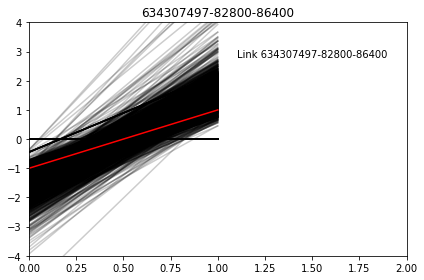

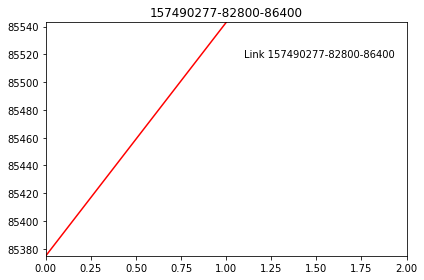

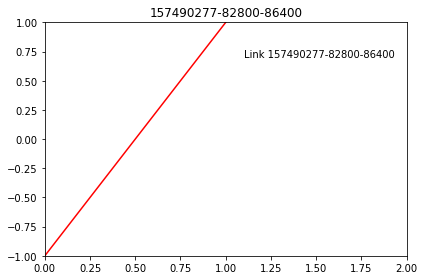

157490277-82800-86400
[547531528, 82800, 86400]: 0.08611061676281614
[547531527, 82800, 86400]: 0.7202503923110551
[8838071, 82800, 86400]: 0.31826750799829506
[159632717, 82800, 86400]: 3.9160930366493116
[152978752, 82800, 86400]: 0.5864960398549814
[159632718, 82800, 86400]: 1.093932639341606
[547531531, 82800, 86400]: 0.6081206329067907
[547531534, 82800, 86400]: 0.6064019852750021
[547531536, 82800, 86400]: 0.05453985387712371
[47876615, 82800, 86400]: 1.4142135623730951
[515675204, 82800, 86400]: 0.3250625082364746
[153947334, 82800, 86400]: 0.34352549782245256
[153947335, 82800, 86400]: 0.329211604553619
[297830232, 82800, 86400]: 0.33071453201343876
[547531526, 82800, 86400]: 0.6081206329067907
[547531532, 82800, 86400]: 0.6038641139404399
[251100155, 82800, 86400]: 1.4142135623730951
[299980276, 82800, 86400]: 0.0
[420135391, 82800, 86400]: 0.31801413244630783
[344864785, 82800, 86400]: 0.4438601748409336
[238610501, 82800, 86400]: 1.1503803297298754
[153021376, 82800, 86400]:

[152967646, 0, 3600]: 0.7611473679197299
[423239438, 0, 3600]: 0.7291667677279271
[675092020, 0, 3600]: 0.5163961349118356
[697819363, 0, 3600]: 0.0
[152980843, 0, 3600]: 1.1710992732963255
[423724842, 0, 3600]: 0.290900683086842
[157489834, 0, 3600]: 0.5873383900314786
[152978672, 0, 3600]: 0.6181847168171992
[547531516, 0, 3600]: 1.1674553362619975
[440521424, 0, 3600]: 1.304401035737697
[297971534, 0, 3600]: 1.4142135623730951
[157488722, 0, 3600]: 0.0
[152967148, 0, 3600]: 1.4142135623730951
[152679218, 0, 3600]: 0.14401207363330237
[780911242, 0, 3600]: 0.7930075974641119
[104081781, 0, 3600]: 0.0
[153019269, 0, 3600]: 0.7810099237607301
[152679413, 0, 3600]: 0.6109731503942056
[160451376, 0, 3600]: 0.0
[299893502, 0, 3600]: 0.3190382760386494
[174924979, 0, 3600]: 0.9822130706166163
[718963842, 0, 3600]: 0.0
[104082865, 0, 3600]: 0.0
[718963897, 0, 3600]: 1.3540446277727969
[159632877, 0, 3600]: 0.21939910367406953
[547531510, 0, 3600]: 1.1415221529170507
[152978671, 0, 3600]: 1.

[516917908, 0, 3600]: 0.15835921350012624
[252392826, 0, 3600]: 0.54479822880896
[532966826, 0, 3600]: 0.6188025485156262
[153053654, 0, 3600]: 0.0
[152900443, 0, 3600]: 0.0
[298029518, 0, 3600]: 1.2392793519986995
[681329979, 0, 3600]: 1.0599657060991552
[189677015, 0, 3600]: 0.7652338697039194
[610577095, 0, 3600]: 0.0
[320136018, 0, 3600]: 0.0
[385857079, 0, 3600]: 1.6128145452879605
[320136015, 0, 3600]: 0.0
[718963902, 0, 3600]: 0.0
[152978669, 0, 3600]: 1.3201400007999147
[199795713, 0, 3600]: 0.5073059361772881
[480289626, 0, 3600]: 0.433261318599682
[104082859, 0, 3600]: 1.1425335956950429
[189677036, 0, 3600]: 0.0
[320083327, 0, 3600]: 1.0861412308343406
[153022687, 0, 3600]: 0.0
[189663748, 0, 3600]: 1.0434897286873366
[154149757, 0, 3600]: 0.8727241845011118
[299045402, 0, 3600]: 0.5307205668057632
[441304004, 0, 3600]: 0.0
[157489835, 0, 3600]: 0.4098109802535252
[423239437, 0, 3600]: 0.9250364080930721
[189663744, 0, 3600]: 1.0096459997397291
[420095476, 0, 3600]: 0.673345

[297817954, 25200, 28800]: 0.9518167807732174
[674573654, 25200, 28800]: 0.9994712195411097
[189677022, 25200, 28800]: 0.0
[153946955, 25200, 28800]: 1.031382432796017
[153050017, 25200, 28800]: 0.6762788731948506
[5135012, 25200, 28800]: 0.4828498104101659
[298549718, 25200, 28800]: 0.0
[459670484, 25200, 28800]: 0.0
[46262596, 25200, 28800]: 0.0
[674573655, 25200, 28800]: 1.023678926917531
[152967672, 25200, 28800]: 0.741633611013003
[153044334, 25200, 28800]: 0.5031646969069448
[780526396, 25200, 28800]: 0.6145003994655297
[515675226, 25200, 28800]: 1.0116240607897624
[515675219, 25200, 28800]: 0.9322552595202989
[230916293, 25200, 28800]: 0.7669180072286982
[160455793, 25200, 28800]: 0.0
[160451392, 25200, 28800]: 2.3339380982188
[459670487, 25200, 28800]: 0.0
[104334703, 25200, 28800]: 1.699594782419683
[152665020, 25200, 28800]: 0.5053353280851088
[298549739, 25200, 28800]: 0.3856850241686098
[674573658, 25200, 28800]: 1.0375903241476012
[441250602, 25200, 28800]: 1.2709607839596

[221553435, 75600, 79200]: 0.6459228225473043
[319927894, 75600, 79200]: 5.517036893990117
[252392911, 75600, 79200]: 0.0
[46594670, 75600, 79200]: 0.0
[221553434, 75600, 79200]: 0.8563741205822915
[252392915, 75600, 79200]: 0.4217184855124976
[153947082, 75600, 79200]: 0.0
[221553438, 75600, 79200]: 0.33438628954581595
[221553437, 75600, 79200]: 0.0
[153053633, 75600, 79200]: 0.977606819773462
[298925984, 75600, 79200]: 0.4093062141712642
[221553440, 75600, 79200]: 0.7141375669123344
[319927896, 75600, 79200]: 3.4666846954710513
[221553436, 75600, 79200]: 0.5391547923295751
[589546195, 75600, 79200]: 0.3651519902459311
[189677032, 75600, 79200]: 0.0
[319927895, 75600, 79200]: 4.663518489616687
[152978739, 14400, 18000]: 0.0
[243630880, 14400, 18000]: 0.0
[152978740, 14400, 18000]: 0.0
[515863915, 14400, 18000]: 0.0
[152978741, 14400, 18000]: 0.0
[245336348, 14400, 18000]: 0.0
[423729097, 7200, 10800]: 0.716523030741904
[152967216, 7200, 10800]: 0.8846138503070733
[547531554, 7200, 108

[298692636, 7200, 10800]: 1.2196198200599928
[697192618, 7200, 10800]: 0.5073059361772881
[22810920, 7200, 10800]: 0.8792565390812402
[152995676, 7200, 10800]: 0.0
[152967200, 7200, 10800]: 0.560876630667466
[675346501, 7200, 10800]: 0.0
[153022799, 7200, 10800]: 0.0
[440536714, 7200, 10800]: 0.8013905053274111
[153055965, 7200, 10800]: 1.4142135623730951
[423729098, 7200, 10800]: 0.45236767569278047
[697819357, 7200, 10800]: 0.8676024261521529
[238618786, 7200, 10800]: 0.0
[610577099, 7200, 10800]: 0.7020830297028438
[245334308, 7200, 10800]: 0.0
[438177906, 7200, 10800]: 1.0341731045397753
[515863909, 7200, 10800]: 0.0
[152967214, 7200, 10800]: 0.0
[438177905, 7200, 10800]: 0.877529988024601
[141129781, 7200, 10800]: 0.0
[319899460, 7200, 10800]: 0.0
[780970461, 7200, 10800]: 0.0
[189677017, 7200, 10800]: 0.0
[463524777, 7200, 10800]: 1.0983588592229028
[221553419, 7200, 10800]: 0.8445487287586653
[711385800, 7200, 10800]: 1.0815547559129528
[299094973, 7200, 10800]: 0.93228719745519

[316421936, 79200, 82800]: 0.9364750043156679
[188842342, 79200, 82800]: 0.6204405324443886
[153035192, 79200, 82800]: 0.35812424263185566
[463524782, 79200, 82800]: 0.0
[22810771, 79200, 82800]: 1.0566422441093213
[152668390, 79200, 82800]: 1.2027742377594597
[298843858, 79200, 82800]: 1.1140171344910736
[502511282, 79200, 82800]: 0.7654250324812878
[152668411, 79200, 82800]: 0.4112778813873137
[344851279, 79200, 82800]: 0.7302505704552958
[152654156, 79200, 82800]: 1.054393249826162
[152924208, 79200, 82800]: 1.1649400495259723
[441265810, 79200, 82800]: 0.9813325458578682
[234352596, 79200, 82800]: 0.45637843230862124
[344851276, 79200, 82800]: 0.7384439849842485
[314499045, 79200, 82800]: 0.7365575973784289
[245334393, 79200, 82800]: 0.4335528086273106
[252835207, 79200, 82800]: 1.1332725792313556
[153947386, 79200, 82800]: 0.9777179063666974
[480289621, 79200, 82800]: 0.7822323843169035
[153004061, 79200, 82800]: 0.6093231297823891
[153035191, 79200, 82800]: 0.35587725888794924
[1

[779578747, 79200, 82800]: 0.5825412221857719
[252392939, 79200, 82800]: 0.8919622418193507
[780483750, 79200, 82800]: 1.1107048976441745
[188842250, 79200, 82800]: 1.1238971395411077
[459670469, 79200, 82800]: 0.0
[153035181, 79200, 82800]: 0.9993987430869538
[298782716, 79200, 82800]: 0.5473412654454642
[298237460, 79200, 82800]: 0.049466117090674167
[152994909, 79200, 82800]: 0.4384515427612062
[298691897, 79200, 82800]: 0.9853838508012085
[188842324, 79200, 82800]: 1.2520638602675696
[154539333, 79200, 82800]: 0.0
[152746376, 79200, 82800]: 1.1385910286047876
[152895082, 79200, 82800]: 0.7119532631962089
[152656912, 79200, 82800]: 0.9718723723324185
[385334145, 79200, 82800]: 0.15772454160506028
[441455568, 79200, 82800]: 1.29437730458759
[157489530, 79200, 82800]: 1.2949132051416026
[153049904, 79200, 82800]: 0.7950966636849944
[298611224, 79200, 82800]: 0.4537190586570085
[34700796, 79200, 82800]: 1.2045517008494206
[153019291, 79200, 82800]: 0.4865356283292629
[298786501, 79200,

[314499050, 79200, 82800]: 0.878693062651801
[480289613, 79200, 82800]: 1.3356435399943587
[251098778, 79200, 82800]: 0.3894166929988706
[251098647, 79200, 82800]: 1.015723883433007
[298703031, 79200, 82800]: 0.8820022007636291
[228275473, 79200, 82800]: 1.0005990121860961
[480289605, 79200, 82800]: 0.44672162849318686
[665834895, 79200, 82800]: 0.9852547924894999
[298786479, 79200, 82800]: 1.0278461682945081
[188842221, 79200, 82800]: 0.951715261052395
[189452926, 79200, 82800]: 1.103264503764774
[259110128, 79200, 82800]: 0.0
[298877131, 79200, 82800]: 0.8999066071470325
[248762950, 79200, 82800]: 1.0305548454523088
[153049901, 79200, 82800]: 0.8099291402804297
[8035564, 79200, 82800]: 0.8367047889639895
[697192600, 79200, 82800]: 0.0
[152978772, 79200, 82800]: 0.863757898803062
[157489540, 79200, 82800]: 0.8051913420411647
[589546205, 79200, 82800]: 2.3967837484655283
[152679193, 79200, 82800]: 1.1413213129046416
[420076286, 79200, 82800]: 1.5867826080690173
[443405861, 79200, 82800

[152679410, 79200, 82800]: 0.8761907469306505
[152665016, 79200, 82800]: 1.2380564353207786
[298822855, 79200, 82800]: 0.01835173710202475
[153004063, 79200, 82800]: 0.36960523345951607
[153053635, 79200, 82800]: 0.0
[275345116, 79200, 82800]: 0.0
[502511309, 79200, 82800]: 0.9600073966964762
[153053636, 79200, 82800]: 0.4630131588935513
[238609962, 79200, 82800]: 0.013003431655511799
[344864789, 79200, 82800]: 1.0214193579348216
[8578438, 79200, 82800]: 0.8098007960996113
[531743752, 79200, 82800]: 1.0838604195987624
[463524791, 79200, 82800]: 0.35817894756119106
[463524779, 79200, 82800]: 0.0
[153004057, 79200, 82800]: 0.07860012755511685
[152651319, 79200, 82800]: 0.40608986912362066
[153044329, 79200, 82800]: 0.7656116738726066
[189663722, 79200, 82800]: 0.7480232877612196
[153035194, 79200, 82800]: 0.18797355104234467
[152746373, 79200, 82800]: 1.1411484681981312
[81869221, 79200, 82800]: 1.0479106698924467
[153035189, 79200, 82800]: 0.44526656806849485
[238609963, 79200, 82800]: 

[160441412, 79200, 82800]: 0.0
[221553412, 79200, 82800]: 0.549013588023769
[34700802, 79200, 82800]: 1.292795149723603
[297883457, 79200, 82800]: 0.9835106676908238
[152656946, 79200, 82800]: 1.1674747030233146
[8035584, 79200, 82800]: 1.2105091687071736
[47876608, 79200, 82800]: 0.3682357816926891
[188842229, 79200, 82800]: 1.0197431817921527
[195407897, 79200, 82800]: 0.8370896438052703
[172232827, 79200, 82800]: 1.0312559990799468
[423729715, 79200, 82800]: 0.0
[152994904, 79200, 82800]: 1.1080759111252185
[515699251, 79200, 82800]: 1.6928988302360946
[373003231, 79200, 82800]: 1.2804387447625978
[153041715, 79200, 82800]: 0.8957318723707159
[298822861, 79200, 82800]: 1.1308884224096305
[195407898, 79200, 82800]: 0.6524158045927534
[516508096, 79200, 82800]: 0.7376581226503834
[152900386, 79200, 82800]: 0.42145840126841144
[463337402, 79200, 82800]: 1.0177099347241882
[104082912, 79200, 82800]: 0.7121154258450885
[152976619, 79200, 82800]: 0.0
[160440586, 79200, 82800]: 0.317751353

[152924199, 79200, 82800]: 0.0
[153049970, 79200, 82800]: 1.106996875876195
[8838080, 79200, 82800]: 2.2139924199067296
[153000841, 79200, 82800]: 0.7940761215436906
[152679184, 79200, 82800]: 0.9358075836752255
[188842251, 79200, 82800]: 1.123877039069057
[298822846, 79200, 82800]: 1.3202261827439483
[298822848, 79200, 82800]: 0.9310191062892861
[297998497, 79200, 82800]: 0.0
[172232826, 79200, 82800]: 1.0109202269004942
[442373728, 79200, 82800]: 1.3531555227830656
[502511307, 79200, 82800]: 0.8472228045793515
[153050034, 79200, 82800]: 1.0977510633019416
[780989739, 79200, 82800]: 0.47278801706873136
[152656805, 79200, 82800]: 0.8131931192907957
[172232824, 79200, 82800]: 1.0542704248162043
[158618963, 79200, 82800]: 0.919016749081534
[158618962, 79200, 82800]: 0.9097318831523863
[188842318, 79200, 82800]: 1.0326941967341792
[344864787, 79200, 82800]: 1.148333260255594
[441304018, 79200, 82800]: 1.0782419688413787
[217603104, 79200, 82800]: 0.7546019967312841
[252835216, 79200, 8280

[153035217, 79200, 82800]: 0.4325223023638158
[157488901, 79200, 82800]: 1.0462659240488292
[188842339, 79200, 82800]: 0.6478510969217335
[153035256, 79200, 82800]: 0.0
[325598334, 79200, 82800]: 0.5412755163402285
[297996751, 79200, 82800]: 0.0
[157488903, 79200, 82800]: 1.0662586454736767
[160458422, 79200, 82800]: 0.28671165971738316
[152924206, 79200, 82800]: 0.8078360841392939
[438177908, 79200, 82800]: 0.32069487141231207
[152924944, 79200, 82800]: 0.5209946020699008
[160443456, 79200, 82800]: 0.9863966706142715
[298337593, 79200, 82800]: 0.6703201501933191
[188842331, 79200, 82800]: 1.3478816025520963
[46932864, 79200, 82800]: 0.5348636075313894
[423729709, 79200, 82800]: 0.0
[217603105, 79200, 82800]: 0.8203910146727217
[252392947, 79200, 82800]: 0.4577083996121256
[22810762, 79200, 82800]: 1.011620667261851
[297826869, 79200, 82800]: 0.8819978119506496
[153035158, 79200, 82800]: 0.9449363143162692
[154149755, 79200, 82800]: 0.531689878575173
[301724762, 79200, 82800]: 1.153548

[91978080, 79200, 82800]: 1.0891989265571647
[152746494, 79200, 82800]: 0.0
[153030225, 79200, 82800]: 0.7822301934442618
[298786473, 79200, 82800]: 1.2501704368125621
[152679207, 79200, 82800]: 0.08301798178215619
[441455562, 79200, 82800]: 1.2410046266663888
[152679277, 79200, 82800]: 0.5864415902653369
[610571172, 79200, 82800]: 0.17268182236568808
[152746461, 79200, 82800]: 1.1678043745174054
[298865290, 79200, 82800]: 1.013069487924496
[440521431, 79200, 82800]: 1.1534944993483567
[298703054, 79200, 82800]: 1.0062988832244777
[385331945, 79200, 82800]: 0.9299694017967582
[154149749, 79200, 82800]: 0.7376398178643222
[245334395, 79200, 82800]: 0.5951834831579577
[152679278, 79200, 82800]: 0.36076106379479195
[189424094, 79200, 82800]: 0.8469219091227332
[297882687, 79200, 82800]: 0.8927012530457833
[152895046, 79200, 82800]: 1.22293701111658
[410013913, 79200, 82800]: 1.0392220789308402
[104082907, 79200, 82800]: 0.8336262333687037
[298925982, 79200, 82800]: 0.7779847682282863
[464

[8035556, 79200, 82800]: 0.7144916320315701
[320135996, 79200, 82800]: 0.0
[385334146, 79200, 82800]: 0.3974741629792065
[228275469, 79200, 82800]: 0.8563010758056612
[385619276, 79200, 82800]: 1.9906104916601581
[152652991, 79200, 82800]: 0.9145142409553099
[676950777, 79200, 82800]: 0.541599387294961
[245337808, 79200, 82800]: 0.7314746529611423
[245336355, 79200, 82800]: 0.6930616209834254
[297826870, 79200, 82800]: 1.1367088854649117
[152924210, 79200, 82800]: 1.1983681804175772
[441265804, 79200, 82800]: 0.9374768489083798
[298699136, 79200, 82800]: 1.071995227892416
[463337398, 79200, 82800]: 1.060154554296059
[152995662, 79200, 82800]: 0.0
[188842305, 79200, 82800]: 0.7600620052426691
[423724810, 79200, 82800]: 0.9398230387365728
[779578751, 79200, 82800]: 1.042812235275198
[160440591, 79200, 82800]: 0.16053880514380275
[697192630, 79200, 82800]: 0.5015913654510127
[299081215, 79200, 82800]: 0.0
[779578752, 79200, 82800]: 0.7223368018745382
[153019282, 79200, 82800]: 0.291351370

[301724763, 79200, 82800]: 0.9670956277429305
[188842333, 79200, 82800]: 0.0
[104082913, 79200, 82800]: 0.6756960529730575
[275345121, 79200, 82800]: 0.7940699024579122
[298559014, 79200, 82800]: 1.1038365113319948
[459684534, 79200, 82800]: 0.13677914061468227
[665834897, 79200, 82800]: 1.3186216890404228
[152746367, 79200, 82800]: 1.1225556287660048
[152746366, 79200, 82800]: 1.088876965326505
[195407894, 79200, 82800]: 0.9714608338436338
[420135392, 79200, 82800]: 0.6636010048903221
[153035165, 79200, 82800]: 0.7365146854354949
[152654157, 79200, 82800]: 1.1303046567445552
[152746485, 79200, 82800]: 0.9156524847845796
[487855858, 79200, 82800]: 1.0585534717964629
[424918875, 79200, 82800]: 0.9749490554248831
[423239444, 79200, 82800]: 0.3179519471798791
[76191271, 79200, 82800]: 1.3160084326195969
[152679345, 79200, 82800]: 1.113699797749882
[153043603, 79200, 82800]: 0.9521149204027575
[325598333, 79200, 82800]: 0.5446011864070617
[154534949, 79200, 82800]: 0.774523155194494
[16162

[153043584, 79200, 82800]: 0.7385044728811574
[252392948, 79200, 82800]: 0.3985928656737377
[385334124, 79200, 82800]: 0.0
[159632881, 79200, 82800]: 1.054973787708495
[245334392, 79200, 82800]: 0.811485724264051
[418178085, 79200, 82800]: 0.5289519869738947
[153004038, 79200, 82800]: 0.033426968132762074
[234439482, 79200, 82800]: 0.6753308750623143
[245330476, 79200, 82800]: 0.9541851277681421
[8578397, 79200, 82800]: 0.0
[234352595, 79200, 82800]: 0.49780018046433056
[297826868, 79200, 82800]: 0.6242412195974996
[34700785, 79200, 82800]: 0.6084284063032581
[298925941, 79200, 82800]: 1.135454094579287
[152746444, 79200, 82800]: 1.2501696484449851
[442373729, 79200, 82800]: 1.5992106018218333
[298237451, 79200, 82800]: 1.1262433260871698
[46429870, 79200, 82800]: 0.8390649082126782
[779578756, 79200, 82800]: 1.6624359249244123
[189663729, 79200, 82800]: 0.19621183492375208
[152679403, 79200, 82800]: 1.3475680976375815
[152679180, 79200, 82800]: 1.0022408693765124
[188842222, 79200, 82

[153004043, 79200, 82800]: 0.4340421007581919
[298786484, 79200, 82800]: 0.9617952319102213
[423239446, 79200, 82800]: 0.34996797382114264
[253717641, 79200, 82800]: 0.8010393527500795
[220393421, 79200, 82800]: 0.9859177284282242
[346316340, 79200, 82800]: 0.8576999195271663
[298616208, 79200, 82800]: 1.0531894226008642
[234837225, 79200, 82800]: 0.6147603122853664
[438177899, 79200, 82800]: 0.8302834830670749
[152679362, 79200, 82800]: 1.2033364956336576
[154537279, 79200, 82800]: 0.9951024806940628
[441250596, 79200, 82800]: 0.6026408482709468
[152668417, 79200, 82800]: 0.33753236237657464
[152978776, 79200, 82800]: 0.8946463264076557
[152746453, 79200, 82800]: 1.0726286840296995
[152895083, 79200, 82800]: 0.716129807185851
[530633118, 79200, 82800]: 0.6324018271767827
[153021414, 79200, 82800]: 3.3077459986818205
[441455572, 79200, 82800]: 0.9378671417745094
[346316344, 79200, 82800]: 0.8562612843567836
[22810750, 79200, 82800]: 1.0241688686809158
[153019297, 79200, 82800]: 0.0
[15

[610571176, 79200, 82800]: 1.0667778356872806
[8035571, 79200, 82800]: 1.3047856256900796
[385334129, 79200, 82800]: 0.0
[301677364, 79200, 82800]: 1.0814053560168728
[502501392, 79200, 82800]: 0.9942637900409826
[46430965, 79200, 82800]: 0.892835120306439
[155685563, 79200, 82800]: 0.9570066216914299
[160443451, 79200, 82800]: 1.0001176875786149
[152900390, 79200, 82800]: 1.064916439764137
[320136011, 79200, 82800]: 1.3913965001992594
[152900434, 79200, 82800]: 0.3368277119449569
[160466240, 79200, 82800]: 0.0
[152924186, 79200, 82800]: 0.0
[480289602, 79200, 82800]: 0.7618281105733021
[160438435, 79200, 82800]: 1.1505838041158165
[298925929, 79200, 82800]: 0.9761740328236184
[443439116, 79200, 82800]: 0.9476070539294311
[154151045, 79200, 82800]: 0.9685988024843059
[46932870, 79200, 82800]: 0.46886246635552564
[780918888, 79200, 82800]: 0.8853532009558681
[189677007, 79200, 82800]: 1.0858429352981547
[408268178, 79200, 82800]: 1.1390251897363695
[442373621, 79200, 82800]: 0.859817305

[676950778, 46800, 50400]: 0.9683962738851871
[676950791, 46800, 50400]: 0.0
[152679412, 46800, 50400]: 0.5627185341182664
[8035440, 46800, 50400]: 0.39890292658480514
[385334113, 46800, 50400]: 0.0
[418094196, 46800, 50400]: 0.9827764232800833
[46594682, 46800, 50400]: 0.12259618729716726
[423239425, 46800, 50400]: 0.9926263191344963
[385334111, 46800, 50400]: 0.0
[441290399, 46800, 50400]: 0.0
[252835227, 46800, 50400]: 0.33332046659138514
[152900408, 46800, 50400]: 0.0
[299018413, 46800, 50400]: 0.5530557500922437
[160458426, 46800, 50400]: 0.0
[152746398, 46800, 50400]: 0.5184531270539611
[152980865, 46800, 50400]: 1.3748509887808689
[780989737, 46800, 50400]: 0.0
[153035200, 46800, 50400]: 0.0
[649730256, 46800, 50400]: 0.033548325549866136
[152977281, 46800, 50400]: 0.0
[438172979, 46800, 50400]: 0.0
[8578412, 46800, 50400]: 0.5344261490139621
[298877124, 46800, 50400]: 0.08555871872421264
[160448521, 46800, 50400]: 0.9787286496990196
[152980828, 46800, 50400]: 1.1892496316949435

[299081219, 46800, 50400]: 0.0
[493523044, 46800, 50400]: 0.6513275117400289
[468702769, 46800, 50400]: 0.8986029912077881
[153022672, 46800, 50400]: 0.0
[299018411, 46800, 50400]: 0.4281481173847992
[152977278, 46800, 50400]: 0.0
[153947325, 46800, 50400]: 0.5113223064262601
[443414626, 46800, 50400]: 0.44884276255494937
[104334699, 46800, 50400]: 1.5532334525663631
[298237441, 46800, 50400]: 0.5822521603058802
[152900445, 46800, 50400]: 0.04379141150619222
[423239426, 46800, 50400]: 1.004715936587897
[244021207, 46800, 50400]: 0.5769318682857784
[676950780, 46800, 50400]: 0.31599632792166105
[160451461, 46800, 50400]: 0.7174729094598349
[780970463, 46800, 50400]: 0.8656275732959454
[385334098, 46800, 50400]: 0.32875682941719103
[244021205, 46800, 50400]: 0.60528831348072
[152679330, 46800, 50400]: 0.5874590903873684
[152967819, 46800, 50400]: 0.5907883080196409
[299018412, 46800, 50400]: 0.10602558269185264
[546853684, 46800, 50400]: 0.04104445926539281
[160451430, 46800, 50400]: 1.3

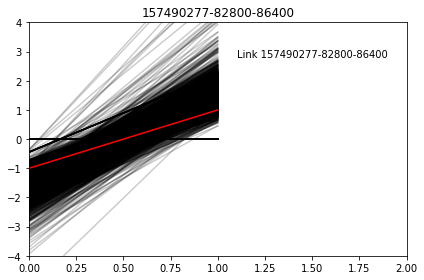

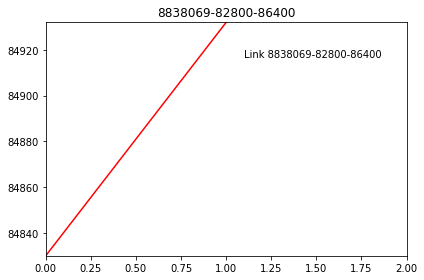

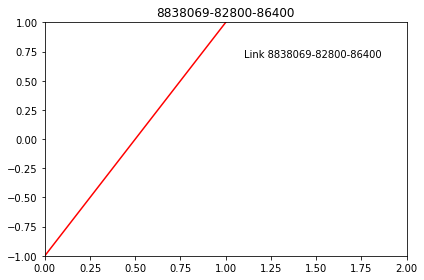

8838069-82800-86400
[547531528, 82800, 86400]: 0.08611061676281614
[547531527, 82800, 86400]: 0.7202503923110551
[8838071, 82800, 86400]: 0.31826750799829506
[159632717, 82800, 86400]: 3.9160930366493116
[152978752, 82800, 86400]: 0.5864960398549814
[159632718, 82800, 86400]: 1.093932639341606
[547531531, 82800, 86400]: 0.6081206329067907
[547531534, 82800, 86400]: 0.6064019852750021
[547531536, 82800, 86400]: 0.05453985387712371
[47876615, 82800, 86400]: 1.4142135623730951
[515675204, 82800, 86400]: 0.3250625082364746
[153947334, 82800, 86400]: 0.34352549782245256
[153947335, 82800, 86400]: 0.329211604553619
[297830232, 82800, 86400]: 0.33071453201343876
[547531526, 82800, 86400]: 0.6081206329067907
[547531532, 82800, 86400]: 0.6038641139404399
[251100155, 82800, 86400]: 1.4142135623730951
[299980276, 82800, 86400]: 0.0
[420135391, 82800, 86400]: 0.31801413244630783
[344864785, 82800, 86400]: 0.4438601748409336
[238610501, 82800, 86400]: 1.1503803297298754
[153021376, 82800, 86400]: 1

[697819362, 0, 3600]: 0.0
[440530040, 0, 3600]: 0.0
[462409678, 0, 3600]: 0.6290768876897168
[299045404, 0, 3600]: 0.3243394109584823
[154537264, 0, 3600]: 0.008884846973286824
[286685259, 0, 3600]: 0.8192057213504307
[161620472, 0, 3600]: 1.1469356565040747
[153035112, 0, 3600]: 0.0
[547531512, 0, 3600]: 1.1314753859356843
[154534948, 0, 3600]: 0.0
[154149756, 0, 3600]: 0.9118866679781621
[152679220, 0, 3600]: 0.7877782250228365
[141129794, 0, 3600]: 1.0218597347749836
[779578736, 0, 3600]: 1.0435862061101933
[160451372, 0, 3600]: 1.8520854526301371
[440530050, 0, 3600]: 0.0
[161620465, 0, 3600]: 0.9499870249648488
[153000853, 0, 3600]: 0.9156039238936661
[152980882, 0, 3600]: 1.535317233218172
[228275491, 0, 3600]: 0.6180395918182225
[154150230, 0, 3600]: 1.1180339887498876
[152996534, 0, 3600]: 0.0
[104082880, 0, 3600]: 0.0
[152967646, 0, 3600]: 0.7611473679197299
[423239438, 0, 3600]: 0.7291667677279271
[675092020, 0, 3600]: 0.5163961349118356
[697819363, 0, 3600]: 0.0
[152980843, 

[440530048, 0, 3600]: 0.0
[104082858, 0, 3600]: 1.1632745756277532
[153947087, 0, 3600]: 1.0003318807583312
[154535124, 0, 3600]: 1.222216067694848
[697819364, 0, 3600]: 0.0
[154537265, 0, 3600]: 0.019178102599292066
[718963676, 0, 3600]: 0.0
[234345996, 0, 3600]: 1.4142135623730951
[441304001, 0, 3600]: 0.6688561609372314
[502501384, 0, 3600]: 0.0
[153006793, 0, 3600]: 0.43533167884205826
[152895056, 0, 3600]: 0.0
[134801107, 0, 3600]: 0.0
[688769623, 0, 3600]: 0.8952466909782008
[152679221, 0, 3600]: 0.3325485838174021
[718963662, 0, 3600]: 0.0
[681329980, 0, 3600]: 1.278500054693866
[441497930, 0, 3600]: 0.0
[298337589, 0, 3600]: 0.798956244695178
[420095473, 0, 3600]: 0.6963717318366592
[423239429, 0, 3600]: 0.9224134962972107
[688769627, 0, 3600]: 0.9877139708016022
[675092021, 0, 3600]: 0.5149771201906757
[299893498, 0, 3600]: 0.8637766000876486
[159632858, 0, 3600]: 0.0
[299081200, 0, 3600]: 0.9682288148023548
[104081780, 0, 3600]: 0.0
[385619164, 0, 3600]: 1.1120387478598042
[2

[160451393, 25200, 28800]: 1.3142693443814257
[153947080, 25200, 28800]: 1.0111154073404554
[159740395, 25200, 28800]: 0.0
[441462652, 25200, 28800]: 0.6996280543939452
[298865303, 25200, 28800]: 1.025136306479927
[189677023, 25200, 28800]: 0.0
[298549720, 25200, 28800]: 0.0
[160451453, 25200, 28800]: 0.8317300589259551
[195407902, 25200, 28800]: 0.0
[153044317, 25200, 28800]: 0.11661745915350044
[153022803, 25200, 28800]: 0.0
[152977252, 25200, 28800]: 0.5296105126559073
[515675220, 25200, 28800]: 1.0972494989165382
[46262594, 25200, 28800]: 0.47323458684881126
[397153554, 25200, 28800]: 1.2280705999588295
[515675218, 25200, 28800]: 0.8670485937531773
[297817954, 25200, 28800]: 0.9518167807732174
[674573654, 25200, 28800]: 0.9994712195411097
[189677022, 25200, 28800]: 0.0
[153946955, 25200, 28800]: 1.031382432796017
[153050017, 25200, 28800]: 0.6762788731948506
[5135012, 25200, 28800]: 0.4828498104101659
[298549718, 25200, 28800]: 0.0
[459670484, 25200, 28800]: 0.0
[46262596, 25200, 2

[253717640, 61200, 64800]: 1.2774308833038892
[385619159, 61200, 64800]: 1.2747452299429523
[519178542, 61200, 64800]: 0.6168679174956787
[152679386, 61200, 64800]: 0.12878686920165477
[298847948, 61200, 64800]: 0.0
[46262610, 61200, 64800]: 0.3416471616535186
[218911655, 61200, 64800]: 0.32078465448861704
[47876618, 61200, 64800]: 1.1451051487017123
[373003261, 61200, 64800]: 0.0
[152924175, 61200, 64800]: 0.06899383559525439
[298930276, 61200, 64800]: 0.0
[298865281, 61200, 64800]: 1.117493567926074
[228275501, 61200, 64800]: 0.0
[152924166, 61200, 64800]: 0.27286326690837287
[152679383, 61200, 64800]: 0.4769803648057774
[152679388, 61200, 64800]: 0.4176212840296113
[515675215, 61200, 64800]: 1.0152296262936225
[152668419, 61200, 64800]: 0.0
[8578388, 61200, 64800]: 0.6987644729989435
[152668407, 61200, 64800]: 1.2627582288423926
[152679275, 61200, 64800]: 0.0
[298930277, 61200, 64800]: 0.3864641610411253
[228275500, 61200, 64800]: 0.0
[695018706, 61200, 64800]: 0.688411471106869
[15

[152967206, 7200, 10800]: 0.0
[297829487, 7200, 10800]: 0.0
[152900426, 7200, 10800]: 0.3709095912281028
[152980840, 7200, 10800]: 1.010012056847395
[104081804, 7200, 10800]: 0.706192594359254
[530633121, 7200, 10800]: 0.39740552396398315
[189663746, 7200, 10800]: 1.3737858680960209
[515863912, 7200, 10800]: 0.0
[159632837, 7200, 10800]: 1.1788252007718325
[299094937, 7200, 10800]: 1.1027700644904281
[610577101, 7200, 10800]: 0.0
[159740914, 7200, 10800]: 1.4142135623730951
[159632715, 7200, 10800]: 1.170359545637778
[319899454, 7200, 10800]: 0.0
[46594668, 7200, 10800]: 0.0
[437838453, 7200, 10800]: 0.39159116418252343
[221553421, 7200, 10800]: 0.7688673591740612
[697819359, 7200, 10800]: 0.8625735078365729
[154535106, 7200, 10800]: 0.7156588863546578
[154149764, 7200, 10800]: 0.44456431020682136
[152967215, 7200, 10800]: 0.550946821416222
[780549446, 7200, 10800]: 0.6493325599331756
[104334696, 7200, 10800]: 1.3522339246099129
[676703081, 7200, 10800]: 1.329344147077538
[547531506, 7

[610571168, 79200, 82800]: 0.37178333591451795
[252392937, 79200, 82800]: 1.1800260399903661
[152651308, 79200, 82800]: 1.254914973446477
[153006813, 79200, 82800]: 0.7596429727936321
[245334303, 79200, 82800]: 0.43692665899130567
[502511292, 79200, 82800]: 0.06485997638850596
[153004052, 79200, 82800]: 0.6388094473855164
[610949940, 79200, 82800]: 0.9136077029894794
[152651320, 79200, 82800]: 0.7705522913533722
[301677358, 79200, 82800]: 0.9483401090413254
[172232823, 79200, 82800]: 1.5571405343667057
[253717647, 79200, 82800]: 0.9177717169725803
[325598328, 79200, 82800]: 0.5811799024239787
[697192628, 79200, 82800]: 0.7896825418181412
[8035560, 79200, 82800]: 0.8384476274477471
[152665064, 79200, 82800]: 1.538391022297662
[443405859, 79200, 82800]: 0.8920494900092151
[160458423, 79200, 82800]: 0.14179680732151465
[153004045, 79200, 82800]: 0.15271996969928808
[438172975, 79200, 82800]: 1.9617466146988933
[188842287, 79200, 82800]: 1.7889672157049374
[161620493, 79200, 82800]: 1.0224

[152679405, 79200, 82800]: 1.1769453249216801
[153043599, 79200, 82800]: 0.8568028634704064
[298703032, 79200, 82800]: 1.127478658009285
[160462990, 79200, 82800]: 0.7898629681194488
[159740338, 79200, 82800]: 1.085623510063874
[678035897, 79200, 82800]: 0.7293085265950224
[298234501, 79200, 82800]: 0.9099169793006988
[320136000, 79200, 82800]: 0.34100934753106416
[22810759, 79200, 82800]: 1.1815344527777731
[298822858, 79200, 82800]: 0.6968908308963289
[153019292, 79200, 82800]: 0.8947621537358679
[463524793, 79200, 82800]: 0.86170931386933
[160458424, 79200, 82800]: 0.5178039312602558
[153798137, 79200, 82800]: 0.9252181450690993
[418178094, 79200, 82800]: 0.0
[373003234, 79200, 82800]: 0.5587550236617214
[438172970, 79200, 82800]: 1.0195666390985607
[423724814, 79200, 82800]: 1.0272601353420925
[423724836, 79200, 82800]: 1.1233412209949662
[298237461, 79200, 82800]: 0.08307425340514239
[297998491, 79200, 82800]: 0.3880530453761683
[188842265, 79200, 82800]: 1.1679399956836314
[15265

[298925976, 79200, 82800]: 1.0740328914751354
[441265809, 79200, 82800]: 1.0233428135715312
[245337810, 79200, 82800]: 0.7491947201302372
[152967877, 79200, 82800]: 0.9515623434090433
[442373708, 79200, 82800]: 1.0070357306067161
[188842309, 79200, 82800]: 1.6482180164844529
[297996749, 79200, 82800]: 0.0
[314499046, 79200, 82800]: 0.7467628577694498
[385334131, 79200, 82800]: 0.0
[8035456, 79200, 82800]: 1.063987667727034
[153030228, 79200, 82800]: 0.0
[8578385, 79200, 82800]: 1.056305290169802
[412914961, 79200, 82800]: 1.1521924331549391
[152679197, 79200, 82800]: 1.1723336437638676
[46429873, 79200, 82800]: 1.4231394229325744
[8578416, 79200, 82800]: 0.0
[441265811, 79200, 82800]: 1.196016362128497
[152656824, 79200, 82800]: 0.8202728382804807
[152679210, 79200, 82800]: 0.3950732325650147
[547531504, 79200, 82800]: 0.9595241079192898
[153000825, 79200, 82800]: 1.1282675363331245
[154534960, 79200, 82800]: 0.8509929673323464
[298503411, 79200, 82800]: 1.0848966843994228
[160469976, 

[153041118, 79200, 82800]: 0.879470651215521
[610976572, 79200, 82800]: 0.7043908010879805
[153041106, 79200, 82800]: 0.0
[46429884, 79200, 82800]: 0.17971093608785893
[298944620, 79200, 82800]: 1.48444307416218
[697192596, 79200, 82800]: 0.4861836754889783
[152679203, 79200, 82800]: 0.8993070012740597
[188842234, 79200, 82800]: 0.9358519812927429
[152746384, 79200, 82800]: 1.3364003783234222
[441250599, 79200, 82800]: 0.7806631678576168
[153035178, 79200, 82800]: 1.0273880672287037
[152665059, 79200, 82800]: 1.1472391898036371
[248762959, 79200, 82800]: 0.9233027857963172
[104081822, 79200, 82800]: 0.630389531343315
[320064978, 79200, 82800]: 0.0
[46414960, 79200, 82800]: 0.07848796037274365
[780228280, 79200, 82800]: 0.9454105701177794
[153044328, 79200, 82800]: 0.6489685051699646
[286685267, 79200, 82800]: 1.1921269679735191
[440536698, 79200, 82800]: 0.0
[780539490, 79200, 82800]: 0.3574495081872159
[409377704, 79200, 82800]: 0.9399213513638706
[46262601, 79200, 82800]: 1.033329328

[153035194, 79200, 82800]: 0.18797355104234467
[152746373, 79200, 82800]: 1.1411484681981312
[81869221, 79200, 82800]: 1.0479106698924467
[153035189, 79200, 82800]: 0.44526656806849485
[238609963, 79200, 82800]: 0.0
[160440587, 79200, 82800]: 0.5002092922241234
[443405854, 79200, 82800]: 1.3724194674074592
[8035463, 79200, 82800]: 0.6847683063146501
[152978744, 79200, 82800]: 0.6669127755208453
[346316359, 79200, 82800]: 0.7193338085278324
[8035483, 79200, 82800]: 0.819332653823763
[589546200, 79200, 82800]: 2.3993930232995027
[188842340, 79200, 82800]: 0.6029093994857271
[385331944, 79200, 82800]: 1.175770465895714
[60712867, 79200, 82800]: 1.339434179075593
[344864791, 79200, 82800]: 1.0334733037726813
[152980850, 79200, 82800]: 1.4301037938721544
[152924133, 79200, 82800]: 0.7400537126220562
[780211970, 79200, 82800]: 0.7670228722624265
[152978774, 79200, 82800]: 0.69260706330265
[154534957, 79200, 82800]: 0.849670302642266
[252835486, 79200, 82800]: 0.8790079637487371
[301724750, 7

[152967874, 79200, 82800]: 0.9571890274659062
[160441412, 79200, 82800]: 0.0
[221553412, 79200, 82800]: 0.549013588023769
[34700802, 79200, 82800]: 1.292795149723603
[297883457, 79200, 82800]: 0.9835106676908238
[152656946, 79200, 82800]: 1.1674747030233146
[8035584, 79200, 82800]: 1.2105091687071736
[47876608, 79200, 82800]: 0.3682357816926891
[188842229, 79200, 82800]: 1.0197431817921527
[195407897, 79200, 82800]: 0.8370896438052703
[172232827, 79200, 82800]: 1.0312559990799468
[423729715, 79200, 82800]: 0.0
[152994904, 79200, 82800]: 1.1080759111252185
[515699251, 79200, 82800]: 1.6928988302360946
[373003231, 79200, 82800]: 1.2804387447625978
[153041715, 79200, 82800]: 0.8957318723707159
[298822861, 79200, 82800]: 1.1308884224096305
[195407898, 79200, 82800]: 0.6524158045927534
[516508096, 79200, 82800]: 0.7376581226503834
[152900386, 79200, 82800]: 0.42145840126841144
[463337402, 79200, 82800]: 1.0177099347241882
[104082912, 79200, 82800]: 0.7121154258450885
[152976619, 79200, 8280

[47877710, 79200, 82800]: 0.46824204581390316
[153945676, 79200, 82800]: 0.9867175855136462
[234837224, 79200, 82800]: 0.6538055058409867
[248762956, 79200, 82800]: 0.8664992434361855
[320135994, 79200, 82800]: 0.0
[301724761, 79200, 82800]: 1.119916921222182
[779578748, 79200, 82800]: 0.6865621954910811
[462636858, 79200, 82800]: 0.5800735534588605
[248762960, 79200, 82800]: 1.0587512949626106
[385334141, 79200, 82800]: 0.008978860817807032
[161620510, 79200, 82800]: 0.4366204007879932
[423724820, 79200, 82800]: 1.1218434187996977
[8578431, 79200, 82800]: 0.5506675331629786
[152924135, 79200, 82800]: 0.9804599318512837
[153053555, 79200, 82800]: 0.7756022499304143
[286684915, 79200, 82800]: 0.4608327918859894
[248762952, 79200, 82800]: 1.0523172219685235
[160455778, 79200, 82800]: 0.7924929319656778
[153035234, 79200, 82800]: 1.2021952252135393
[259109262, 79200, 82800]: 0.8631252824076026
[409377702, 79200, 82800]: 1.1499755580580224
[408268183, 79200, 82800]: 1.2656158281039829
[152

[442373718, 79200, 82800]: 1.4128651145160247
[245330481, 79200, 82800]: 1.3107076883633344
[298925931, 79200, 82800]: 1.000825942950584
[253717646, 79200, 82800]: 0.7381287471094569
[46430966, 79200, 82800]: 0.9808487963765461
[610571165, 79200, 82800]: 0.917669819825732
[160444348, 79200, 82800]: 1.1522209374114227
[238609959, 79200, 82800]: 1.7355858872287089
[299759154, 79200, 82800]: 0.5857864376269047
[344851290, 79200, 82800]: 0.944513006663181
[245337806, 79200, 82800]: 0.9092998228369106
[245334301, 79200, 82800]: 0.43781044758461507
[480289596, 79200, 82800]: 0.9417946326199734
[251098935, 79200, 82800]: 0.0
[298234502, 79200, 82800]: 0.9150760898947433
[104081823, 79200, 82800]: 0.8734547673843289
[153004067, 79200, 82800]: 0.6544938861861818
[189677003, 79200, 82800]: 0.9060485302923429
[441315033, 79200, 82800]: 1.282520521805727
[298703034, 79200, 82800]: 0.7946325063473106
[152976630, 79200, 82800]: 0.0
[298822843, 79200, 82800]: 0.8898297161391501
[152967876, 79200, 828

[420135396, 79200, 82800]: 0.5840735597429942
[160444156, 79200, 82800]: 1.1161838953453953
[589546214, 79200, 82800]: 1.4619277497004313
[188842323, 79200, 82800]: 1.0297616775626757
[152679346, 79200, 82800]: 1.2660773248202433
[160466237, 79200, 82800]: 0.02088595728619498
[441455569, 79200, 82800]: 1.2592534204755765
[442373726, 79200, 82800]: 0.6716624001528622
[46262603, 79200, 82800]: 0.34713767673573287
[189452942, 79200, 82800]: 0.3365514370902283
[188842338, 79200, 82800]: 0.7010040186250132
[502501397, 79200, 82800]: 1.0119367282258076
[152656948, 79200, 82800]: 1.2903953027942996
[385334136, 79200, 82800]: 0.3382463358266129
[697192632, 79200, 82800]: 0.4847707615032115
[154539316, 79200, 82800]: 0.6758309536622462
[780539489, 79200, 82800]: 1.0581061040060031
[188842288, 79200, 82800]: 1.9666140838985235
[153041734, 79200, 82800]: 0.9588530053639658
[5135002, 79200, 82800]: 1.0109872690996446
[251100072, 79200, 82800]: 0.0
[160451432, 79200, 82800]: 0.3813652579120317
[502

[589546213, 79200, 82800]: 1.4951818967217048
[298834962, 79200, 82800]: 0.35948784688119745
[440522458, 79200, 82800]: 1.2546023624326248
[408268185, 79200, 82800]: 0.7167056841439373
[152679194, 79200, 82800]: 0.7349296241352363
[346316348, 79200, 82800]: 0.91719783685366
[298825165, 79200, 82800]: 0.9868789119154253
[410013923, 79200, 82800]: 1.6152296250812717
[298716241, 79200, 82800]: 0.8146418459360463
[191003451, 79200, 82800]: 1.1819145809834763
[46414947, 79200, 82800]: 1.0046089035717065
[191003445, 79200, 82800]: 0.9398310188433198
[234439484, 79200, 82800]: 0.0
[298237450, 79200, 82800]: 1.1531831624262217
[462636856, 79200, 82800]: 0.29305768337605903
[298027806, 79200, 82800]: 1.346448811631734
[154151048, 79200, 82800]: 1.148652977216754
[299024302, 79200, 82800]: 1.0888826888156977
[442373713, 79200, 82800]: 0.9748519435058124
[275345092, 79200, 82800]: 1.0803660213529602
[159740375, 79200, 82800]: 0.5818081235868201
[153056000, 79200, 82800]: 3.1853945465971742
[42491

[153019240, 79200, 82800]: 1.0029846915656737
[152966816, 79200, 82800]: 0.9130622835113884
[298503438, 79200, 82800]: 0.0
[153035195, 79200, 82800]: 0.4908724365971234
[153035283, 79200, 82800]: 0.0
[189663728, 79200, 82800]: 1.0919372727380996
[153000940, 79200, 82800]: 0.9823254254807552
[301854511, 79200, 82800]: 0.7139736446415359
[158618965, 79200, 82800]: 0.9811108714629111
[153049913, 79200, 82800]: 1.1506706526189259
[76191291, 79200, 82800]: 0.5439868283821634
[649730260, 79200, 82800]: 0.5179433409883346
[248762943, 79200, 82800]: 1.0724036000058919
[189452927, 79200, 82800]: 1.103647003164334
[298822850, 79200, 82800]: 1.7471769208511325
[152668389, 79200, 82800]: 0.9288483075253079
[153055998, 79200, 82800]: 2.050777029983523
[325598340, 79200, 82800]: 0.35229033407571747
[152668392, 79200, 82800]: 1.1276488411708496
[153019259, 79200, 82800]: 0.5554676274723623
[298503409, 79200, 82800]: 1.0460987886639943
[47877712, 79200, 82800]: 0.5900491558892391
[610571167, 79200, 82

[297883455, 79200, 82800]: 0.674333887258161
[153021412, 79200, 82800]: 1.2428780186299182
[298925971, 79200, 82800]: 1.3480985399220449
[5069464, 79200, 82800]: 1.2285772205408965
[320135991, 79200, 82800]: 0.4047630384203078
[480289644, 79200, 82800]: 1.1911302733396794
[60712871, 79200, 82800]: 1.2883655677395127
[298786519, 79200, 82800]: 0.7337162926293851
[385331942, 79200, 82800]: 1.026679540600946
[420076113, 79200, 82800]: 1.3276493667274332
[252835489, 79200, 82800]: 0.7030377425393765
[188842258, 79200, 82800]: 1.0935515931130768
[676166104, 79200, 82800]: 0.8573072783596394
[160469984, 79200, 82800]: 1.1510668219984186
[228275484, 79200, 82800]: 0.7962625594491753
[298703047, 79200, 82800]: 1.006812677199043
[251098939, 79200, 82800]: 0.0
[423724811, 79200, 82800]: 0.928172682768637
[297882692, 79200, 82800]: 0.3323451390400122
[152679369, 79200, 82800]: 1.562943376042796
[344851281, 79200, 82800]: 0.8103536859421991
[153035150, 79200, 82800]: 0.9524313048906777
[320064979,

[245330477, 79200, 82800]: 1.2842756303791985
[531293333, 79200, 82800]: 0.8458586262008255
[505168800, 79200, 82800]: 0.8976353256259708
[676152422, 79200, 82800]: 0.06629001292446297
[423724818, 79200, 82800]: 1.1608754354155923
[676148902, 79200, 82800]: 1.0351483042025604
[423724817, 79200, 82800]: 1.135204788021615
[441462657, 79200, 82800]: 1.4104086275590804
[779578742, 79200, 82800]: 0.6130471325031851
[344851277, 79200, 82800]: 0.7430934789398098
[8578433, 79200, 82800]: 0.5131999466497075
[152924908, 79200, 82800]: 1.1080873546262553
[441250594, 79200, 82800]: 0.48461031500032764
[298925925, 79200, 82800]: 0.5567545681198836
[686244249, 79200, 82800]: 0.0
[420076288, 79200, 82800]: 0.49561222277536504
[259109270, 79200, 82800]: 0.6947968577086867
[152679182, 79200, 82800]: 0.9357537487698279
[298786472, 79200, 82800]: 1.0975189243358214
[161620489, 79200, 82800]: 0.8325860950810743
[487855861, 79200, 82800]: 1.305030735811383
[188842248, 79200, 82800]: 1.125901861625875
[1530

[153041333, 79200, 82800]: 0.0
[299709197, 79200, 82800]: 1.4932559304221178
[297993206, 79200, 82800]: 1.2678920832190643
[780964781, 79200, 82800]: 0.0
[153041104, 79200, 82800]: 0.4928482574463225
[297970846, 79200, 82800]: 0.07487035381648592
[440521433, 79200, 82800]: 0.574829621755626
[153001127, 79200, 82800]: 0.8952581328834627
[34700789, 79200, 82800]: 0.5292938455153463
[245333410, 79200, 82800]: 1.1318989143622733
[610571160, 79200, 82800]: 0.9708201671681368
[298699134, 79200, 82800]: 1.3354436664262215
[157489534, 79200, 82800]: 1.5869891298192909
[252835220, 79200, 82800]: 0.8554506034656187
[188842301, 79200, 82800]: 0.9669717626658789
[159380626, 79200, 82800]: 0.35248626494417096
[252835208, 79200, 82800]: 1.1390473295474735
[153019280, 79200, 82800]: 0.9647424997951388
[420076282, 79200, 82800]: 1.747939679331933
[297975537, 79200, 82800]: 1.2357613169132977
[459670498, 79200, 82800]: 0.9737572622271816
[298703042, 79200, 82800]: 1.1111610561038634
[104081819, 79200, 

[298786471, 79200, 82800]: 1.0751568879820483
[104081818, 79200, 82800]: 0.8672688552529335
[298925964, 79200, 82800]: 0.9394919874284574
[385619275, 79200, 82800]: 1.960030915986477
[153044302, 79200, 82800]: 0.734619151858754
[298822847, 79200, 82800]: 0.8874827048724807
[252835210, 79200, 82800]: 0.9845900646466164
[153049966, 79200, 82800]: 1.1025998398170365
[674556448, 79200, 82800]: 0.42205190450306923
[135719161, 79200, 82800]: 0.9703628040769531
[152924129, 79200, 82800]: 1.0779704559691654
[301854510, 79200, 82800]: 1.0522175806619323
[299032766, 79200, 82800]: 1.2460990724973724
[463337403, 79200, 82800]: 1.0233616407988335
[442372760, 79200, 82800]: 0.9950518440811641
[220393425, 79200, 82800]: 0.9910493102871344
[46932861, 79200, 82800]: 0.2600657410706369
[238609960, 79200, 82800]: 0.15994081349072867
[408268180, 79200, 82800]: 0.9665970783743335
[423724813, 79200, 82800]: 0.9342057534982491
[152651321, 79200, 82800]: 0.7702126468208342
[259111671, 79200, 82800]: 0.0
[423

[502502574, 46800, 50400]: 1.1452516738351355
[298944630, 46800, 50400]: 0.3447964994705265
[515675213, 46800, 50400]: 1.054299294496132
[780574378, 46800, 50400]: 0.0
[676950785, 46800, 50400]: 0.4161238775488031
[46430976, 46800, 50400]: 0.41266378140880033
[8578411, 46800, 50400]: 0.446805594817162
[152960509, 46800, 50400]: 0.7360998313729036
[299081205, 46800, 50400]: 0.41702739809554346
[298944632, 46800, 50400]: 0.704867789108813
[153035264, 46800, 50400]: 0.7449283604050044
[676950807, 46800, 50400]: 0.42117143773187155
[441290401, 46800, 50400]: 0.0
[152967825, 46800, 50400]: 0.38345269299069346
[298834964, 46800, 50400]: 0.8967038975295286
[418094197, 46800, 50400]: 0.9580285722559406
[152654146, 46800, 50400]: 0.6014166556059811
[649730253, 46800, 50400]: 0.37926701097952453
[152960512, 46800, 50400]: 0.5477871020194787
[385334093, 46800, 50400]: 0.434757318804147
[154539327, 46800, 50400]: 0.5058249025613714
[385334103, 46800, 50400]: 0.3023435617707896
[443414627, 46800, 5

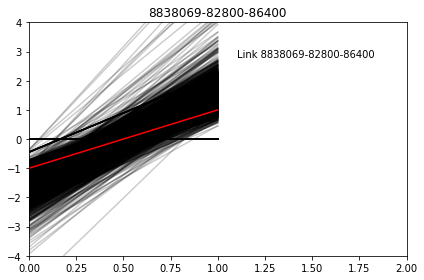

In [21]:
centroids = {}
general_data = list()
for key in most_accessed_sequence:
    sequence = most_accessed_sequence[key]
    X = to_time_series_dataset(sequence)
    chartLink(X[0], key)
    X = TimeSeriesScalerMeanVariance().fit_transform(X)
    chartLink(X[0], key)
    X = TimeSeriesResampler(sz).fit_transform(X)
    links_data = list()
    centroids[key] = X[0]
    print(key)
    for other in data:
        Y = to_time_series_dataset(other[3:])
        Y = TimeSeriesScalerMeanVariance().fit_transform(Y)
        Y = TimeSeriesResampler(sz).fit_transform(Y)
        links_data.append(Y[0])
        general_data.append(Y[0])
        print(str(other[:3])+': '+str(DTWDistance(X[0], Y[0])))
    chartLinks(sz, X[0], links_data, key)

In [22]:
result = Kmeans(general_data, centroids, len(centroids), 1, w = 5)

1


In [17]:
print(result)

{11: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 33, 35, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 50, 51, 53, 54, 55, 56, 57, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 125, 126, 127, 129, 131, 132, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 149, 150, 151, 152, 153, 155, 157, 158, 159, 161, 162, 163, 166, 170, 173, 174, 176, 179, 182, 185, 188, 189, 190, 191, 193, 194, 200, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 224, 225, 226, 227, 230, 231, 233, 235, 236, 237, 238, 240, 241, 244, 246, 252, 258, 259, 261, 262, 263, 264, 265, 270, 272, 274, 276, 277, 278, 280, 281, 283, 293, 297, 300, 302, 303, 305, 307, 309, 310, 312, 315, 316, 317, 318, 319, 320, 322, 323, 324, 326, 327

In [ ]:
for key in result:
    centroid = centroids[key]
    data_cluster = list()
    print(key)
    for i in result[key]:
        data_cluster.append(general_data[i])
    print("Number of sequences: "+str(len(data_cluster)))
    chartLinks(sz, centroid, data_cluster, key)
    

152746500-82800-86400
Number of sequences: 54639
